In [1]:
import pandas as pd
import numpy as np

df = pd.read_table('~/Downloads/INFO_4604/all_tweets_withprobabilities.csv', sep=',', header=None)

df.head()

0                   1                                                  2   \
0   0  274586346239164416  @avalenc this was a tetanus vaccine too! I tol...   
1   1  273088776564244482  @nancyholtzman flu shots for 6MO + mom? and ho...   
2   2  279187527167000576  I'm wondering why we all got flu shots since m...   
3   3  279187825801441280  Use the Flu Vaccine Finder to find a flu vacci...   
4   4  279188167368781825  Cool, today's only Thursday and I have to get ...   

       3         4           5                    6                 7   \
0  0.8597  negative  2012-11-30  South San Francisco  San Mateo County   
1  0.0508  negative  2012-11-26           Cincinnati   Hamilton County   
2  0.5721  negative  2012-12-13                    x                 x   
3  0.0014  negative  2012-12-13            Asheville   Buncombe County   
4  0.9978  negative  2012-12-13                    x                 x   

               8              9  10        11  
0      California  United States  F  0.555259  
1            Ohio  United States  F  0.025630  
2               x              x  M  0.623470  
3  North Carolina  United States  M  0.008960  
4               x              x  M  0.966922

In [2]:
df2 = df.loc[:,[1,2,5]]

df2.head()

1                                                  2  \
0  274586346239164416  @avalenc this was a tetanus vaccine too! I tol...   
1  273088776564244482  @nancyholtzman flu shots for 6MO + mom? and ho...   
2  279187527167000576  I'm wondering why we all got flu shots since m...   
3  279187825801441280  Use the Flu Vaccine Finder to find a flu vacci...   
4  279188167368781825  Cool, today's only Thursday and I have to get ...   

            5  
0  2012-11-30  
1  2012-11-26  
2  2012-12-13  
3  2012-12-13  
4  2012-12-13

In [3]:
df3 = df2.rename(index=str, columns={1: "ID", 2: "Text", 5: "Date"})

df3.head()

ID                                               Text  \
0  274586346239164416  @avalenc this was a tetanus vaccine too! I tol...   
1  273088776564244482  @nancyholtzman flu shots for 6MO + mom? and ho...   
2  279187527167000576  I'm wondering why we all got flu shots since m...   
3  279187825801441280  Use the Flu Vaccine Finder to find a flu vacci...   
4  279188167368781825  Cool, today's only Thursday and I have to get ...   

         Date  
0  2012-11-30  
1  2012-11-26  
2  2012-12-13  
3  2012-12-13  
4  2012-12-13

In [4]:
df4 = pd.read_table('~/Downloads/INFO_4604/training_tweets_meta.tsv', sep='\t', header=0)

df4.head()

TweetID Intent        Date         City              County  \
0  522600972476903424     no  2014-10-16            x                   x   
1  522645182953836544     no  2014-10-16  Los Angeles  Los Angeles County   
2  522662196984033281    yes  2014-10-16            x                   x   
3  522673895745536000     no  2014-10-16    Rochester       Monroe County   
4  522740864758468608     no  2014-10-16      Detroit        Wayne County   

        State        Country Gender  
0    Illinois  United States      x  
1  California  United States      x  
2           x              x      x  
3    New York  United States      x  
4    Michigan  United States      x

In [5]:
df5 = pd.merge(df4,df3,left_on='TweetID',right_on='ID',how='outer')

df5.head()

TweetID Intent      Date_x         City              County  \
0  5.226010e+17     no  2014-10-16            x                   x   
1  5.226452e+17     no  2014-10-16  Los Angeles  Los Angeles County   
2  5.226622e+17    yes  2014-10-16            x                   x   
3  5.226739e+17     no  2014-10-16    Rochester       Monroe County   
4  5.227409e+17     no  2014-10-16      Detroit        Wayne County   

        State        Country Gender            ID  \
0    Illinois  United States      x  5.226010e+17   
1  California  United States      x  5.226452e+17   
2           x              x      x  5.226622e+17   
3    New York  United States      x  5.226739e+17   
4    Michigan  United States      x  5.227409e+17   

                                                Text      Date_y  
0  MedSpring's new River North clinic to offer fr...  2014-10-16  
1  Jk. Flu shots be saving lives but they're anno...  2014-10-16  
2  i will get the flu shot anyway, not cause ebol...  2014-10-16  
3  Speaking of flu shots, I found out I work with...  2014-10-16  
4  Who smiles for a flu shot? WWj producer Terri ...  2014-10-16

In [6]:
df6 = df5.loc[:,['ID','Text','Intent','Date_x']]
df7 = df6.rename(index=str, columns={"Intent": "Illness",'Date_x':'Date'})

df7.head()

ID                                               Text Illness  \
0  5.226010e+17  MedSpring's new River North clinic to offer fr...      no   
1  5.226452e+17  Jk. Flu shots be saving lives but they're anno...      no   
2  5.226622e+17  i will get the flu shot anyway, not cause ebol...     yes   
3  5.226739e+17  Speaking of flu shots, I found out I work with...      no   
4  5.227409e+17  Who smiles for a flu shot? WWj producer Terri ...      no   

         Date  
0  2014-10-16  
1  2014-10-16  
2  2014-10-16  
3  2014-10-16  
4  2014-10-16

In [7]:
df7.replace('no', 0, inplace = True)
df7.replace('yes', 1, inplace = True)
        
df7.head()

ID                                               Text  Illness  \
0  5.226010e+17  MedSpring's new River North clinic to offer fr...      0.0   
1  5.226452e+17  Jk. Flu shots be saving lives but they're anno...      0.0   
2  5.226622e+17  i will get the flu shot anyway, not cause ebol...      1.0   
3  5.226739e+17  Speaking of flu shots, I found out I work with...      0.0   
4  5.227409e+17  Who smiles for a flu shot? WWj producer Terri ...      0.0   

         Date  
0  2014-10-16  
1  2014-10-16  
2  2014-10-16  
3  2014-10-16  
4  2014-10-16

In [8]:
import re

count = 0

r2013 = re.compile('2013')
r2014 = re.compile('2014')
r2015 = re.compile('2015')
r2016 = re.compile('2016')


rows2013 = []
rows2014 = []
rows2015 = []
rows2016 = []

for date in df7.loc[:,'Date']:
    if not pd.isnull(date):
        if r2013.match(date):
            rows2013.append(df7.iloc[count])
        elif r2014.match(date):
            rows2014.append(df7.iloc[count])
        elif r2015.match(date):
            rows2015.append(df7.iloc[count])
        elif r2016.match(date):
            rows2016.append(df7.iloc[count])

    count = count + 1


df_2013 = pd.DataFrame(data=rows2013)
df_2014 = pd.DataFrame(data=rows2014)
df_2015 = pd.DataFrame(data=rows2015)
df_2016 = pd.DataFrame(data=rows2016)

print(df_2013.head())
print(df_2014.head())
print(df_2015.head())
df_2016.head()

                ID                                               Text  \
6734  3.422574e+17  “@iTweetFacts: Those who bite their nails tend...   
6735  3.423483e+17  “@BookofFactz: A swine flu outbreak in 1976 ki...   
6736  3.465143e+17  Current Issue: Inactivated Influenza Vaccines ...   
6737  3.465276e+17                           Okay just got a flu shot   
6738  3.466125e+17  Johns Hopkins Scientist Blasts CDC for Pushing...   

      Illness       Date  
6734      0.0   2013-6-5  
6735      0.0   2013-6-5  
6736      0.0  2013-6-17  
6737      1.0  2013-6-17  
6738      0.0  2013-6-17  
             ID                                               Text  Illness  \
0  5.226010e+17  MedSpring's new River North clinic to offer fr...      0.0   
1  5.226452e+17  Jk. Flu shots be saving lives but they're anno...      0.0   
2  5.226622e+17  i will get the flu shot anyway, not cause ebol...      1.0   
3  5.226739e+17  Speaking of flu shots, I found out I work with...      0.0   
4  5

ID                                               Text  \
6108           NaN                                                NaN   
6179  6.828979e+17  The flu vaccine reduces risk of serious illnes...   
6180  6.829031e+17  A Better Flu Shot This Season? https://t.co/R9...   
6181  6.829457e+17  Is the flu shot effective or just a big govern...   
6182  6.829517e+17  Flu vaccine can protect against heart attack a...   

      Illness      Date  
6108      0.0  2016-1-1  
6179      0.0  2016-1-1  
6180      0.0  2016-1-1  
6181      0.0  2016-1-1  
6182      0.0  2016-1-1

In [9]:
tmp = pd.DataFrame()

for i in range(len(df_2013)):
    row = df_2013.iloc[[i]]
    if row['ID'].any():
        tmp = tmp.append(row)
        
df_2013 = tmp

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

text_train2013, text_test2013, Y_train2013, Y_test2013 = train_test_split(df_2013['Text'], df_2013['Illness'], test_size=0.2, random_state=0)

In [11]:
import re
from collections import Counter

def ngrams(tokens, n):
    output = []
    for i in range(n-1, len(tokens)):
        ngram = ' '.join(tokens[i-n+1:i+1])
        output.append(ngram)
    return output

def skipgrams(tokens, n):
    output = []
    for i in range(n-1, len(tokens)):
        str1 = ''
        for j in range(n-2):
            str1 = str1+' * '
        skipgram = str(tokens[i-n+1])+str1+str(tokens[i])
        output.append(skipgram)
    return output

import itertools

def pairs(words):
    ret = itertools.combinations(words,2)
    return ret

import nltk

def parts_of_speech(words):
    tagged = []
    
    try:
        tagged = nltk.pos_tag(words)
        return(tagged)
        
    except Exception as e:
        print(e)

In [12]:
def features(text,  ngram_range=(1,3)):
    text = text.lower()      # make the string lowercase
    text = re.sub(r'(.)\1+', r'\1\1', text)     # remove consecutive characters that are repeated more than twice
    
    features_in_text = []   # running list of all features in this instance (can be repeated)
    
    # treat alphanumeric characters as word tokens (removing anything else),
    # and extract all n-grams of length n specified by ngram_range
    
    text_alphanum = re.sub('[^a-z0-9]', ' ', text)
    for n in range(ngram_range[0], ngram_range[1]+1):
        features_in_text += ngrams(text_alphanum.split(), n)
    
    for n in range(3,5):
        features_in_text += skipgrams(text_alphanum.split(), n)
      
    features_in_text += str(pairs(text_alphanum.split()))
    features_in_text += str(parts_of_speech(text_alphanum.split()))
    # now treat punctuation as word tokens, and get their counts (only unigrams)
    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    features_in_text += ngrams(text_punc.split(), 1)
    
   
    # 'Counter' converts a list into a dictionary whose keys are the list elements 
    #  and the values are the number of times each element appeared in the list
    
    return Counter(features_in_text)

In [13]:
from sklearn.feature_extraction import DictVectorizer

vect = DictVectorizer()
X_train2013 = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train2013)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score

# this defines the classifier we will use -- don't change this variable

base_classifier2013 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

# these are the C values we will compare -- don't change this variable

params = [{'C': [0.01, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]}]

# this performs 5-fold cross-validation with the above classifier and parameter options

gs_classifier = GridSearchCV(base_classifier2013, params, cv=5)
gs_classifier.fit(X_train2013, Y_train2013)

print("Best parameter settings:", gs_classifier.best_params_)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

Best parameter settings: {'C': 10.0}
Validation accuracy: 0.845624


In [15]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import f1_score

X_train_final = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train2013)
X_test_final = vect.transform(features(d, ngram_range=(1,3)) for d in text_test2013)

selection = SelectPercentile(percentile=90, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train2013)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier2013, params, cv=5)
gs_classifier.fit(X_train_final, Y_train2013)

print("Validation F1: %0.6f" % f1_score(Y_train2013, gs_classifier.predict(X_train_final)))
print("Test F1: %0.6f" % f1_score(Y_test2013, gs_classifier.predict(X_test_final)))

Validation F1: 0.968466
Test F1: 0.823028


In [16]:
feature_names = np.asarray(vect.get_feature_names())
base_classifier2013.fit(X_train_final, Y_train2013)

feature_weights2013 = {}
feature_names2013 = set()

print("\nFeature weights:")
args = np.argsort(base_classifier2013.coef_[0])
for a in args:
    print(" %s: %0.4f" % (feature_names[a], base_classifier2013.coef_[0][a]))
    feature_weights2013[feature_names[a]] = base_classifier2013.coef_[0][a]
    feature_names2013.add(feature_names[a])


Feature weights:
 hurt at: -0.6173
 my depo shot: -0.5873
 +.: -0.5207
 9am 2pm at: -0.4777
 :)”: -0.4519
 shot *  * http: -0.4365
 uab * discusses: -0.4145
 i * got: -0.3933
 sleep since: -0.3846
 i *  * under: -0.3798
 my son sick: -0.3686
 nyc bloomberg: -0.3609
 t co jddzozfz: -0.3546
 so *  * trust: -0.3361
 new *  * new: -0.3356
 two *  * vaccine: -0.3323
 to why i: -0.3251
 always gets: -0.2954
 my fault: -0.2900
 a temporary and: -0.2889
 how * do: -0.2867
 t * o5ls2hvc3d: -0.2795
 %: -0.2620
 $$: -0.2609
 seeing too many: -0.2582
 99mz50ft *  * are: -0.2429
 !😂😂: -0.2338
 friends prepare: -0.2301
 different flu strain: -0.2297
 discount: -0.2297
 reminders * t: -0.2270
 chip *  * arm: -0.2268
 more *  * to: -0.2268
 ugh *  * co: -0.2191
 ;): -0.2152
 flu * kaiserpermenent: -0.2125
 my hump: -0.2121
 fun * had: -0.2091
 ugh * t: -0.2084
 spurs flu: -0.2069
 a * fell: -0.2033
 days horrid flu: -0.2030
 ddgiothi via: -0.2030
 friends to: -0.2018
 immunology: -0.2004
 fired after

 at * cuz: -0.0550
 s u i: -0.0550
 flu *  * amymyersmd: -0.0549
 nyc flu https: -0.0549
 this * achy: -0.0549
 a long time: -0.0548
 qyzeimezp7: -0.0548
 u * em: -0.0547
 gotten *  * out: -0.0546
 cock * pharmacy: -0.0545
 t co abtodkop: -0.0545
 another day: -0.0543
 s *  * cvs: -0.0542
 a flu vaccination: -0.0542
 to pick up: -0.0542
 i got today: -0.0542
 body * gets: -0.0542
 o5qukpqj9y * guardian: -0.0540
 flu * globe: -0.0540
 seasonal *  * http: -0.0540
 u *  * up: -0.0540
 abc new: -0.0539
 a year now: -0.0539
 months * you: -0.0538
 2 over 3: -0.0538
 lil *  * cannot: -0.0538
 mandate *  * c: -0.0537
 blog plus videos: -0.0537
 suppressor *  * flu: -0.0536
 feel like someone: -0.0535
 stunna not sick: -0.0534
 bragg boulevard today: -0.0534
 for * hell: -0.0534
 shots a nono: -0.0534
 month *  * staff: -0.0534
 shot * apples: -0.0533
 it * will: -0.0533
 it * you: -0.0533
 might * know: -0.0533
 arm s: -0.0531
 distribution centers: -0.0530
 to leave flowers: -0.0530
 for day

 gun shot: -0.0336
 new unique options: -0.0336
 alternative * a: -0.0335
 today *  * 4: -0.0335
 october * 2013: -0.0335
 age * http: -0.0335
 s this flu: -0.0335
 age *  * and: -0.0335
 starting *  * sick: -0.0335
 thanks * shot: -0.0335
 the *  * could: -0.0335
 that a large: -0.0335
 11 * why: -0.0334
 hurts *  * but: -0.0334
 fda oks egg: -0.0334
 http *  * ayvavb9m: -0.0334
 fdafox news: -0.0334
 fda nod the: -0.0334
 get * come: -0.0334
 nyc mayor mikebloomberg: -0.0334
 tell *  * have: -0.0334
 tell *  * flu: -0.0334
 fdafox news th: -0.0334
 get * cold: -0.0334
 getting http: -0.0334
 lots *  * chemicals: -0.0334
 of *  * flushots: -0.0334
 getting his flu: -0.0334
 obv can: -0.0334
 http *  * kglsd01u: -0.0334
 shots laced: -0.0334
 flu *  * under: -0.0334
 shots last: -0.0334
 shots later: -0.0334
 of *  * for: -0.0334
 tea * vaccines: -0.0334
 get vaccinated: -0.0334
 today never felt: -0.0334
 times abc: -0.0334
 ftgyvklmz7: -0.0334
 frozen *  * fucking: -0.0334
 bomb thre

 in *  * area: -0.0271
 shot and protected: -0.0270
 else * can: -0.0270
 else * worry: -0.0270
 else http: -0.0270
 relievers get: -0.0270
 treated myself to: -0.0270
 fiqjya42 *  * hcp520: -0.0270
 25 safe: -0.0270
 30 * the: -0.0270
 25 myths about: -0.0270
 say flu vaccine: -0.0270
 25 yrs thankyou: -0.0270
 25 yrs: -0.0270
 flu * actually: -0.0270
 25 safe natural: -0.0270
 ass * nakin: -0.0270
 flu shots never: -0.0270
 flu shot like: -0.0270
 flu shots my: -0.0270
 the consent: -0.0270
 shots *  * this: -0.0270
 ?@: -0.0270
 founded: -0.0270
 flu * assets: -0.0269
 getting *  * i: -0.0269
 tax *  * flu: -0.0269
 scary i guess: -0.0269
 getting *  * in: -0.0269
 piprim: -0.0269
 pilot mooted: -0.0269
 gettin my: -0.0269
 doctors for the: -0.0269
 the *  * can: -0.0269
 the *  * but: -0.0269
 the *  * care: -0.0269
 first *  * a: -0.0269
 doctors for: -0.0269
 the *  * campaign: -0.0269
 teacher preaching: -0.0269
 pit fall: -0.0269
 pit * having: -0.0269
 came: -0.0269
 tell swin

 encourage people: -0.0236
 glad *  * volunteered: -0.0236
 glad fucking flu: -0.0236
 glad *  * s: -0.0236
 glad i ain: -0.0236
 glad that the: -0.0236
 glad that walgreens: -0.0236
 fox * adjuvanted: -0.0236
 how i got: -0.0236
 the *  * before: -0.0236
 can *  * shots: -0.0236
 past *  * ugh: -0.0236
 past *  * then: -0.0236
 thestruggle: -0.0236
 these simple steps: -0.0236
 so * lol: -0.0236
 bribe *  * star: -0.0236
 how many ppl: -0.0236
 these * shots: -0.0236
 season * have: -0.0236
 stated *  * shot: -0.0236
 my *  * flu: -0.0236
 my *  * doesn: -0.0236
 lead * shit: -0.0236
 jayrenee flu shot: -0.0236
 let the lady: -0.0236
 let the: -0.0236
 my *  * freakingout: -0.0236
 http *  * yrdblrzqwr: -0.0236
 http *  * bvqwflsjnq: -0.0236
 least one: -0.0236
 ddgiothi: -0.0236
 my *  * free: -0.0236
 days hopefully you: -0.0236
 stated * flu: -0.0236
 http *  * rj2kv1q7sr: -0.0236
 it * 29: -0.0236
 fuck you pointleas: -0.0235
 on pregnant: -0.0235
 must *  * season: -0.0235
 on re

 s available but: -0.0208
 m a big: -0.0208
 reports * vaccine: -0.0208
 shot *  * enough: -0.0208
 fqoxpodw *  * hcsm: -0.0208
 to *  * i: -0.0208
 pointless: -0.0208
 asking * ice: -0.0208
 come * yours: -0.0208
 feel the: -0.0208
 like *  * t: -0.0208
 rights should: -0.0207
 snottin * hubby: -0.0207
 age * or: -0.0207
 flu * from: -0.0207
 flu *  * avaa: -0.0207
 season if not: -0.0207
 season in: -0.0207
 mom gave me: -0.0207
 mom gave: -0.0207
 mom for telling: -0.0207
 mom for: -0.0207
 age *  * older: -0.0207
 mom danielle you: -0.0207
 against viral: -0.0207
 t * tixtpq4wz0: -0.0207
 from *  * before: -0.0207
 s nasties: -0.0207
 in * be: -0.0207
 on * with: -0.0207
 supposed to help: -0.0207
 nice * too: -0.0207
 ap * pregnant: -0.0206
 given in: -0.0206
 given by the: -0.0206
 our * is: -0.0206
 doing *  * on: -0.0206
 flu *  * 2011: -0.0206
 t co docxukazok: -0.0206
 given just: -0.0206
 given just bring: -0.0206
 tempe az http: -0.0206
 temperatures: -0.0206
 given in work

 shot approved by: -0.0190
 http *  * mke8dvbht2: -0.0190
 4pm amidst: -0.0190
 shot * with: -0.0190
 shot appt: -0.0190
 is good: -0.0190
 recommendations * for: -0.0190
 get *  * before: -0.0190
 said flu shots: -0.0190
 get *  * but: -0.0190
 since 2: -0.0190
 flu *  * this: -0.0190
 like * we: -0.0190
 a * at: -0.0190
 a full on: -0.0190
 many *  * know: -0.0190
 like * years: -0.0190
 recommendations *  * pneumococcus: -0.0190
 many * http: -0.0190
 since * ve: -0.0190
 since * woman: -0.0190
 mt: -0.0190
 many * so: -0.0190
 recommendation from the: -0.0190
 flu *  * think: -0.0190
 and * skin: -0.0190
 recommendation from: -0.0190
 co vvbp5ivh: -0.0190
 since 1994: -0.0190
 like * needle: -0.0190
 mpeveadams them: -0.0190
 co vy42mbdd: -0.0190
 many *  * workers: -0.0190
 many * i: -0.0190
 a full: -0.0190
 like * i: -0.0190
 s vaccines: -0.0190
 reducing influenza: -0.0190
 shot at ucf: -0.0190
 reducing symptoms: -0.0190
 is a vegan: -0.0190
 fuck * a: -0.0190
 in *  * and: -0

 t * xfe6oxitik: -0.0172
 about * get: -0.0172
 just * building: -0.0172
 about * flu: -0.0172
 8xj3l9wb: -0.0172
 2017: -0.0172
 damn like: -0.0172
 about * everyone: -0.0172
 2013 analysis: -0.0172
 damn it just: -0.0172
 should take a: -0.0172
 damn it: -0.0172
 t co bvqwflsjnq: -0.0172
 added * video: -0.0172
 serum * you: -0.0172
 medical * is: -0.0172
 medical * http: -0.0172
 adjust amp: -0.0172
 flu shots when: -0.0172
 me to: -0.0172
 t let: -0.0172
 flu shot b4: -0.0172
 flushots this: -0.0172
 t co bweyximgrl: -0.0172
 shit *  * not: -0.0172
 admits http: -0.0172
 shit *  * now: -0.0172
 so *  * co: -0.0172
 http *  * j4sqwtwgna: -0.0172
 on * nov: -0.0172
 be *  * in: -0.0172
 be *  * i: -0.0172
 be *  * gt: -0.0172
 on * flu: -0.0172
 approval *  * submission: -0.0172
 key: -0.0172
 just *  * a: -0.0172
 just *  * first: -0.0172
 be *  * got: -0.0172
 on campus: -0.0172
 today from 3pm: -0.0172
 joannluv2clean * ingaharden: -0.0172
 jmitch27 only ppl: -0.0172
 jmitch27 onl

 t *  * unfit: -0.0149
 t *  * triviatuesday: -0.0149
 they hurt alot: -0.0149
 they have to: -0.0149
 they have the: -0.0149
 shot *  * many: -0.0149
 americans who: -0.0149
 a * shot: -0.0149
 a * shortages: -0.0149
 the nurse can: -0.0149
 attack stroke risk: -0.0149
 attack thinking: -0.0149
 a * days: -0.0149
 atm hurts: -0.0149
 they have: -0.0149
 army flu: -0.0149
 army * shot: -0.0149
 army * center: -0.0149
 army *  * call: -0.0149
 of * attention: -0.0149
 of * attack: -0.0149
 army flu shot: -0.0149
 athletes: -0.0149
 owners: -0.0149
 owners *  * vaccinate: -0.0149
 hacking snottin: -0.0149
 telling: -0.0149
 h926jixc7r: -0.0149
 had two: -0.0149
 had two colds: -0.0149
 better * i: -0.0149
 better * hate: -0.0149
 better * give: -0.0149
 better * get: -0.0149
 tdap nowiknowhowcjfeel: -0.0149
 tcot crazymofos: -0.0149
 a damn flu: -0.0149
 owners warned to: -0.0149
 owners warned: -0.0149
 owners * to: -0.0149
 of *  * they: -0.0149
 of *  * sleeping: -0.0149
 9lecfggv: -0

 know * the: -0.0132
 over *  * irish: -0.0132
 over *  * never: -0.0132
 better *  * t: -0.0132
 for * kids: -0.0132
 a higher risk: -0.0132
 a higher: -0.0132
 made using: -0.0132
 shots * uf: -0.0132
 shots * vaccination: -0.0132
 shots * veterans: -0.0132
 12 *  * get: -0.0132
 their * or: -0.0132
 12 *  * kaylynnematten: -0.0132
 take *  * wash: -0.0132
 news * t: -0.0132
 shots * violent: -0.0132
 new *  * on: -0.0132
 tackle the flu: -0.0132
 better *  * starwars: -0.0132
 t even like: -0.0132
 am *  * supplies: -0.0132
 the va: -0.0132
 find * flu: -0.0132
 one doc: -0.0132
 for * as: -0.0132
 one does appear: -0.0132
 one does: -0.0132
 one doc passes: -0.0132
 take flu shot: -0.0132
 take flu: -0.0132
 one ever: -0.0132
 seeing * like: -0.0132
 shoutout * the: -0.0132
 11am * flu: -0.0132
 the sky: -0.0132
 t even manage: -0.0132
 cedar: -0.0132
 literally every fucking: -0.0132
 literally feels: -0.0132
 develop vaccine for: -0.0132
 cedar *  * department: -0.0132
 develop v

 t * rqbektas: -0.0117
 garlic: -0.0117
 arm * to: -0.0117
 arm * bc: -0.0117
 now about a: -0.0117
 rights *  * first: -0.0116
 2013 new: -0.0116
 20m developing vaccines: -0.0116
 it * ve: -0.0116
 shingles shots shingles: -0.0116
 shortages huffington: -0.0116
 flu * online: -0.0116
 shots take: -0.0116
 co rn6824cid4: -0.0116
 shot pray isthislegal: -0.0116
 shot personally did: -0.0116
 shot pray: -0.0116
 either i: -0.0116
 shot feels: -0.0116
 shot fault: -0.0116
 shot fascists: -0.0116
 shot fast: -0.0116
 shot fact: -0.0116
 shot policy wear: -0.0116
 either http t: -0.0116
 josii sanchez: -0.0116
 journalists * bout: -0.0116
 http *  * vquceqqmsp: -0.0116
 ass shoulda got: -0.0116
 as to when: -0.0116
 shot *  * forgot: -0.0116
 flu * questions: -0.0116
 that it: -0.0116
 as a public: -0.0116
 journalists how: -0.0116
 that is done: -0.0116
 that makes: -0.0116
 shot *  * forced: -0.0116
 shirt *  * cause: -0.0116
 department *  * a: -0.0116
 n * feeling: -0.0116
 shots are a

 fda *  * approves: -0.0107
 at *  * 5pm: -0.0107
 be a: -0.0107
 said *  * shot: -0.0107
 actually *  * a: -0.0107
 flu vaccinat http: -0.0107
 flu vaccinated: -0.0107
 scientists * will: -0.0107
 be * worst: -0.0107
 actual *  * it: -0.0107
 be * step: -0.0107
 i shoulda got: -0.0107
 got * vaccine: -0.0107
 shots *  * vfw: -0.0107
 made *  * arm: -0.0107
 s * from: -0.0107
 shows: -0.0107
 showing the flu: -0.0107
 showing the: -0.0107
 got * in: -0.0107
 showing kids screaming: -0.0107
 shots *  * vaccines: -0.0107
 shots *  * ustore: -0.0107
 co qehqmjrs nature: -0.0107
 of * strains: -0.0107
 got flushots this: -0.0107
 shots *  * unmh: -0.0107
 of * words: -0.0107
 of * workers: -0.0107
 asaprozay *  * shots: -0.0107
 co radnce6qa9: -0.0107
 co rer05mr2: -0.0107
 co rgfj5zhzqs: -0.0107
 shots *  * up: -0.0107
 fly experiments: -0.0107
 every year your: -0.0107
 other * vaccines: -0.0107
 needs *  * for: -0.0107
 but *  * 1: -0.0107
 needs *  * have: -0.0107
 but: -0.0107
 needs 

 backpack and 26: -0.0093
 season creates vaccine: -0.0093
 t co d9j2ydrje9: -0.0093
 it didn: -0.0093
 man this: -0.0093
 hate * things: -0.0093
 job *  * http: -0.0093
 job *  * likeforlike: -0.0093
 amount * flu: -0.0093
 money *  * spent: -0.0093
 away needles: -0.0093
 amanda peet: -0.0093
 job *  * me: -0.0093
 away it s: -0.0093
 job *  * that: -0.0093
 nyc * http: -0.0093
 back *  * a: -0.0093
 job *  * to: -0.0093
 job * forcing: -0.0093
 job * gonna: -0.0093
 nyc * flu: -0.0093
 ny times http: -0.0093
 ny times: -0.0093
 away needles only: -0.0093
 questions * underlying: -0.0093
 amount * money: -0.0093
 shot triumphetp if: -0.0093
 it did you: -0.0093
 october 16 from: -0.0093
 man *  * is: -0.0093
 man that shit: -0.0093
 it did: -0.0093
 moment * pun: -0.0093
 amp *  * able: -0.0093
 away when: -0.0093
 re * fool: -0.0093
 am *  * pm: -0.0093
 look *  * poison: -0.0093
 am * shots: -0.0093
 a few hours: -0.0093
 lanadawood * do: -0.0093
 t * zyceeockjj: -0.0093
 ): -0.009

 an awesome big: -0.0085
 2 same: -0.0085
 needles * people: -0.0085
 ugh * get: -0.0085
 twitter today talking: -0.0085
 the flu this: -0.0084
 christinalee629 *  * to: -0.0084
 declared in: -0.0084
 to *  * are: -0.0084
 needs a seasonal: -0.0084
 needs to: -0.0084
 needs to be: -0.0084
 needs a flu: -0.0084
 by and get: -0.0084
 the flu 4: -0.0084
 designated * what: -0.0084
 deprived: -0.0084
 den em get: -0.0084
 designated *  * if: -0.0084
 about *  * yet: -0.0084
 by * news: -0.0084
 +**: -0.0084
 and sterilize me: -0.0084
 shot *  * cdc: -0.0084
 nyquil: -0.0084
 and shove it: -0.0084
 services *  * co: -0.0084
 odjygemwwc: -0.0084
 is horrible this: -0.0084
 it * works: -0.0084
 o l: -0.0084
 and sterilize: -0.0084
 it * your: -0.0084
 is eat good: -0.0084
 got your: -0.0084
 is hosting: -0.0084
 of: -0.0084
 late in: -0.0084
 late i m: -0.0084
 late by: -0.0084
 drug forecast and: -0.0084
 the * wait: -0.0084
 my nose you: -0.0084
 and tb skin: -0.0084
 and that: -0.0084
 my 

 alternatedan hey: -0.0077
 alternatedan hey burbanknbeyond: -0.0077
 co 5mnfyw85bg: -0.0077
 shot * shot: -0.0077
 26 8 lb: -0.0077
 an onslaught: -0.0077
 takes *  * now: -0.0077
 over *  * get: -0.0077
 more in: -0.0077
 over *  * hate: -0.0077
 taking me: -0.0077
 oct 9th 11am: -0.0077
 over *  * http: -0.0077
 more *  * post: -0.0077
 taking *  * got: -0.0077
 over *  * health: -0.0077
 now about flu: -0.0077
 and tdap nowiknowhowcjfeel: -0.0077
 now getting: -0.0077
 and their: -0.0077
 now i will: -0.0077
 and the women: -0.0077
 and that she: -0.0077
 now if: -0.0077
 taking me to: -0.0077
 of norwegian women: -0.0077
 of got: -0.0077
 of community acquired: -0.0077
 getting upwards: -0.0077
 getting your: -0.0077
 gihuawm6q4: -0.0077
 and *  * gonna: -0.0077
 desparately * for: -0.0077
 t * zefddzyroq: -0.0077
 shot *  * can: -0.0077
 and * gets: -0.0077
 not to sure: -0.0077
 t2 flu: -0.0077
 http *  * xfe6oxitik: -0.0077
 t2 flu shot: -0.0077
 now *  * heck: -0.0077
 shareth

 6pm * liberty: -0.0071
 tommorow *  * it: -0.0071
 6gdidmjin4: -0.0071
 told yourself: -0.0071
 6ukrgvpd *  * is: -0.0071
 6ukrgvpd * shot: -0.0071
 followed: -0.0071
 post * fall: -0.0071
 post * http: -0.0071
 shots * ur: -0.0071
 tonyhdz christ18marissa yes: -0.0071
 http *  * dnrfpzgx5t: -0.0071
 or pilates classes: -0.0071
 lnyhbt tcot: -0.0071
 said no: -0.0071
 damn flu: -0.0071
 damn flu shot: -0.0071
 damn fuck: -0.0071
 damn fuck this: -0.0071
 feeling *  * i: -0.0071
 season but: -0.0071
 damn flu smh: -0.0071
 lnyhbt * tgdn: -0.0071
 shrugs uberfacts: -0.0071
 have * gotten: -0.0071
 it * because: -0.0071
 foxnews: -0.0071
 it * goawayflu: -0.0071
 flu * q: -0.0071
 tell me swine: -0.0071
 supposedly supposed: -0.0071
 fightflu: -0.0071
 sure me and: -0.0071
 it * gonna: -0.0071
 shot *  * flu: -0.0071
 severe *  * co: -0.0071
 pharmapoint: -0.0071
 shot *  * flugitive: -0.0071
 shelley h all: -0.0071
 teacher: -0.0071
 life * http: -0.0071
 and striking: -0.0071
 and * ti

 ferretthimself apparently shouting: -0.0063
 buena * and: -0.0063
 time http: -0.0063
 times are http: -0.0063
 busted: -0.0063
 busted * laughing: -0.0063
 bugs http t: -0.0063
 t * pjrch1fezi: -0.0063
 it *  * ew: -0.0063
 flu * time: -0.0063
 lol my: -0.0063
 bollbar *  * are: -0.0063
 lol my dad: -0.0063
 bollbar * shots: -0.0063
 bollbar flu: -0.0063
 lol my immune: -0.0063
 bollbar flu shots: -0.0063
 it *  * evil: -0.0063
 bomb: -0.0063
 tjn4hckqny: -0.0063
 tjn4hckqny *  * http: -0.0063
 it *  * far: -0.0063
 it *  * fall: -0.0063
 lol no: -0.0063
 it *  * family: -0.0063
 narcolepsy * those: -0.0063
 flu * 19: -0.0063
 researchers * towards: -0.0063
 report widespread: -0.0063
 slept: -0.0063
 to * every: -0.0063
 shot * hurts: -0.0063
 for *  * welcome: -0.0063
 for * class: -0.0063
 cause flu: -0.0063
 stick *  * needles: -0.0063
 helping you adjust: -0.0063
 bro * s: -0.0063
 bro it: -0.0063
 dangnabit: -0.0063
 danielle: -0.0063
 sick right: -0.0063
 danielle * get: -0.00

 t co nolns8qkfs: -0.0056
 of * disease: -0.0056
 don *  * medicine: -0.0056
 because * me: -0.0056
 shot * smh: -0.0056
 t * are7giej: -0.0056
 horizonconnect wednesday november: -0.0056
 shot * spray: -0.0056
 different this: -0.0056
 this * yolo: -0.0056
 this case: -0.0056
 because * m: -0.0056
 don *  * it: -0.0056
 so bad: -0.0056
 because * kid: -0.0056
 from today on: -0.0056
 from universal: -0.0056
 shot * srsly: -0.0056
 can people seriously: -0.0056
 for * amount: -0.0056
 outbreak glad: -0.0056
 outbreak http t: -0.0056
 outbreak i: -0.0056
 outbreak * m: -0.0056
 demand *  * flu: -0.0056
 demand *  * available: -0.0056
 her children: -0.0056
 closer: -0.0056
 some medicine or: -0.0056
 still * these: -0.0056
 demand: -0.0056
 delta news web: -0.0056
 closer *  * a: -0.0056
 i always: -0.0056
 i received in: -0.0056
 i just want: -0.0056
 i received a: -0.0056
 at http t: -0.0056
 it *  * http: -0.0056
 it *  * in: -0.0056
 bed *  * pointleas: -0.0056
 meganmorse13: -0.005

 tied to: -0.0050
 tied to heart: -0.0050
 t * jk24nskfju: -0.0050
 like *  * be: -0.0050
 t * dwzqqdifp5: -0.0050
 like *  * get: -0.0050
 them flu: -0.0050
 birdflu: -0.0050
 a *  * tells: -0.0050
 shot flublok: -0.0050
 i * better: -0.0050
 bird wish i: -0.0050
 dallas county for: -0.0050
 t * c3cnglu9fd: -0.0050
 almost never: -0.0050
 a doozy: -0.0050
 a dogg: -0.0050
 clarify: -0.0050
 fact * my: -0.0050
 i * fired: -0.0050
 dailypush is on: -0.0050
 researchers * a: -0.0050
 stated that flu: -0.0050
 i * fine: -0.0050
 already lol: -0.0050
 co xqcznrggxm: -0.0050
 out *  * on: -0.0050
 co xqgrwjnrus: -0.0050
 co xssgeuo: -0.0050
 out *  * of: -0.0050
 co xtgzpl9wpu: -0.0050
 lifenews story this: -0.0050
 out *  * no: -0.0050
 co xszo1dhnil: -0.0050
 dallas * for: -0.0050
 http *  * eemv61q4: -0.0050
 already *  * o: -0.0050
 already lol and: -0.0050
 R: -0.0050
 bird flu shot: -0.0050
 marlonlwayans: -0.0050
 09 * her: -0.0050
 mateo *  * min: -0.0050
 http *  * gnhagkmmsy: -0.0

 symptom of the: -0.0045
 t *  * one: -0.0045
 some * to: -0.0045
 immune *  * like2: -0.0045
 her *  * so: -0.0045
 city to force: -0.0045
 but all: -0.0045
 other *  * not: -0.0045
 other *  * problem: -0.0045
 im3ovseqsz: -0.0045
 killing *  * http: -0.0045
 mask * nurses: -0.0045
 t *  * patient: -0.0045
 responders: -0.0045
 but bowmancg: -0.0045
 clinics next: -0.0045
 t *  * publichealth: -0.0045
 immune *  * kill: -0.0045
 respiratory bug like: -0.0045
 respiratory bug: -0.0045
 marthamaccallum * no: -0.0045
 orr not: -0.0045
 flu is to: -0.0045
 mathematical *  * actual: -0.0045
 t *  * psu: -0.0045
 immune *  * it: -0.0045
 immune *  * influenza: -0.0045
 im thinkin i: -0.0045
 but all she: -0.0045
 respiratory infection: -0.0045
 respiratory infection five: -0.0045
 choices for seasonal: -0.0045
 still *  * shot: -0.0045
 pandemic *  * killed: -0.0045
 pandemic *  * http: -0.0045
 symptom * the: -0.0045
 orthodontist and my: -0.0045
 pamela *  * attacked: -0.0045
 so * flu: 

 flu shot no: -0.0040
 harvard *  * flu: -0.0040
 co jbgwachckz: -0.0040
 germs *  * flu: -0.0040
 texting *  * boost: -0.0040
 killin: -0.0040
 study * toronto: -0.0040
 hope * s: -0.0040
 and doesn t: -0.0040
 actually did: -0.0040
 not tied: -0.0040
 the brilliant: -0.0040
 the * gonna: -0.0040
 next *  * aisd: -0.0040
 doesn * matter: -0.0039
 rn6824cid4: -0.0039
 flu * needles: -0.0039
 and ect: -0.0039
 guardianscience * flu: -0.0039
 rn *  * kill: -0.0039
 M: -0.0039
 prednisone *  * shots: -0.0039
 severe *  * season: -0.0039
 shitter and shitter: -0.0039
 4 muscle ache: -0.0039
 doesn * make: -0.0039
 shots * morning: -0.0039
 shitter and: -0.0039
 a cold: -0.0039
 news1130radio: -0.0039
 new *  * newswhere: -0.0039
 on the market: -0.0039
 here *  * the: -0.0039
 4 months: -0.0039
 doesn * hurt: -0.0039
 4 month checkup: -0.0039
 4 month: -0.0039
 shots * needles: -0.0039
 rjmoprkbwn: -0.0039
 for today waitin: -0.0039
 co *  * go: -0.0039
 4 muscle: -0.0039
 be *  * nurse: -

 lcbwr71pht: -0.0035
 doesnt *  * flu: -0.0035
 avoiding the: -0.0035
 leave flowers: -0.0035
 it *  * re: -0.0035
 law * today: -0.0035
 hurts *  * i: -0.0035
 avoiding getting a: -0.0035
 this * your: -0.0035
 law * rights: -0.0035
 law * on: -0.0035
 law * allow: -0.0035
 it *  * season: -0.0035
 law *  * some: -0.0035
 this car: -0.0035
 3 * the: -0.0035
 3 * seniors: -0.0035
 doesnt: -0.0035
 this classroom: -0.0035
 avoiding getting: -0.0035
 this flyer w: -0.0035
 for *  * men: -0.0035
 ajc * t: -0.0035
 season just ask: -0.0035
 info w new: -0.0035
 muscle *  * just: -0.0035
 muscle and burn: -0.0035
 muscle but: -0.0035
 of knowing what: -0.0035
 of knowing: -0.0035
 putting together a: -0.0035
 doesn t hurt: -0.0035
 t co ateachpmn6: -0.0035
 murder: -0.0035
 indiana * fired: -0.0035
 t co mn2o3nfc: -0.0035
 re *  * months: -0.0035
 rangz basically: -0.0035
 bed *  * t: -0.0035
 bed *  * and: -0.0035
 for *  * medical: -0.0035
 quamo * a: -0.0035
 for *  * itsjustnotsupposeto

 cells such a: -0.0032
 mirrandha100 never: -0.0032
 cemetery * leave: -0.0032
 situation wrk it: -0.0032
 always http: -0.0032
 mirrandha100 * have: -0.0032
 either idk bc: -0.0032
 at hq: -0.0032
 my *  * right: -0.0032
 do nun: -0.0032
 sit: -0.0032
 cells such: -0.0032
 doc ran out: -0.0032
 at it: -0.0032
 s *  * everyone: -0.0032
 minutes to get: -0.0032
 situationsl: -0.0032
 mirrandha100: -0.0032
 s *  * flu: -0.0032
 s *  * fault: -0.0032
 cemetery: -0.0032
 think * m: -0.0032
 closest it: -0.0032
 think * immune: -0.0032
 think * is: -0.0032
 her second mri: -0.0032
 still available: -0.0032
 making *  * into: -0.0032
 making *  * it: -0.0032
 some parts of: -0.0032
 think * it: -0.0032
 making *  * just: -0.0032
 don t trust: -0.0032
 making *  * like: -0.0032
 making *  * me: -0.0032
 think * iv: -0.0032
 pizzaknees fuck: -0.0032
 flu * but: -0.0032
 free * shot: -0.0032
 pizzaknees fuck the: -0.0032
 strain scientists feel: -0.0032
 pigs http t: -0.0032
 different level: -

 she went: -0.0028
 i dont hate: -0.0028
 i had my: -0.0028
 i m actually: -0.0028
 cold *  * getting: -0.0028
 cold *  * i: -0.0028
 cold *  * in: -0.0028
 cold *  * is: -0.0028
 cold *  * it: -0.0028
 he * have: -0.0028
 he * got: -0.0028
 severe * suppression: -0.0028
 last *  * all: -0.0028
 a dentist: -0.0028
 hdd0xk4rll * healthranger: -0.0028
 t * t022oklo: -0.0028
 last *  * 13: -0.0028
 last: -0.0028
 months *  * icannotgetsick: -0.0028
 a death sentence: -0.0028
 laser light treatment: -0.0028
 laser light: -0.0028
 he *  * gotten: -0.0028
 a cruise: -0.0028
 a crock of: -0.0028
 shot *  * nowayjosecafe: -0.0028
 it outside: -0.0028
 clinics offering free: -0.0028
 still *  * the: -0.0028
 her *  * the: -0.0028
 some * who: -0.0028
 about *  * hands: -0.0028
 cancer *  * we: -0.0028
 a wonderful life: -0.0028
 shot *  * now: -0.0028
 it just: -0.0028
 to * how: -0.0028
 m glad i: -0.0028
 it again: -0.0028
 some *  * shots: -0.0028
 nurse cap: -0.0028
 talking *  * shot: -0.0

 the flu i: -0.0026
 next mt lsheka: -0.0026
 mart * flu: -0.0026
 mask *  * months: -0.0026
 feel *  * idiot: -0.0026
 mask for 4: -0.0026
 my *  * might: -0.0026
 right now i: -0.0026
 my *  * mommy: -0.0026
 my *  * n: -0.0026
 my *  * needles: -0.0026
 libertyladyusa * have: -0.0026
 libertyladyusa *  * buy: -0.0026
 liberty *  * also: -0.0026
 doing *  * thing: -0.0026
 dogs * are: -0.0026
 no * that: -0.0026
 matter: -0.0026
 dog shit it: -0.0026
 levine * al: -0.0026
 no * thanks: -0.0026
 still gets sick: -0.0026
 my *  * my: -0.0026
 hah *  * suck: -0.0026
 shot *  * prizes: -0.0026
 hah: -0.0026
 estupido: -0.0026
 estupido government: -0.0026
 et: -0.0026
 shot *  * protect: -0.0026
 shot *  * remind: -0.0026
 et *  * if: -0.0026
 right ones lottery: -0.0026
 et * even: -0.0026
 chk out: -0.0026
 shot *  * requires: -0.0026
 matter *  * have: -0.0026
 new can: -0.0026
 right thing: -0.0026
 havent its: -0.0026
 daughter *  * in: -0.0026
 daughter *  * the: -0.0026
 daughter 

 happen *  * which: -0.0023
 happen * me: -0.0023
 have * go: -0.0023
 don *  * too: -0.0023
 fluids *  * symptom: -0.0023
 pt yesterday went: -0.0023
 s homeless offered: -0.0023
 polio *  * barr: -0.0023
 some vitaminc http: -0.0023
 make *  * so: -0.0023
 make *  * t: -0.0023
 fluids *  * vitamins: -0.0023
 crap *  * co: -0.0023
 make *  * u: -0.0023
 pry just go: -0.0023
 our dealwell: -0.0023
 cpxjfvugxc andy gets: -0.0023
 the * system: -0.0023
 provide * life: -0.0023
 cprygyufsc *  * kidding: -0.0023
 flugitive: -0.0023
 cnn *  * re: -0.0023
 make *  * to: -0.0023
 easy english news: -0.0023
 crap *  * s: -0.0023
 flugitive propaganda: -0.0023
 dog flu: -0.0023
 the lady who: -0.0023
 pt yesterday: -0.0023
 everyone get your: -0.0023
 the last: -0.0023
 doing *  * ve: -0.0023
 everyone got: -0.0023
 everyone got it: -0.0023
 herald *  * co: -0.0023
 everyone got their: -0.0023
 still flu season: -0.0023
 dogs that: -0.0023
 is * hurting: -0.0023
 sick ugh fml: -0.0023
 preparin

 amp *  * feel: -0.0020
 amp *  * feelin: -0.0020
 co jx8jd50gwk: -0.0020
 now also low: -0.0020
 5pm *  * http: -0.0020
 emergency due to: -0.0020
 study says: -0.0020
 recipe *  * your: -0.0020
 co qh12b1rw: -0.0020
 recipe * supercharge: -0.0020
 t co exb32cnkii: -0.0020
 6 * in: -0.0020
 not * kidding: -0.0020
 not * everyone: -0.0020
 emergency due: -0.0020
 can have are: -0.0020
 started and getting: -0.0020
 rexall *  * has: -0.0020
 not * it: -0.0020
 can you: -0.0020
 honestly any: -0.0020
 students get: -0.0020
 shortage manufacturers: -0.0020
 stage flu vaccine: -0.0020
 co h2l5gyvt: -0.0020
 polio like: -0.0020
 flu * oct: -0.0020
 shortage i http: -0.0020
 to * doctors: -0.0020
 errkjvoa6y: -0.0020
 some *  * to: -0.0020
 flu for: -0.0020
 that * more: -0.0020
 flu fml: -0.0020
 shots *  * 00: -0.0020
 of *  * civil: -0.0020
 the peak of: -0.0020
 city * insurance: -0.0020
 shots *  * 5: -0.0020
 flu flu: -0.0020
 the people: -0.0020
 flu flu shot: -0.0020
 friday flu: -0.

 her *  * up: -0.0018
 some * york: -0.0018
 in * pavilion: -0.0018
 first * against: -0.0018
 they get a: -0.0018
 they get: -0.0018
 morning hell: -0.0018
 difference is cost: -0.0018
 mother: -0.0018
 difference is: -0.0018
 differ * flu: -0.0018
 diff strains: -0.0018
 care * ctv: -0.0018
 i noticed: -0.0018
 mother *  * after: -0.0018
 they *  * stop: -0.0018
 healthcare news http: -0.0018
 they *  * see: -0.0018
 they *  * run: -0.0018
 they gave me: -0.0018
 they *  * super: -0.0018
 i am: -0.0018
 still *  * time: -0.0018
 co uf2ch6iu: -0.0018
 co uh8lgbo9lt: -0.0018
 the rest of: -0.0018
 co upqgfhmhaz: -0.0018
 the * umm: -0.0018
 complications http: -0.0018
 co upswytxi: -0.0018
 complications or: -0.0018
 flu * too: -0.0018
 compliments: -0.0018
 they get all: -0.0018
 the rest: -0.0018
 clinics open: -0.0018
 heart *  * http: -0.0018
 complications or transmission: -0.0018
 friends to protect: -0.0018
 the cdc wait: -0.0018
 steps lobby: -0.0018
 flu deaths: -0.0018
 freak

 lying * risks: -0.0016
 lynwood *  * medical: -0.0016
 to *  * attack: -0.0016
 flu * who: -0.0016
 lasts * years: -0.0016
 stories * come: -0.0016
 high * http: -0.0016
 co * shottheflu: -0.0016
 sore * from: -0.0016
 finish this sentence: -0.0016
 shots till recently: -0.0016
 far who needs: -0.0016
 shots tonight: -0.0016
 co ha0fduiwes: -0.0016
 flu * scientists: -0.0016
 stall time: -0.0016
 shots who: -0.0016
 rukes *  * my: -0.0016
 rukes: -0.0016
 the only: -0.0016
 hong: -0.0016
 after my 900: -0.0016
 after my: -0.0016
 ruin *  * vacation: -0.0016
 the ones who: -0.0016
 students stop by: -0.0016
 shots while they: -0.0016
 pictured * his: -0.0016
 4: -0.0016
 4 * backpack: -0.0016
 ruining * day: -0.0016
 flu *  * d: -0.0016
 pierre * http: -0.0016
 piers: -0.0016
 3u599ynl * st: -0.0016
 piers *  * a: -0.0016
 on *  * during: -0.0016
 on *  * ended: -0.0016
 on *  * dr: -0.0016
 on *  * few: -0.0016
 at boston: -0.0016
 at * in: -0.0016
 students * by: -0.0016
 at cvs in: 

 every person is: -0.0015
 right * pregnant: -0.0015
 two *  * shot: -0.0015
 every person i: -0.0015
 approves flu: -0.0015
 at * vista: -0.0015
 at buena: -0.0015
 every house you: -0.0015
 r now deathly: -0.0015
 r running: -0.0015
 brittsuearnett * me: -0.0015
 brittsuearnett let: -0.0015
 flu 1 get: -0.0015
 right * nobody: -0.0015
 right * that: -0.0015
 at cvs though: -0.0015
 shes getting: -0.0015
 setting it: -0.0015
 shit even worse: -0.0015
 right * the: -0.0015
 bradleynordeste *  * my: -0.0015
 to *  * children: -0.0015
 ap * http: -0.0015
 at cvs on: -0.0015
 nts *  * get: -0.0014
 immune * functi: -0.0014
 pregnancy and the: -0.0014
 pregnancy complications: -0.0014
 co ih6ebjvhzz dontgetsick: -0.0014
 nurse hold my: -0.0014
 nurse *  * give: -0.0014
 hootaloo he s: -0.0014
 flu * worsens: -0.0014
 pregnancy complications by: -0.0014
 star99radio studios in: -0.0014
 can use some: -0.0014
 study: -0.0014
 nurse i: -0.0014
 pregnancy * http: -0.0014
 flu shot kills: -0.00

 clinics *  * funded: -0.0013
 anyone up: -0.0013
 ap missed flu: -0.0013
 everybody that: -0.0013
 rt stjeandenise mrwesleydixon: -0.0013
 aihjg0yf: -0.0013
 morning * vgh: -0.0013
 more than 6k: -0.0013
 many celebs don: -0.0013
 flu shot ones: -0.0013
 everyone 6 years: -0.0013
 cbsnews *  * s: -0.0013
 strain *  * thought: -0.0013
 co 2hytotxfw1: -0.0013
 i d have: -0.0013
 aintgotyouu *  * a: -0.0013
 many celebs: -0.0013
 mornings *  * shot: -0.0013
 many calls so: -0.0013
 mornings: -0.0013
 everyone else around: -0.0013
 many calls: -0.0013
 cdc * shortages: -0.0013
 asheville *  * year: -0.0013
 everyone * your: -0.0013
 can u shoot: -0.0013
 cdc *  * strongly: -0.0013
 i got one: -0.0013
 can u get: -0.0013
 everyone else: -0.0013
 sorry * just: -0.0013
 rt susannah008: -0.0013
 must be: -0.0013
 therealsambora *  * hope: -0.0013
 buy in: -0.0013
 therealsambora hey: -0.0013
 patient *  * come: -0.0013
 therealsambora * i: -0.0013
 therealsambora hey i: -0.0013
 effect reduci

 registered: -0.0012
 regional medical center: -0.0012
 fires eight: -0.0012
 co xhidd2u: -0.0012
 registered as: -0.0012
 registered * have: -0.0012
 co xjhqf4dvrp: -0.0012
 p * can: -0.0012
 a *  * ohsue: -0.0012
 co xkmlo5ca: -0.0012
 co jk24nskfju: -0.0012
 p *  * 6: -0.0012
 of unemployment benefits: -0.0012
 ozzbqfkb1h: -0.0012
 me * no: -0.0012
 co xhyc4rar4m: -0.0012
 be * or: -0.0012
 me * need: -0.0012
 dang sinuses: -0.0012
 fighter *  * a: -0.0012
 a joke: -0.0012
 a immune boosting: -0.0012
 the apft: -0.0012
 fyi * shots: -0.0012
 dangerous *  * flu: -0.0012
 got 3: -0.0012
 fyi * shot: -0.0012
 dang flu shot: -0.0012
 be a scientist: -0.0012
 me * my: -0.0012
 be able: -0.0012
 feeling *  * now: -0.0012
 dangerous: -0.0012
 after effect of: -0.0012
 fyi *  * is: -0.0012
 dang sinuses and: -0.0012
 after seeing their: -0.0012
 me * more: -0.0012
 study finds tha: -0.0012
 after * how: -0.0012
 got * phobia: -0.0012
 fyi *  * http: -0.0012
 me * n: -0.0012
 got free flu: -

 care: -0.0011
 co j1ydzjgq: -0.0011
 later depends: -0.0011
 later depends if: -0.0011
 ll see: -0.0011
 later * mom: -0.0011
 cardiovascular * in: -0.0011
 care *  * 750: -0.0011
 later *  * maybe: -0.0011
 are *  * fighting: -0.0011
 are *  * flu: -0.0011
 nhs publichealth: -0.0011
 gsk * shot: -0.0011
 i *  * his: -0.0011
 of money i: -0.0011
 i *  * immune: -0.0011
 shot now i: -0.0011
 i get the: -0.0011
 start * week: -0.0011
 lmxo: -0.0011
 of getting it: -0.0011
 i clicked on: -0.0011
 s his: -0.0011
 hope * feel: -0.0011
 i *  * i: -0.0011
 i *  * hoping: -0.0011
 seriously: -0.0011
 study * natural: -0.0011
 bumping up: -0.0011
 prevented * of: -0.0011
 help you wake: -0.0011
 clinic friday: -0.0011
 t *  * mom: -0.0011
 sock *  * sicker: -0.0011
 t *  * me: -0.0011
 but *  * i: -0.0011
 but *  * http: -0.0011
 haha *  * me: -0.0011
 shots it s: -0.0011
 shots it srsly: -0.0011
 prevent some: -0.0011
 thing *  * lfresh: -0.0011
 80 approval: -0.0011
 thing *  * is: -0.0011
 

 home from: -0.0009
 co ftgyvklmz7: -0.0009
 co ftquv64zgi: -0.0009
 quest * health: -0.0009
 just *  * version: -0.0009
 just *  * wal: -0.0009
 students * flu: -0.0009
 kidding me: -0.0009
 stabbing fans: -0.0009
 illuminati *  * me: -0.0009
 illuminati: -0.0009
 kidding: -0.0009
 illnesses prevented: -0.0009
 just *  * virus: -0.0009
 kicks in: -0.0009
 flu strain http: -0.0009
 pushing forced: -0.0009
 thainewsrss: -0.0009
 ran it over: -0.0009
 dr * frieden: -0.0009
 dr * on: -0.0009
 tablets: -0.0009
 and have felt: -0.0009
 it * alonso: -0.0009
 tablets *  * flu: -0.0009
 and *  * pneumonia: -0.0009
 and have come: -0.0009
 it * bleeding: -0.0009
 never * sick: -0.0009
 tablet vs: -0.0009
 t treat: -0.0009
 t tell swine: -0.0009
 sounds desperate: -0.0009
 strains *  * at: -0.0009
 tablet vs injection: -0.0009
 his *  * mark: -0.0009
 tablet * injection: -0.0009
 friend *  * he: -0.0009
 it * cheap: -0.0009
 shot *  * injected: -0.0009
 t traumatic enough: -0.0009
 it * calm: -0

 only way: -0.0008
 only walk bkwards: -0.0008
 that *  * hand: -0.0008
 n *  * t: -0.0008
 new technology: -0.0008
 s your: -0.0008
 emotionally: -0.0008
 my *  * running: -0.0008
 google: -0.0008
 flu *  * spotty: -0.0008
 is *  * us: -0.0008
 is *  * vaccine: -0.0008
 is *  * weak: -0.0008
 complications *  * doyle: -0.0008
 sure i d: -0.0008
 sure i: -0.0008
 flu closely preparing: -0.0008
 flu cold fever: -0.0008
 my * hurtslike: -0.0008
 n *  * sick: -0.0008
 than *  * itself: -0.0008
 impossible *  * up: -0.0008
 compliance at us: -0.0008
 is *  * week: -0.0008
 my monday: -0.0008
 goodness gracious: -0.0008
 flu crazy: -0.0008
 news blog: -0.0008
 my *  * vaccine: -0.0008
 flu could ruin: -0.0008
 suppressor * one: -0.0008
 only walk: -0.0008
 doctor who doesn: -0.0008
 complications by: -0.0008
 doctor was terrible: -0.0008
 my favorite thing: -0.0008
 complications by kathryn: -0.0008
 doctor wants: -0.0008
 come hold me: -0.0008
 only vitamin c: -0.0008
 come hold: -0.0008
 

 kong footage: -0.0007
 bodies: -0.0007
 pros: -0.0007
 spivey2014: -0.0007
 kong *  * from: -0.0007
 s gonna be: -0.0007
 bodies * microchips: -0.0007
 bodies *  * the: -0.0007
 proposed law would: -0.0007
 bobcatrules awe: -0.0007
 proposed law: -0.0007
 proposed * would: -0.0007
 prevent you: -0.0007
 and a finger: -0.0007
 cdc *  * influenza: -0.0007
 prevented: -0.0007
 i m health: -0.0007
 preventative flu shot: -0.0007
 bobcatrules awe i: -0.0007
 and *  * down: -0.0007
 an *  * call: -0.0007
 i m happy: -0.0007
 chronicle http: -0.0007
 cdc * saying: -0.0007
 strike *  * t: -0.0007
 really got drive: -0.0007
 hoax: -0.0007
 co auqxipbqrv: -0.0007
 mist because i: -0.0007
 hadn: -0.0007
 prevent potential: -0.0007
 mj: -0.0007
 mix http t: -0.0007
 kosairs * s: -0.0007
 co auyd6oll: -0.0007
 comes the: -0.0007
 inzhrdriws via conversationedu: -0.0007
 inzhrdriws via: -0.0007
 inzhrdriws * conversationedu: -0.0007
 is going to: -0.0007
 spot where: -0.0007
 thank you: -0.0007
 in

 amp * have: -0.0006
 if *  * politicoroger: -0.0006
 if *  * paralyzed: -0.0006
 ottawahealth *  * finish: -0.0006
 ottawahealth * to: -0.0006
 2012 *  * free: -0.0006
 2012 says: -0.0006
 if *  * receive: -0.0006
 if *  * one: -0.0006
 2011 * last: -0.0006
 flu vaccine made: -0.0006
 morning i never: -0.0006
 at its worst: -0.0006
 ottawa pharmacies could: -0.0006
 most flu vaccines: -0.0006
 amateurs * a: -0.0006
 amp cold season: -0.0006
 2012 5: -0.0006
 amp cold: -0.0006
 amp children: -0.0006
 if *  * s: -0.0006
 ottawahealth: -0.0006
 amp blow: -0.0006
 at home or: -0.0006
 cdc to families: -0.0006
 cdc too many: -0.0006
 at http: -0.0006
 i tell: -0.0006
 cdc wait: -0.0006
 co idlf3zxig0 globalwarming: -0.0006
 studios * milford: -0.0006
 2012 5 7: -0.0006
 amateurs *  * swine: -0.0006
 at its: -0.0006
 2012 *  * highly: -0.0006
 most flu: -0.0006
 2012 says http: -0.0006
 out best way: -0.0006
 am *  * inform: -0.0006
 out and: -0.0006
 if * wasn: -0.0006
 2012 shot: -0.0006


 childhood flu: -0.0005
 bubsraham let: -0.0005
 around to getting: -0.0005
 around to: -0.0005
 for * or: -0.0005
 hahahahahaa it s: -0.0005
 stripped down flu: -0.0005
 for * on: -0.0005
 spot * of: -0.0005
 bubsraham: -0.0005
 awesome and: -0.0005
 co bihcdwihtt: -0.0005
 awesome and i: -0.0005
 now http: -0.0005
 system is terrible: -0.0005
 now on the: -0.0005
 can receive: -0.0005
 nose * ll: -0.0005
 noon: -0.0005
 i go back: -0.0005
 arm * some: -0.0005
 noon * will: -0.0005
 effective 47: -0.0005
 everyone have: -0.0005
 life mother: -0.0005
 by *  * th: -0.0005
 life * vaccine: -0.0005
 life * this: -0.0005
 co 4pogfr4etg via: -0.0005
 they said to: -0.0005
 in twas: -0.0005
 effective what: -0.0005
 life * to: -0.0005
 nose * i: -0.0005
 his *  * today: -0.0005
 they really tested: -0.0005
 co 4rbgfknpcw: -0.0005
 co ys8wlsttcj: -0.0005
 by amymyersmd http: -0.0005
 covered *  * blood: -0.0005
 can track me: -0.0005
 co yraxvugf17: -0.0005
 co yrdblrzqwr: -0.0005
 system jea

 the *  * would: -0.0003
 still *  * one: -0.0003
 so *  * track: -0.0003
 some * shit: -0.0003
 spend money: -0.0003
 cdc *  * 13: -0.0003
 can currently: -0.0003
 flu shots suck: -0.0003
 shortage * beast: -0.0003
 know * you: -0.0003
 cdc *  * prevented: -0.0003
 know * would: -0.0003
 can currently prevent: -0.0003
 can do: -0.0003
 finally * around: -0.0003
 hlrddm7w patient protection: -0.0003
 cdc * kp: -0.0003
 shot clinic http: -0.0003
 shot clinic getting: -0.0003
 strengthening my immune: -0.0003
 shot clinic all: -0.0003
 people with http: -0.0003
 flu nurse ems: -0.0003
 shot clinic: -0.0003
 shot check tb: -0.0003
 shot check: -0.0003
 shot causes polio: -0.0003
 know * toxins: -0.0003
 co a9rxc1ojb6: -0.0003
 shh * at: -0.0003
 can check the: -0.0003
 shot clinics are: -0.0003
 know * truth: -0.0003
 flu shots study: -0.0003
 cdc * last: -0.0003
 high demand: -0.0003
 bout *  * into: -0.0003
 ask * do: -0.0003
 my arm from: -0.0003
 nasty: -0.0003
 have * babies: -0.0003

 influenza *  * i: 0.0020
 today * it: 0.0020
 today * know: 0.0020
 having *  * sick: 0.0020
 tummy *  * realised: 0.0020
 post get: 0.0020
 by * city: 0.0020
 is *  * my: 0.0020
 having * cold: 0.0020
 pushing * shot: 0.0020
 i got ridiculously: 0.0020
 http *  * mqoxgokx: 0.0020
 is *  * much: 0.0020
 http *  * idhtn9j7: 0.0020
 today * m: 0.0020
 americans incorrectly: 0.0020
 always manages to: 0.0020
 activist post pregnant: 0.0020
 actor: 0.0020
 staff vaccinated: 0.0020
 is *  * money: 0.0020
 actors: 0.0020
 sucked my arm: 0.0020
 i refuse: 0.0020
 are *  * variants: 0.0020
 am not getting: 0.0020
 actors * w: 0.0020
 pushing * whole: 0.0020
 http *  * mraqw6ui: 0.0020
 actors *  * 3: 0.0020
 me http: 0.0021
 to your: 0.0021
 back * think: 0.0021
 illinois *  * http: 0.0021
 saw: 0.0021
 are being: 0.0021
 shot lowers: 0.0021
 illinois advocateamg advocatesh: 0.0021
 news getting a: 0.0021
 grandma to get: 0.0021
 are * legal: 0.0021
 to work: 0.0021
 barbieangell who: 0.0021


 low *  * because: 0.0033
 pain than: 0.0033
 pain r: 0.0033
 shot *  * long: 0.0033
 new *  * seasonal: 0.0033
 are guinnea pigs: 0.0033
 are holding: 0.0033
 next * fuckwit: 0.0033
 next * http: 0.0033
 saturday *  * 12th: 0.0033
 prevention * t: 0.0033
 prevention * http: 0.0033
 me fucked: 0.0033
 lousy * i: 0.0033
 shot *  * in: 0.0033
 for *  * wear: 0.0033
 and counseling: 0.0033
 shot today now: 0.0033
 news * in: 0.0033
 information * different: 0.0033
 shot today one: 0.0033
 lousy antibodies: 0.0033
 imagine they: 0.0033
 better then a: 0.0033
 and counseling all: 0.0033
 are * out: 0.0033
 better work vader: 0.0033
 bgwf7c8ahg: 0.0033
 big: 0.0033
 look * up: 0.0033
 megels233 *  * had: 0.0033
 shot *  * parents: 0.0033
 shot *  * oz: 0.0033
 fighter * a: 0.0033
 los angeles times: 0.0033
 low *  * based: 0.0033
 for * under: 0.0033
 i *  * lady: 0.0033
 increases *  * respiratory: 0.0033
 i *  * iv: 0.0033
 for * until: 0.0033
 i *  * last: 0.0033
 i *  * jus: 0.0033
 for 

 nurseirl said: 0.0044
 this weekend the: 0.0044
 http *  * tfwz3xo2lj: 0.0044
 shot * morning: 0.0044
 shot * mother: 0.0044
 nurse * after: 0.0044
 about flu shot: 0.0044
 supercharge: 0.0044
 about flu: 0.0044
 protection hospital: 0.0044
 has flu anyways: 0.0044
 are brainwashed omg: 0.0044
 protection and more: 0.0044
 has just been: 0.0044
 09 *  * roommate: 0.0044
 protection hospital fires: 0.0044
 hospital room door: 0.0044
 alcohol do: 0.0044
 alcohol cramps imploding: 0.0044
 and *  * slowly: 0.0044
 protection http: 0.0044
 protection http t: 0.0044
 hospital offers: 0.0044
 has appt wednesday: 0.0044
 has run: 0.0044
 has ever worked: 0.0044
 both times: 0.0044
 has lupus: 0.0044
 in * when: 0.0044
 tube *  * not: 0.0044
 are *  * sentence: 0.0044
 and * mushrooms: 0.0044
 0400 for: 0.0044
 0198 negative 2013: 0.0044
 and *  * idk: 0.0044
 has run out: 0.0044
 and * money: 0.0044
 tube sock: 0.0044
 flu shot causes: 0.0044
 ain t: 0.0044
 in * wellington: 0.0044
 says * cd

 sick *  * feel: 0.0051
 the pharmacy today: 0.0051
 knew didn: 0.0051
 the pharmacy on: 0.0051
 the * full: 0.0051
 kno: 0.0051
 kno *  * the: 0.0051
 but *  * bed: 0.0051
 sick *  * gave: 0.0051
 sick *  * for: 0.0051
 rt *  * got: 0.0051
 but *  * asked: 0.0051
 sweden http: 0.0051
 swine *  * given: 0.0051
 swine *  * flu: 0.0051
 rt * usa: 0.0051
 rt *  * pandemic: 0.0051
 klikrxtnof *  * health: 0.0051
 rt avogel: 0.0051
 has been proven: 0.0051
 howardhicks4 read: 0.0051
 got me weak: 0.0051
 be * of: 0.0051
 more 4: 0.0051
 scared *  * shots: 0.0051
 are a scam: 0.0051
 a mole: 0.0051
 more * flu: 0.0051
 shot today first: 0.0051
 medical offices: 0.0051
 are * lucky: 0.0051
 shot tho lol: 0.0051
 shot thoughts: 0.0051
 for *  * shot: 0.0051
 be created in: 0.0051
 are a set: 0.0051
 a *  * t: 0.0051
 got * so: 0.0051
 be the way: 0.0051
 are *  * so: 0.0051
 more 4 fun: 0.0051
 be * trusting: 0.0051
 season *  * lee: 0.0051
 for * nyu: 0.0051
 be the worst: 0.0051
 me i wasn: 

 by * sledge: 0.0061
 me going on: 0.0061
 are free flu: 0.0061
 older i: 0.0061
 last *  * me: 0.0061
 older adults to: 0.0061
 shot *  * scene: 0.0061
 shot *  * see: 0.0061
 mean you did: 0.0061
 last * flu: 0.0061
 last * 2: 0.0061
 are free: 0.0061
 byte * t: 0.0061
 medicine *  * why: 0.0061
 such * demand: 0.0061
 just go: 0.0061
 just go to: 0.0061
 just gives: 0.0061
 shot *  * said: 0.0061
 shot *  * seeing: 0.0061
 http *  * pjrch1fezi: 0.0061
 such * baby: 0.0061
 just give me: 0.0061
 ole miss: 0.0061
 might *  * sick: 0.0061
 influenza cases: 0.0061
 the *  * up: 0.0061
 i m a: 0.0061
 from medical confidence: 0.0061
 from 11am 1pm: 0.0061
 influenza cases continues: 0.0061
 for * entire: 0.0061
 my work: 0.0061
 the *  * u: 0.0061
 get another flu: 0.0061
 take * mandatory: 0.0061
 the *  * want: 0.0061
 the *  * virus: 0.0061
 shot * eye: 0.0061
 to clean: 0.0061
 i gotta get: 0.0061
 to clarify that: 0.0061
 the arm i: 0.0061
 a common: 0.0061
 is right: 0.0061
 tabs *

 back in october: 0.0073
 shot * on: 0.0073
 got *  * poison: 0.0073
 a crock: 0.0073
 shot * cleaning: 0.0073
 http *  * bqjsevwtlb: 0.0073
 http *  * khkib0i6iz: 0.0073
 less * in: 0.0073
 the * for: 0.0073
 baby shower: 0.0073
 since the flu: 0.0073
 getting our quadrivalent: 0.0073
 b is: 0.0073
 since the: 0.0073
 since sliced: 0.0073
 http *  * w6mccgrwdt: 0.0073
 since knock: 0.0073
 let * fl: 0.0073
 http *  * 5nfztd4nuf: 0.0073
 leave experts queasy: 0.0073
 then out: 0.0073
 getting our flu: 0.0073
 a crazy noodle: 0.0073
 buys *  * flu: 0.0073
 a *  * thestruggle: 0.0073
 get to: 0.0073
 everything * s: 0.0073
 shot cause: 0.0073
 shot cause i: 0.0073
 shot causes: 0.0073
 t co iw1jpec3xz: 0.0073
 shot cause they: 0.0073
 pissed *  * got: 0.0073
 long *  * news: 0.0073
 saturday only: 0.0073
 place again: 0.0073
 place close: 0.0073
 ew * i: 0.0073
 everywhere hubby who: 0.0073
 keep * throughout: 0.0073
 pills * pox: 0.0073
 keep * these: 0.0073
 shot causes flu: 0.0073
 or

 experts *  * cdc: 0.0083
 bugs *  * co: 0.0083
 experts *  * big: 0.0083
 mile25tone asoft: 0.0083
 military and their: 0.0083
 million: 0.0083
 how am getting: 0.0083
 experiments: 0.0083
 donates flu: 0.0083
 and * hurt: 0.0083
 injected with farrakhan: 0.0083
 alibaby90 *  * the: 0.0083
 to get a: 0.0083
 busy: 0.0083
 just * this: 0.0083
 done: 0.0083
 amp help a: 0.0083
 just * thought: 0.0083
 alibaby90: 0.0083
 and * study: 0.0083
 doncongo my moms: 0.0083
 to get another: 0.0083
 shot in work: 0.0083
 just * today: 0.0083
 shot in years: 0.0083
 just * they: 0.0083
 just * to: 0.0083
 done *  * 100: 0.0083
 free vitamins: 0.0083
 see more: 0.0083
 see me unfit: 0.0083
 sick wthh: 0.0083
 sickness: 0.0083
 sickle cell: 0.0083
 sickness * trying: 0.0083
 flu *  * freak: 0.0083
 t * coop: 0.0083
 flu * ish: 0.0083
 sickness * morning: 0.0083
 gave me a: 0.0083
 george: 0.0083
 the day ouch: 0.0083
 i *  * nurse: 0.0083
 m *  * baby: 0.0084
 be stuck: 0.0084
 in car: 0.0084
 me i 

 http *  * yqrjgoe0ow: 0.0096
 today *  * grab: 0.0096
 not * if: 0.0096
 t * jddzozfz: 0.0096
 not * i: 0.0096
 to go: 0.0096
 not * enough: 0.0096
 amp we have: 0.0096
 to go ahead: 0.0096
 i *  * since: 0.0096
 shot * he: 0.0096
 shot * having: 0.0096
 markets * seasonal: 0.0096
 everything * passing: 0.0096
 how *  * got: 0.0096
 shot * drunk: 0.0096
 dr now: 0.0096
 can *  * em: 0.0096
 kgq1l023ev: 0.0096
 kglsd01u: 0.0096
 amp staff can: 0.0096
 pandemrix * swine: 0.0096
 ew directioners: 0.0096
 pandemrix h1n1: 0.0096
 kg0qi7a9da * preppers: 0.0096
 ew directioners musicfans: 0.0096
 shot * am: 0.0096
 everytime * have: 0.0096
 kfdinews sedgwick county: 0.0096
 nbcnightlynews: 0.0096
 http *  * j7y5ooffbr: 0.0096
 http *  * 6utsny304p: 0.0096
 to do what: 0.0096
 dr out: 0.0096
 dr now on: 0.0096
 narcolepsy * t: 0.0096
 dr michael savag: 0.0096
 http *  * ih6ebjvhzz: 0.0096
 t * fw6k8ikinm: 0.0096
 dr michael: 0.0096
 i *  * so: 0.0096
 can *  * flu: 0.0096
 can *  * find: 0.00

 to the flu: 0.0114
 have close to: 0.0114
 the gut: 0.0114
 i need coffee: 0.0114
 flu *  * sometimes: 0.0114
 have close: 0.0114
 but i: 0.0114
 imscared: 0.0114
 to the immunization: 0.0114
 been getting thru: 0.0114
 but i guess: 0.0114
 get *  * plus: 0.0114
 needa: 0.0114
 but i can: 0.0114
 the greatest idea: 0.0114
 needa flu: 0.0114
 needa * shot: 0.0114
 everyone is dying: 0.0114
 everyone is getting: 0.0114
 needa *  * but: 0.0114
 t * rricrnaxay: 0.0114
 to tackle: 0.0114
 have caused narcolepsy: 0.0114
 get *  * when: 0.0114
 been * flu: 0.0114
 get *  * idk: 0.0114
 but i got: 0.0114
 everyone just got: 0.0114
 the * science: 0.0114
 the * goddammit: 0.0114
 everyone just: 0.0114
 five years hopeful: 0.0114
 reached * levels: 0.0114
 needa flu shot: 0.0114
 too he: 0.0114
 h1n1 helping: 0.0114
 cut: 0.0114
 h1n1 paralysis: 0.0114
 currently suffering from: 0.0114
 too i hate: 0.0114
 too i: 0.0114
 cuagain088 *  * got: 0.0114
 too he was: 0.0114
 employee *  * this: 0.011

 gonna look like: 0.0135
 term *  * http: 0.0135
 avoid *  * kusa: 0.0135
 me feel absolutely: 0.0135
 t co rm5qmaeucj: 0.0135
 question * opinions: 0.0135
 gonna get the: 0.0135
 qgioxdcfdh: 0.0135
 kills 14 year: 0.0135
 co 3y9mfwqr6d: 0.0135
 his: 0.0135
 sound * can: 0.0135
 kills 23: 0.0135
 killing * in: 0.0135
 avoid *  * season: 0.0135
 avoid *  * shot: 0.0135
 neck even: 0.0135
 term care: 0.0135
 strain of the: 0.0135
 killing *  * old: 0.0135
 term care news: 0.0135
 g1bspp4qlw via libertycrier: 0.0135
 g1qsvbmcxw: 0.0135
 tequila: 0.0135
 g7isfpio2t: 0.0135
 gonna have to: 0.0135
 gonna look: 0.0135
 ray * a: 0.0135
 scientists *  * universal: 0.0135
 g1qsvbmcxw science: 0.0135
 g6cxitnyeo: 0.0135
 of our: 0.0135
 friday: 0.0135
 freak the: 0.0135
 tuesday october 15th: 0.0136
 sea contracted an: 0.0136
 to vaccinate your: 0.0136
 cutaway of: 0.0136
 toocutebows avogel ca: 0.0136
 cutaway * child: 0.0136
 and out: 0.0136
 twerk after: 0.0136
 nursing: 0.0136
 to us are: 0.0

 hoping * flu: 0.0160
 the * myliferocks: 0.0160
 mean im: 0.0160
 it * be: 0.0160
 it * few: 0.0160
 t * naftzntf3f: 0.0160
 nurse * year: 0.0160
 flu season but: 0.0160
 of *  * disease: 0.0160
 of *  * do: 0.0160
 flu shots deadvirusmybutt: 0.0160
 money at: 0.0160
 prevalent in: 0.0160
 that bs: 0.0160
 prevalent flu strains: 0.0160
 prevalent flu: 0.0160
 prevalent * strains: 0.0160
 prevalent * current: 0.0160
 my * when: 0.0160
 t * ncc1upfq: 0.0160
 nyc to: 0.0160
 my * went: 0.0160
 my * was: 0.0160
 mandating *  * or: 0.0160
 mandating: 0.0160
 mandated flu shots: 0.0160
 http *  * tdsg0kcj: 0.0160
 mandated flu shot: 0.0160
 mandated flu: 0.0160
 long drawn: 0.0160
 haiss 3 at: 0.0160
 flu shots good: 0.0160
 oaccac revera: 0.0160
 s a boston: 0.0160
 due *  * maximus: 0.0160
 scrapped *  * amendment: 0.0160
 hospital get: 0.0160
 love * occ: 0.0160
 hospital * f: 0.0160
 hospital for 2: 0.0160
 pinellasnewsnow *  * not: 0.0160
 to be one: 0.0160
 to businesses: 0.0160
 gbyc

 brody * you: 0.0178
 fucked up: 0.0178
 the actual flu: 0.0178
 the * why: 0.0178
 over child: 0.0178
 last *  * nj: 0.0178
 over an hour: 0.0178
 my *  * t: 0.0178
 the matter: 0.0178
 healthyaging: 0.0178
 a *  * still: 0.0178
 the matter is: 0.0178
 take note and: 0.0178
 take note: 0.0178
 5 work days: 0.0178
 magical * people: 0.0178
 hrs to: 0.0178
 my *  * today: 0.0178
 magical *  * you: 0.0178
 today *  * my: 0.0178
 on 10 3: 0.0178
 today *  * upwards: 0.0178
 on 10 15: 0.0178
 household: 0.0178
 last * i: 0.0178
 last * http: 0.0178
 leblancpatti: 0.0178
 infants: 0.0178
 infantry has breached: 0.0178
 last *  * the: 0.0178
 of * all: 0.0178
 a * racket: 0.0178
 from 2 00: 0.0178
 butt *  * the: 0.0178
 buttercup *  * gotten: 0.0178
 buy *  * allegedly: 0.0178
 maggielillis * was: 0.0178
 http *  * pn8noi4o4a: 0.0178
 breakthrough: 0.0178
 shot *  * funny: 0.0178
 fuck needles: 0.0178
 5 to: 0.0178
 5 to get: 0.0178
 5 reasons why: 0.0178
 on * other: 0.0178
 healthcare wor

 butcher vaccines vaccinestoday: 0.0199
 flu vaccine ever: 0.0199
 it s cold: 0.0199
 http *  * o5qukpqj9y: 0.0199
 like * g: 0.0199
 like * go: 0.0199
 like * fire: 0.0199
 more sick: 0.0199
 http *  * 3yxarytvvi: 0.0199
 libertyladyusa: 0.0199
 in yur: 0.0199
 me never had: 0.0199
 feeling *  * think: 0.0199
 libertycrier: 0.0199
 mam fluseason notme: 0.0199
 and fetus: 0.0199
 also *  * y: 0.0199
 and feeling it: 0.0199
 man * the: 0.0199
 metro park: 0.0199
 said she ll: 0.0199
 pushes flu: 0.0199
 pushes * vaccine: 0.0199
 pushes * mandatory: 0.0199
 in *  * your: 0.0199
 pushes *  * for: 0.0199
 season *  * cheap: 0.0199
 running low http: 0.0199
 influenza * h1n1: 0.0199
 diego area ca: 0.0199
 influenza * gets: 0.0199
 man *  * no: 0.0199
 pushes *  * flu: 0.0199
 run *  * flu: 0.0199
 to the maximus: 0.0199
 black folk: 0.0199
 shot and if: 0.0199
 also *  * work: 0.0199
 died of: 0.0199
 bkjoi78: 0.0199
 also *  * t: 0.0199
 died of the: 0.0199
 diego area: 0.0199
 also *  * 

 flushots * season: 0.0222
 outside *  * a: 0.0222
 387 *  * t: 0.0222
 foe show: 0.0222
 2pm in: 0.0222
 s * welp: 0.0222
 2 00: 0.0222
 3 * great: 0.0222
 1 a day: 0.0222
 following *  * our: 0.0222
 1 against: 0.0222
 and *  * carrying: 0.0222
 s all the: 0.0223
 he *  * today: 0.0223
 he *  * to: 0.0223
 http *  * mu4nqmwwj5: 0.0223
 said oh god: 0.0223
 in studio on: 0.0223
 like * lol: 0.0223
 flu shots because: 0.0223
 flu outbreak maybe: 0.0223
 like * the: 0.0223
 my *  * wrk: 0.0223
 basically have: 0.0223
 http *  * knkea0lhi0: 0.0224
 http *  * 5a7yi9ekxt: 0.0224
 in * a: 0.0224
 co mfdnr1n2ti: 0.0224
 believe in santa: 0.0224
 saying go: 0.0224
 comment *  * http: 0.0224
 comment * fire: 0.0224
 nurses reaction: 0.0224
 patriot http t: 0.0224
 co mv54z9r9zi: 0.0224
 protect against: 0.0224
 protect * unborn: 0.0224
 protect * this: 0.0224
 protect * the: 0.0224
 t * his: 0.0224
 t * hk7hkorvg0: 0.0224
 rozayboss *  * am: 0.0224
 to get his: 0.0224
 tattoos * t: 0.0224
 co 

 flu *  * isthislegal: 0.0247
 flu *  * it: 0.0247
 pzpfhqmt via foxnewshealth: 0.0247
 compromise she has: 0.0247
 say getting: 0.0247
 radioactive *  * soon: 0.0247
 compromised: 0.0247
 i ended up: 0.0247
 say *  * hard: 0.0247
 compromised * system: 0.0247
 to * needles: 0.0247
 compromised immune: 0.0247
 to * my: 0.0247
 feel *  * arm: 0.0247
 47 * http: 0.0247
 never *  * got: 0.0247
 flu outbreak if: 0.0247
 i ll trust: 0.0247
 too *  * like: 0.0247
 flu *  * voice: 0.0247
 too *  * ll: 0.0247
 t * 9rtv2rslea: 0.0247
 me * 30: 0.0247
 noo did you: 0.0247
 t * 9suqz655ls: 0.0247
 23op3j0amz: 0.0247
 t * 9vskzjtzcw: 0.0247
 noo did: 0.0247
 me *  * shit: 0.0247
 t * 9wmxznmzz8: 0.0247
 mckesson cio: 0.0247
 t * 9wr9tg2azb: 0.0247
 noo i: 0.0247
 too *  * monday: 0.0247
 too *  * ppl: 0.0247
 flu shot fuckin: 0.0247
 noo i said: 0.0247
 me *  * that: 0.0247
 me * 3: 0.0247
 too *  * last: 0.0247
 flu *  * w: 0.0247
 it * lol: 0.0247
 fiqjya42: 0.0247
 it *  * out: 0.0247
 no * for

 all *  * were: 0.0279
 t * one: 0.0279
 the pros and: 0.0279
 t co s3bd7igzpe: 0.0279
 t co s3cittyamk: 0.0279
 t co 0ha0aetn1w: 0.0279
 t * tocpbpim: 0.0279
 i could: 0.0279
 shot *  * 1: 0.0279
 immunizations from: 0.0279
 the * welcome: 0.0279
 bigdata *  * co: 0.0279
 bigdata: 0.0279
 s lethal: 0.0279
 arm gt gt: 0.0279
 arm has: 0.0279
 shot the other: 0.0279
 to help fight: 0.0279
 normal joe: 0.0279
 normal arm: 0.0279
 flu * policy: 0.0279
 http *  * oyslqrg7mr: 0.0279
 http *  * oyl51xew: 0.0279
 how about: 0.0279
 the ustore: 0.0279
 and *  * protect: 0.0279
 severely allergic: 0.0279
 just *  * now: 0.0279
 to his: 0.0279
 to her fear: 0.0279
 in this pharmacy: 0.0279
 t co 7yyaaljlqd: 0.0279
 just *  * t: 0.0279
 just *  * so: 0.0279
 suddenly got: 0.0279
 just *  * mask: 0.0279
 on * while: 0.0279
 north *  * sound: 0.0279
 north * area: 0.0279
 ucf health: 0.0279
 shots *  * guess: 0.0279
 some *  * vaccine: 0.0279
 itweetfacts those who: 0.0279
 shot *  * co: 0.0279
 on

 damned * he: 0.0321
 damned *  * she: 0.0321
 damned: 0.0321
 least * don: 0.0321
 http *  * t7t6ogdk: 0.0321
 http *  * t5ypaef1th: 0.0321
 shot *  * doc: 0.0321
 shot * will: 0.0321
 narcolepsy * government: 0.0321
 damned writerross: 0.0321
 shots *  * youth: 0.0321
 my will: 0.0321
 shots * 6: 0.0321
 my will i: 0.0321
 shots * 8: 0.0321
 the *  * she: 0.0321
 added 3 shots: 0.0322
 out the oj: 0.0322
 out so another: 0.0322
 for paralysis: 0.0322
 for out of: 0.0322
 under * http: 0.0322
 for members: 0.0322
 tonight *  * nyuathletics: 0.0322
 to * shot: 0.0322
 me gettin this: 0.0322
 new *  * care: 0.0322
 injected * with: 0.0323
 there *  * a: 0.0323
 buddhist how can: 0.0323
 co * find: 0.0323
 is *  * arm: 0.0323
 halp: 0.0323
 co * finance: 0.0323
 hey friday 1: 0.0323
 stop *  * like: 0.0323
 felt weak under: 0.0323
 is *  * antiviral: 0.0323
 samhoppen *  * my: 0.0323
 is *  * any: 0.0323
 chopra no: 0.0323
 is *  * as: 0.0323
 scientists says it: 0.0323
 soon *  * shots:

 one now to: 0.0367
 says *  * to: 0.0367
 shot * naa: 0.0367
 one now see: 0.0367
 surge * de: 0.0367
 shot * my: 0.0367
 feels *  * flu: 0.0367
 shot * cant: 0.0367
 even 24 hours: 0.0367
 shot * always: 0.0367
 and * groups: 0.0367
 jfsfdrbub9: 0.0367
 and * government: 0.0367
 city: 0.0367
 frm them: 0.0367
 but * offer: 0.0367
 but * one: 0.0367
 but * other: 0.0367
 same *  * gotta: 0.0367
 but * paper: 0.0367
 but * parents: 0.0367
 chocalatbeauty coachqueen15 he: 0.0367
 some * shots: 0.0367
 from *  * because: 0.0367
 her *  * sickness: 0.0367
 still *  * reference: 0.0367
 so *  * in: 0.0367
 before * vaccine: 0.0367
 before * took: 0.0367
 before * tomorrow: 0.0367
 before * to: 0.0367
 6 *  * i: 0.0368
 6 *  * look: 0.0368
 k http t: 0.0368
 can *  * to: 0.0368
 can * come: 0.0368
 gg that: 0.0368
 sho *  * mile25tone: 0.0368
 gg that flu: 0.0368
 sho *  * co: 0.0368
 instead *  * exposing: 0.0368
 5th and: 0.0368
 how flu: 0.0368
 instead *  * doing: 0.0368
 instead *  * j

 to * workers: 0.0465
 8 servings of: 0.0465
 at *  * getting: 0.0465
 to * vet: 0.0465
 8 to: 0.0465
 someone * it: 0.0465
 from 8 11am: 0.0465
 of askyourpatient contact: 0.0465
 of askyourpatient: 0.0465
 as *  * possible: 0.0465
 like * that: 0.0466
 looked down at: 0.0467
 pretty * this: 0.0467
 pretty *  * lady: 0.0467
 pretty * that: 0.0467
 pretty * the: 0.0467
 flu shot had: 0.0467
 t co xlxfg3s8bx: 0.0467
 t co xllrxskujl: 0.0467
 flu so i: 0.0467
 two * flu: 0.0467
 out i have: 0.0467
 azar *  * times: 0.0468
 to bed: 0.0469
 to bed excuse: 0.0469
 free *  * pneumonia: 0.0470
 getting * sick: 0.0471
 forced flu: 0.0471
 to remind myself: 0.0471
 nov 13: 0.0471
 shoulda took the: 0.0471
 jade: 0.0471
 shout out: 0.0471
 nov 12 w: 0.0471
 t co 6jcrz1r2: 0.0471
 shout * to: 0.0471
 forces: 0.0471
 to receive hpv4: 0.0471
 hitting *  * payments: 0.0471
 forceps and flu: 0.0471
 refusing flu shots: 0.0471
 forced *  * a: 0.0471
 as * know: 0.0471
 one *  * being: 0.0471
 one *  *

In [17]:
tmp = pd.DataFrame()

for i in range(len(df_2014)):
    row = df_2014.iloc[[i]]
    if row['ID'].any():
        tmp = tmp.append(row)
        
df_2014 = tmp

In [18]:
text_train2014, text_test2014, Y_train2014, Y_test2014 = train_test_split(df_2014['Text'], df_2014['Illness'], test_size=0.2, random_state=0)

In [19]:
vect = DictVectorizer()
X_train2014 = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train2014)

base_classifier2014 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

# these are the C values we will compare -- don't change this variable

params = [{'C': [0.01, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]}]

# this performs 5-fold cross-validation with the above classifier and parameter options

gs_classifier = GridSearchCV(base_classifier2014, params, cv=5)
gs_classifier.fit(X_train2014, Y_train2014)

print("Best parameter settings:", gs_classifier.best_params_)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

scores = cross_val_score(gs_classifier, X_train2014, Y_train2014, cv=5)
scores 

Best parameter settings: {'C': 1.0}
Validation accuracy: 0.868934


array([0.86902655, 0.86725664, 0.87964602, 0.83865248, 0.84219858])

In [20]:
X_train_final = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train2014)
X_test_final = vect.transform(features(d, ngram_range=(1,3)) for d in text_test2014)

gs_classifier = GridSearchCV(base_classifier2014, params, cv=5)
gs_classifier.fit(X_train_final, Y_train2014)

print("Validation F1: %0.6f" % f1_score(Y_train2014, gs_classifier.predict(X_train_final)))
print("Test F1: %0.6f" % f1_score(Y_test2014, gs_classifier.predict(X_test_final)))

Validation F1: 0.974133
Test F1: 0.845987


In [21]:
feature_names = np.asarray(vect.get_feature_names())
base_classifier2014.fit(X_train_final, Y_train2014)

feature_weights2014 = {}
feature_names2014 = set()

print("\nFeature weights:")
args = np.argsort(base_classifier2014.coef_[0])
for a in args:
    print(" %s: %0.4f" % (feature_names[a], base_classifier2014.coef_[0][a]))
    feature_weights2014[feature_names[a]] = base_classifier2014.coef_[0][a]
    feature_names2014.add(feature_names[a])


Feature weights:
 your: -0.6336
 not: -0.6051
 M: -0.5955
 -: -0.5071
 immune: -0.5015
 system: -0.4383
 immune system: -0.4254
 t *  * flu: -0.4182
 your flu: -0.3687
 health: -0.3568
 gt: -0.3518
 ;&: -0.3469
 this year: -0.3399
 get your: -0.3310
 gt gt: -0.3266
 :: -0.3115
 your * shot: -0.3108
 your flu shot: -0.3108
 gt gt gt: -0.3078
 gt * gt: -0.3078
 i * t: -0.3025
 not *  * flu: -0.2906
 gt *  * gt: -0.2897
 %: -0.2879
 never: -0.2871
 /: -0.2841
 should: -0.2795
 make: -0.2777
 if: -0.2769
 i *  * got: -0.2748
 gotten *  * shot: -0.2735
 8: -0.2723
 free: -0.2689
 get your flu: -0.2652
 that: -0.2646
 told: -0.2628
 flu: -0.2543
 i * i: -0.2529
 ebola: -0.2503
 it: -0.2496
 season: -0.2470
 gotten: -0.2339
 flu * or: -0.2232
 ://: -0.2220
 t co: -0.2197
 shot this year: -0.2116
 had a: -0.2098
 you: -0.2083
 get * shot: -0.2062
 never *  * flu: -0.2032
 not getting: -0.2020
 ': -0.2017
 ve: -0.2007
 shot or: -0.2006
 flu shot or: -0.1977
 year: -0.1966
 my immune system: -0

 my job at: -0.0411
 come back: -0.0411
 back * i: -0.0411
 unless *  * a: -0.0411
 back *  * get: -0.0411
 hospital *  * let: -0.0411
 won t let: -0.0411
 got sick: -0.0411
 i wanted to: -0.0411
 had to be: -0.0410
 had * be: -0.0410
 open: -0.0410
 they dont have: -0.0410
 dont have their: -0.0410
 dont * their: -0.0410
 they dont: -0.0410
 they *  * their: -0.0410
 akatz9: -0.0410
 akatz9 *  * have: -0.0410
 akatz9 * dont: -0.0410
 akatz9 they: -0.0410
 akatz9 they dont: -0.0410
 said * don: -0.0410
 said i don: -0.0410
 didnt get: -0.0409
 and *  * immune: -0.0409
 don *  * your: -0.0409
 so * your: -0.0409
 so get your: -0.0409
 and * my: -0.0408
 your immune system: -0.0408
 your immune: -0.0408
 dat: -0.0407
 home: -0.0407
 flu * less: -0.0407
 make sure: -0.0407
 convince my: -0.0407
 convince * dad: -0.0407
 convince my dad: -0.0407
 to convince my: -0.0407
 dad *  * t: -0.0407
 dad * don: -0.0407
 dad i don: -0.0407
 my dad i: -0.0407
 to *  * dad: -0.0407
 trying to convince

 had * stomach: -0.0370
 flu * cold: -0.0370
 X: -0.0370
 E: -0.0370
 reason *  * a: -0.0370
 s * shot: -0.0370
 s flu shot: -0.0370
 needs a: -0.0370
 requires employees: -0.0370
 employees * get: -0.0370
 employees to get: -0.0370
 job * employees: -0.0370
 job requires employees: -0.0370
 requires employees to: -0.0370
 my *  * employees: -0.0370
 my nap to: -0.0370
 nap to: -0.0370
 my nap: -0.0370
 infection: -0.0369
 flu shot lt: -0.0369
 shot * lt: -0.0369
 shot lt lt: -0.0369
 shot lt: -0.0369
 pregnant women: -0.0369
 from *  * and: -0.0369
 today * not: -0.0368
 do * forget: -0.0368
 vaccines today: -0.0368
 vaccines * do: -0.0368
 not forget: -0.0368
 vaccines *  * not: -0.0368
 today *  * forget: -0.0368
 do not forget: -0.0368
 today do: -0.0368
 vaccines today do: -0.0368
 today do not: -0.0368
 giving flu vaccines: -0.0368
 giving *  * today: -0.0368
 flu vaccines today: -0.0368
 giving * vaccines: -0.0368
 not forget to: -0.0368
 on flu vaccines: -0.0368
 on * vaccines:

 get * telling: -0.0311
 t want a: -0.0311
 is what i: -0.0311
 mom * don: -0.0311
 telling my mom: -0.0311
 mom i: -0.0311
 mom i don: -0.0311
 get for telling: -0.0311
 for telling my: -0.0311
 my appointment: -0.0310
 why * people: -0.0310
 call *  * or: -0.0310
 😔😔: -0.0310
 why *  * i: -0.0310
 is *  * shots: -0.0310
 stop: -0.0310
 it * your: -0.0309
 from * 2: -0.0309
 less effective this: -0.0309
 never *  * i: -0.0309
 killer: -0.0309
 shot damn it: -0.0309
 a piercing and: -0.0309
 at *  * about: -0.0309
 a piercing: -0.0309
 piercing * my: -0.0309
 damn it lmfao: -0.0309
 m *  * piercer: -0.0309
 my moms like: -0.0309
 at the piercer: -0.0309
 even take a: -0.0309
 my *  * u: -0.0309
 it lmfao: -0.0309
 damn it: -0.0309
 to *  * piercing: -0.0309
 and * moms: -0.0309
 u *  * even: -0.0309
 piercing and my: -0.0309
 i m at: -0.0309
 shot *  * lmfao: -0.0309
 at * piercer: -0.0309
 get * piercing: -0.0309
 like * can: -0.0309
 moms like u: -0.0309
 piercing and: -0.0309
 damn 

 year actually: -0.0277
 s a waste: -0.0277
 this year actually: -0.0277
 year actually got: -0.0277
 a waste 18: -0.0277
 o *  * amp: -0.0277
 gotten sick: -0.0277
 gotten * this: -0.0277
 18 *  * o: -0.0277
 o the shot: -0.0277
 what i know: -0.0277
 flu shot reaffirms: -0.0277
 s *  * 18: -0.0277
 know *  * a: -0.0277
 know *  * gotten: -0.0277
 sick *  * actually: -0.0277
 a * 18: -0.0277
 i know that: -0.0277
 gotten sick this: -0.0277
 o * shot: -0.0277
 a *  * yrs: -0.0277
 that * gotten: -0.0277
 has gotten sick: -0.0277
 o the: -0.0277
 that has gotten: -0.0277
 those flu: -0.0277
 only flu: -0.0276
 that * not: -0.0276
 8 * lol: -0.0276
 in like 8: -0.0276
 hours lol: -0.0276
 is it safe: -0.0276
 is * safe: -0.0276
 like * hours: -0.0276
 safe *  * a: -0.0276
 safe to get: -0.0276
 like 8 hours: -0.0276
 8 hours: -0.0276
 it safe to: -0.0276
 safe * get: -0.0276
 8 hours lol: -0.0276
 like 8: -0.0276
 like *  * lol: -0.0276
 in * 8: -0.0276
 it safe: -0.0276
 in *  * hours: 

 sa end of: -0.0248
 others but: -0.0248
 sa end: -0.0248
 others * enough: -0.0248
 others *  * to: -0.0248
 going * is: -0.0248
 sa * of: -0.0248
 this * end: -0.0248
 but enough: -0.0248
 horrible had: -0.0248
 season lergy: -0.0248
 early * not: -0.0248
 everywhere is horrible: -0.0248
 lergy: -0.0248
 enough * feel: -0.0248
 not as sick: -0.0248
 everywhere *  * had: -0.0248
 season lergy going: -0.0248
 enough *  * it: -0.0248
 lergy going: -0.0248
 everywhere * horrible: -0.0248
 early so: -0.0248
 season * going: -0.0248
 sick * others: -0.0248
 is * had: -0.0248
 season *  * everywhere: -0.0248
 lergy * everywhere: -0.0248
 end of flu: -0.0248
 lergy going everywhere: -0.0248
 is horrible had: -0.0248
 end * flu: -0.0248
 everywhere: -0.0248
 flu * lergy: -0.0248
 early *  * as: -0.0248
 as others but: -0.0248
 as others: -0.0248
 everywhere is: -0.0248
 enough to feel: -0.0248
 lergy *  * is: -0.0248
 is horrible: -0.0248
 need: -0.0248
 you had: -0.0248
 can take care: -0.02

 be * couch: -0.0217
 real * would: -0.0217
 a real nig: -0.0217
 my couch buddy: -0.0217
 real nig: -0.0217
 couch buddy: -0.0217
 callhim: -0.0217
 a * nig: -0.0217
 couch * callhim: -0.0217
 my *  * callhim: -0.0217
 real nig would: -0.0217
 couch buddy callhim: -0.0217
 science: -0.0217
 flu *  * we: -0.0217
 anyways: -0.0217
 shot *  * 2: -0.0217
 and * to: -0.0217
 avoiding: -0.0217
 t * one: -0.0217
 actually got the: -0.0217
 actually got: -0.0217
 if you got: -0.0217
 flu * cuz: -0.0217
 link: -0.0217
 seen: -0.0216
 com: -0.0216
 wanted to: -0.0216
 it * http: -0.0216
 shot slowlydying: -0.0216
 really *  * would: -0.0216
 really wish: -0.0216
 wish *  * have: -0.0216
 would have gotten: -0.0216
 a *  * slowlydying: -0.0216
 really wish i: -0.0216
 flu * slowlydying: -0.0216
 have gotten a: -0.0216
 i * wish: -0.0216
 slowlydying: -0.0216
 would * gotten: -0.0216
 flu shot slowlydying: -0.0216
 i really wish: -0.0216
 in * shots: -0.0216
 in flu shots: -0.0216
 van *  * at: -

 flu 2: -0.0194
 improve * failing: -0.0194
 best *  * and: -0.0194
 the season i: -0.0194
 recover from flu: -0.0194
 season *  * going: -0.0194
 i recover: -0.0194
 improve *  * immune: -0.0194
 i recover from: -0.0194
 recover *  * 2: -0.0194
 of the season: -0.0194
 flu 2 of: -0.0194
 as * recover: -0.0194
 best * try: -0.0194
 soon *  * recover: -0.0194
 my best: -0.0194
 soon as i: -0.0194
 try and: -0.0194
 soon * i: -0.0194
 to *  * improve: -0.0194
 am going to: -0.0194
 am going: -0.0194
 try and improve: -0.0194
 2 *  * season: -0.0194
 and improve my: -0.0194
 and improve: -0.0194
 and *  * failing: -0.0194
 my best to: -0.0194
 season * am: -0.0194
 to *  * best: -0.0194
 to try and: -0.0194
 try * improve: -0.0194
 as i recover: -0.0194
 from flu 2: -0.0194
 i am going: -0.0194
 my failing immune: -0.0194
 going to do: -0.0194
 my failing: -0.0194
 do my best: -0.0194
 do * best: -0.0194
 do my: -0.0194
 to do my: -0.0194
 season i am: -0.0194
 (!),: -0.0194
 season i: -0

 you ll never: -0.0186
 is *  * flu: -0.0186
 prevent * flu: -0.0186
 issues: -0.0186
 increase: -0.0186
 long *  * flu: -0.0186
 my * so: -0.0185
 find: -0.0185
 your * vaccine: -0.0185
 you will: -0.0185
 we could: -0.0185
 free *  * http: -0.0185
 a new flu: -0.0185
 how * flu: -0.0185
 be more: -0.0185
 i: -0.0185
 will help: -0.0185
 but the: -0.0185
 apparently: -0.0185
 healthcare: -0.0185
 flu vaccines http: -0.0184
 s * a: -0.0184
 stay away: -0.0184
 why it: -0.0184
 m sorry: -0.0184
 m * but: -0.0184
 sorry but: -0.0184
 m sorry but: -0.0184
 i * sorry: -0.0184
 i m sorry: -0.0184
 only is it: -0.0184
 not only: -0.0184
 only is: -0.0184
 not * is: -0.0184
 not only is: -0.0184
 only * it: -0.0184
 shot clinics http: -0.0184
 immune system game: -0.0184
 scrong: -0.0184
 system *  * too: -0.0184
 too *  * whooped: -0.0184
 then *  * system: -0.0184
 system * was: -0.0184
 game was: -0.0184
 scrong *  * its: -0.0184
 game was too: -0.0184
 scrong and: -0.0184
 whooped its ass

 immunization shot: -0.0169
 immunization * at: -0.0169
 immunization *  * johnson: -0.0169
 easy * immunization: -0.0169
 easy *  * shot: -0.0169
 little *  * staff: -0.0169
 little * great: -0.0169
 till 4: -0.0169
 shot *  * crossing: -0.0169
 little wait great: -0.0169
 till * 00: -0.0169
 wait * staff: -0.0169
 open *  * 00: -0.0169
 johnson crossing: -0.0169
 johnson crossing open: -0.0169
 shot at johnson: -0.0169
 crossing * till: -0.0169
 crossing open: -0.0169
 and easy flu: -0.0169
 at johnson: -0.0169
 at johnson crossing: -0.0169
 crossing: -0.0169
 crossing open till: -0.0169
 open till 4: -0.0169
 till 4 00: -0.0169
 open * 4: -0.0169
 wait great staff: -0.0169
 easy flu immunization: -0.0169
 easy flu: -0.0169
 wait great: -0.0169
 wait *  * too: -0.0169
 very *  * great: -0.0169
 great staff too: -0.0169
 quick and easy: -0.0169
 quick and: -0.0169
 staff too: -0.0169
 quick * easy: -0.0169
 00 very: -0.0169
 quick *  * flu: -0.0169
 00 very little: -0.0169
 at * cross

 medical *  * t: -0.0153
 medical * http: -0.0153
 said if: -0.0153
 shot * only: -0.0153
 d *  * co: -0.0153
 d * t: -0.0153
 virus *  * http: -0.0153
 to *  * s: -0.0153
 both * miscarriage: -0.0153
 miscarriage *  * shot: -0.0153
 her * both: -0.0153
 her *  * had: -0.0153
 t * q9asxjhmzw: -0.0153
 sister *  * miscarriage: -0.0153
 both *  * after: -0.0153
 both had: -0.0153
 both had miscarriage: -0.0153
 friend and her: -0.0153
 friend and: -0.0153
 friend * her: -0.0153
 friend *  * sister: -0.0153
 and * sister: -0.0153
 miscarriage: -0.0153
 t co q9asxjhmzw: -0.0153
 and her sister: -0.0153
 and her: -0.0153
 had miscarriage after: -0.0153
 had * after: -0.0153
 had miscarriage: -0.0153
 co q9asxjhmzw: -0.0153
 sister both had: -0.0153
 sister both: -0.0153
 sister * had: -0.0153
 her sister both: -0.0153
 her sister: -0.0153
 q9asxjhmzw: -0.0153
 miscarriage * flu: -0.0153
 miscarriage after: -0.0153
 and *  * both: -0.0153
 miscarriage after flu: -0.0153
 http *  * q9asxjhmzw

 very *  * only: -0.0142
 http *  * 52egu3blaw: -0.0142
 really *  * very: -0.0142
 is *  * widely: -0.0142
 very misleading: -0.0142
 very * not: -0.0142
 very misleading not: -0.0142
 only *  * now: -0.0142
 is it now: -0.0142
 really is so: -0.0142
 now widely http: -0.0142
 during the: -0.0142
 gotten *  * and: -0.0142
 touch *  * get: -0.0142
 to get his: -0.0142
 to * his: -0.0142
 should * the: -0.0142
 a seasonal flu: -0.0142
 a seasonal: -0.0142
 as sick as: -0.0142
 as sick: -0.0142
 of the: -0.0142
 shot *  * less: -0.0142
 i * already: -0.0142
 clinic * at: -0.0142
 clinic today at: -0.0142
 still * just: -0.0142
 from * 3: -0.0142
 today *  * 3: -0.0142
 good * bad: -0.0142
 shots available for: -0.0142
 available for: -0.0142
 giving: -0.0142
 get *  * you: -0.0142
 know *  * maryland: -0.0142
 jamienoah *  * t: -0.0142
 were * for: -0.0142
 s *  * thing: -0.0142
 of * maryland: -0.0142
 jamienoah i didn: -0.0142
 flu *  * mandatory: -0.0142
 school *  * s: -0.0142
 for *

 say * flu: -0.0134
 providing * flu: -0.0134
 providing *  * shots: -0.0134
 providing free: -0.0134
 providing free flu: -0.0134
 talk: -0.0134
 sick * a: -0.0134
 for * in: -0.0134
 related note: -0.0134
 related note get: -0.0134
 note * vaccinated: -0.0134
 note get vaccinated: -0.0134
 note get: -0.0134
 hilarycakes on a: -0.0134
 note *  * for: -0.0134
 hilarycakes: -0.0134
 related * get: -0.0134
 a * note: -0.0134
 a related: -0.0134
 on *  * note: -0.0134
 on a related: -0.0134
 a related note: -0.0134
 hilarycakes * a: -0.0134
 get vaccinated for: -0.0134
 on * related: -0.0134
 related *  * vaccinated: -0.0134
 hilarycakes on: -0.0134
 hilarycakes *  * related: -0.0134
 to * people: -0.0134
 raises: -0.0134
 1 * this: -0.0134
 this * just: -0.0134
 vaccine has: -0.0134
 use of: -0.0134
 elderly: -0.0134
 this * from: -0.0134
 known *  * big: -0.0134
 known * was: -0.0134
 it *  * pharma: -0.0134
 we *  * sick: -0.0134
 known it was: -0.0134
 known: -0.0134
 was * pharma: -0

 2 * bring: -0.0124
 infections herpes: -0.0124
 cold * viral: -0.0124
 flu viral infections: -0.0124
 flu viral: -0.0124
 flu * infections: -0.0124
 viral infections herpes: -0.0124
 flu *  * herpes: -0.0124
 cold flu viral: -0.0124
 cold *  * infections: -0.0124
 herpes: -0.0124
 viral * herpes: -0.0124
 viral infections: -0.0124
 50 * cold: -0.0124
 that *  * be: -0.0123
 who are: -0.0123
 people who are: -0.0123
 exercise: -0.0123
 flu shot a: -0.0123
 shot a: -0.0123
 at cvs: -0.0123
 me to go: -0.0123
 me * go: -0.0123
 shots * sketchy: -0.0123
 sketchy: -0.0123
 flu *  * sketchy: -0.0123
 shots are sketchy: -0.0123
 are sketchy: -0.0123
 offer * shots: -0.0123
 offer flu shots: -0.0123
 freaking out: -0.0123
 wellness: -0.0123
 to get me: -0.0123
 inexpensive at this: -0.0123
 easy and inexpensive: -0.0123
 easy and: -0.0123
 easy * inexpensive: -0.0123
 inexpensive at: -0.0123
 so easy: -0.0123
 easy *  * at: -0.0123
 this *  * community: -0.0123
 year * community: -0.0123
 htt

 taxis * flu: -0.0113
 taxis *  * games: -0.0113
 taxis: -0.0113
 and flu games: -0.0113
 1s: -0.0113
 red 5s infrared: -0.0113
 only * s: -0.0113
 s i truly: -0.0113
 bull 10s taxis: -0.0113
 bull 10s: -0.0113
 bull * taxis: -0.0113
 bull *  * and: -0.0113
 bull: -0.0113
 bred 1s bc3s: -0.0113
 games * shots: -0.0113
 games last shots: -0.0113
 only *  * i: -0.0113
 and *  * bc3s: -0.0113
 red *  * 6s: -0.0113
 red * infrared: -0.0113
 red 5s: -0.0113
 games last: -0.0113
 1s *  * red: -0.0113
 bred *  * fire: -0.0113
 1s * fire: -0.0113
 1s bc3s fire: -0.0113
 vaccine doesn: -0.0113
 vaccine doesn t: -0.0113
 for students: -0.0113
 inside a: -0.0113
 inside: -0.0113
 rare: -0.0113
 gotten your flu: -0.0113
 to *  * ll: -0.0113
 please get your: -0.0113
 hbitesonline: -0.0113
 astrologyzone: -0.0113
 hbitesonline *  * never: -0.0113
 astrologyzone * never: -0.0113
 astrologyzone i: -0.0113
 hbitesonline * i: -0.0113
 hbitesonline astrologyzone: -0.0113
 hbitesonline astrologyzone i: -

 m scared: -0.0100
 i m scared: -0.0100
 proud * my: -0.0100
 proud of my: -0.0100
 vaccine *  * less: -0.0100
 s * on: -0.0100
 rise: -0.0100
 vaccine * daily: -0.0100
 2014 *  * http: -0.0100
 dumb * hell: -0.0100
 dumb as: -0.0100
 dumb *  * if: -0.0100
 as *  * you: -0.0100
 you take that: -0.0100
 if *  * that: -0.0100
 dumb as hell: -0.0100
 you dumb: -0.0100
 flu vaccine or: -0.0100
 staywoke: -0.0100
 you dumb as: -0.0100
 it to your: -0.0100
 or give it: -0.0100
 you *  * hell: -0.0100
 to your child: -0.0100
 take that flu: -0.0100
 vaccine or give: -0.0100
 if * take: -0.0100
 hell if you: -0.0100
 vaccine or: -0.0100
 as hell if: -0.0100
 hell *  * take: -0.0100
 to *  * staywoke: -0.0100
 or give: -0.0100
 child staywoke: -0.0100
 it *  * child: -0.0100
 your * staywoke: -0.0100
 your child staywoke: -0.0100
 as * if: -0.0100
 give *  * your: -0.0100
 hell * you: -0.0100
 you * as: -0.0100
 that *  * or: -0.0100
 if you take: -0.0100
 hell if: -0.0100
 his flu: -0.0100
 ma

 other off and: -0.0093
 them to tie: -0.0093
 giving each: -0.0093
 flu shots behind: -0.0093
 homeless * giving: -0.0093
 god he s: -0.0093
 homeless *  * each: -0.0093
 he * dying: -0.0093
 flu * behind: -0.0093
 just * two: -0.0093
 a * house: -0.0093
 homeless dudes: -0.0093
 homeless dudes giving: -0.0093
 two homeless: -0.0093
 giving each other: -0.0093
 off * oh: -0.0093
 off and oh: -0.0093
 had any: -0.0093
 to *  * people: -0.0093
 janostrowski3: -0.0093
 cdc *  * goof: -0.0093
 every *  * had: -0.0093
 goof cause this: -0.0093
 season never had: -0.0093
 season never: -0.0093
 they goof: -0.0093
 cause *  * can: -0.0093
 every * never: -0.0093
 they goof cause: -0.0093
 janostrowski3 *  * i: -0.0093
 till * time: -0.0093
 janostrowski3 * no: -0.0093
 never *  * till: -0.0093
 got *  * season: -0.0093
 had flu till: -0.0093
 protect * noo: -0.0093
 said * goof: -0.0093
 janostrowski3 oh: -0.0093
 this shot can: -0.0093
 cause this: -0.0093
 season * had: -0.0093
 said *  * 

 s *  * have: -0.0088
 profit * flu: -0.0088
 chain: -0.0088
 rx s: -0.0088
 flu * quotas: -0.0088
 quotas to: -0.0088
 to * daily: -0.0088
 chain * have: -0.0088
 no *  * filling: -0.0088
 flu *  * profit: -0.0088
 meet: -0.0088
 chain *  * flu: -0.0088
 s * pharmacists: -0.0088
 quotas * meet: -0.0088
 rx s chain: -0.0088
 rx *  * pharmacists: -0.0088
 s huge: -0.0088
 pharmacists have flu: -0.0088
 s * profit: -0.0088
 rx * chain: -0.0088
 s chain: -0.0088
 filling rx: -0.0088
 filling rx s: -0.0088
 filling * s: -0.0088
 shots * profit: -0.0088
 chain pharmacists: -0.0088
 filling *  * chain: -0.0088
 huge profit in: -0.0088
 s chain pharmacists: -0.0088
 pharmacists * flu: -0.0088
 in filling rx: -0.0088
 shot quotas: -0.0088
 daily yearly: -0.0088
 in filling: -0.0088
 have *  * quotas: -0.0088
 meet daily yearly: -0.0088
 chain pharmacists have: -0.0088
 shot quotas to: -0.0088
 no * in: -0.0088
 in * rx: -0.0088
 huge *  * flu: -0.0088
 huge profit: -0.0088
 pharmacists *  * sh

 shot * mosquitos: -0.0080
 injection of: -0.0080
 spray solution: -0.0080
 thought an: -0.0080
 always thought: -0.0080
 sort * big: -0.0080
 wonderful like a: -0.0080
 would *  * like: -0.0080
 thought an injection: -0.0080
 sort *  * spray: -0.0080
 injection * some: -0.0080
 some sort: -0.0080
 would * wonderful: -0.0080
 big *  * would: -0.0080
 halohound326 * ve: -0.0080
 of some sort: -0.0080
 of * spray: -0.0080
 flu *  * mosquitos: -0.0080
 ve *  * an: -0.0080
 an injection: -0.0080
 ve * thought: -0.0080
 ve always: -0.0080
 ve always thought: -0.0080
 i *  * thought: -0.0080
 of * sort: -0.0080
 an injection of: -0.0080
 of *  * solution: -0.0080
 of big spray: -0.0080
 of big: -0.0080
 available starting: -0.0080
 monday walk ins: -0.0080
 ins * 10am: -0.0080
 walk * from: -0.0080
 10am *  * fri: -0.0080
 shots are available: -0.0080
 ins *  * 6pm: -0.0080
 starting on monday: -0.0080
 on *  * ins: -0.0080
 available *  * monday: -0.0080
 monday walk: -0.0080
 are * startin

 spleen and i: -0.0075
 have to be: -0.0075
 spleen and: -0.0075
 spleen * i: -0.0075
 this sickness: -0.0075
 sickness *  * don: -0.0075
 this sickness since: -0.0075
 hospitalized * this: -0.0075
 have *  * hospitalized: -0.0075
 to be hospitalized: -0.0075
 t *  * spleen: -0.0075
 hospitalized for this: -0.0075
 hospitalized: -0.0075
 sickness * i: -0.0075
 season * flu: -0.0075
 m always worried: -0.0075
 worried i: -0.0075
 lself3: -0.0075
 m * worried: -0.0075
 always worried i: -0.0075
 yet but i: -0.0075
 the kids xd: -0.0075
 it from the: -0.0075
 catch *  * the: -0.0075
 always worried: -0.0075
 to * haven: -0.0075
 shot never bother: -0.0075
 from * kids: -0.0075
 never bother to: -0.0075
 had *  * yet: -0.0075
 yet *  * m: -0.0075
 from *  * xd: -0.0075
 always *  * m: -0.0075
 flu yet but: -0.0075
 i *  * worried: -0.0075
 get *  * never: -0.0075
 gonna catch it: -0.0075
 yet * i: -0.0075
 the *  * bother: -0.0075
 worried i m: -0.0075
 never * to: -0.0075
 m * catch: -0.0

 just 20: -0.0071
 lawndale *  * to: -0.0071
 thefreshmarket: -0.0071
 lawndale: -0.0071
 20 * 25: -0.0071
 friendlypharmy * lawndale: -0.0071
 thefreshmarket *  * co: -0.0071
 thefreshmarket * t: -0.0071
 today *  * 20: -0.0071
 come *  * flu: -0.0071
 just *  * 25: -0.0071
 25 * on: -0.0071
 thefreshmarket http t: -0.0071
 co awkuio67pn: -0.0071
 awkuio67pn: -0.0071
 friendlypharmy on lawndale: -0.0071
 next to thefreshmarket: -0.0071
 to *  * stronger: -0.0071
 vaccine flu shots: -0.0071
 vaccine * shots: -0.0071
 it * free: -0.0071
 s *  * shot: -0.0071
 for flu vaccine: -0.0071
 not quite: -0.0071
 bc until 5: -0.0071
 bc until: -0.0071
 quite flu shot: -0.0071
 things *  * get: -0.0071
 the *  * 5: -0.0071
 these *  * indeed: -0.0071
 chills: -0.0071
 these * sexy: -0.0071
 avoids * these: -0.0071
 indeed *  * free: -0.0071
 that avoids all: -0.0071
 all * things: -0.0071
 not quite flu: -0.0071
 avoids all: -0.0071
 it free: -0.0071
 until 5 30pm: -0.0071
 sexy indeed: -0.0071
 

 pharmacy *  * free: -0.0065
 complete * pharmacy: -0.0065
 rotary * of: -0.0065
 rotary club: -0.0065
 club of champaign: -0.0065
 complete care: -0.0065
 shots *  * week: -0.0065
 complete care pharmacy: -0.0065
 care pharmacy: -0.0065
 rotary club of: -0.0065
 thank you complete: -0.0065
 shots at this: -0.0065
 you complete: -0.0065
 for providing free: -0.0065
 week *  * club: -0.0065
 of champaign: -0.0065
 club * champaign: -0.0065
 you complete care: -0.0065
 of * meeting: -0.0065
 s * club: -0.0065
 pharmacy for: -0.0065
 pharmacy * providing: -0.0065
 club *  * meeting: -0.0065
 you * care: -0.0065
 care * for: -0.0065
 rotary *  * champaign: -0.0065
 you *  * pharmacy: -0.0065
 week s: -0.0065
 week s rotary: -0.0065
 of champaign meeting: -0.0065
 care pharmacy for: -0.0065
 rotary: -0.0065
 champaign meeting: -0.0065
 champaign: -0.0065
 s rotary club: -0.0065
 s rotary: -0.0065
 week * rotary: -0.0065
 s * of: -0.0065
 a *  * our: -0.0065
 me but: -0.0065
 msm: -0.0065
 c

 simple *  * always: -0.0061
 simple cold i: -0.0061
 i always get: -0.0061
 cold *  * get: -0.0061
 it stupid immune: -0.0061
 simple cold: -0.0061
 a simple cold: -0.0061
 always * a: -0.0061
 never *  * simple: -0.0061
 a * version: -0.0061
 get * simple: -0.0061
 it stupid: -0.0061
 a * cold: -0.0061
 get *  * version: -0.0061
 always get a: -0.0061
 stupid * system: -0.0061
 stupid immune system: -0.0061
 a simple: -0.0061
 stupid immune: -0.0061
 health * news: -0.0061
 flu can: -0.0061
 finds flu: -0.0061
 finds flu shot: -0.0061
 finds * shot: -0.0061
 michigan: -0.0061
 flu vaccine time: -0.0061
 vaccine time: -0.0061
 confirms: -0.0061
 get over: -0.0061
 t *  * expose: -0.0061
 anything * get: -0.0061
 here * an: -0.0061
 anything *  * your: -0.0061
 anything go: -0.0061
 tomorrow *  * don: -0.0061
 anything go get: -0.0061
 tomorrow so: -0.0061
 don t end: -0.0061
 to * go: -0.0061
 tomorrow so you: -0.0061
 in *  * er: -0.0061
 s *  * if: -0.0061
 an idea if: -0.0061
 expo

 shot help: -0.0058
 flu shot help: -0.0058
 dose flu vaccine: -0.0058
 dose * vaccine: -0.0058
 dont take: -0.0058
 hearthiswell: -0.0058
 from *  * with: -0.0058
 with rite: -0.0058
 co lt08s1cte7: -0.0058
 aid s workplace: -0.0058
 s workplace: -0.0058
 with rite aid: -0.0058
 s workplace flu: -0.0058
 you know that: -0.0058
 your * from: -0.0058
 that * in: -0.0058
 lt08s1cte7: -0.0058
 flu with rite: -0.0058
 flu *  * aid: -0.0058
 aid s: -0.0058
 the *  * rite: -0.0058
 rite *  * workplace: -0.0058
 shot program did: -0.0058
 rite aid s: -0.0058
 that flu in: -0.0058
 aid * workplace: -0.0058
 rite * s: -0.0058
 with *  * s: -0.0058
 did *  * that: -0.0058
 in the http: -0.0058
 t co lt08s1cte7: -0.0058
 program did you: -0.0058
 t * lt08s1cte7: -0.0058
 program did: -0.0058
 program * you: -0.0058
 program *  * know: -0.0058
 workforce *  * flu: -0.0058
 workforce * the: -0.0058
 workforce from: -0.0058
 workforce from the: -0.0058
 know that flu: -0.0058
 workplace: -0.0058
 wo

 year to: -0.0055
 year to lower: -0.0055
 also with: -0.0055
 also * ebola: -0.0055
 are more important: -0.0055
 star * sucks: -0.0055
 more important: -0.0055
 sucks also with: -0.0055
 ebola fears: -0.0055
 that * also: -0.0055
 sucks *  * ebola: -0.0055
 this *  * lower: -0.0055
 sucks * with: -0.0055
 that *  * with: -0.0055
 sucks also: -0.0055
 ever * year: -0.0055
 more *  * ever: -0.0055
 ebola fears flu: -0.0055
 park star: -0.0055
 fears flu vaccines: -0.0055
 ever this year: -0.0055
 more important than: -0.0055
 lower * cases: -0.0055
 vaccines are more: -0.0055
 with ebola fears: -0.0055
 ever this: -0.0055
 vaccines *  * important: -0.0055
 than *  * year: -0.0055
 than * this: -0.0055
 vaccines * more: -0.0055
 the * has: -0.0055
 i * nervous: -0.0055
 pregnant nurse: -0.0055
 5zqrqomxdz via mercola: -0.0055
 co 5zqrqomxdz: -0.0055
 t co 5zqrqomxdz: -0.0055
 via mercola: -0.0055
 co 5zqrqomxdz via: -0.0055
 pregnant *  * for: -0.0055
 pregnant * fired: -0.0055
 http * 

 2days *  * barnyard: -0.0053
 barnyard *  * steve: -0.0053
 coming *  * w: -0.0053
 steve nguyen and: -0.0053
 studioapa * for: -0.0053
 w sexual: -0.0053
 sexual * animals: -0.0053
 in * w: -0.0053
 sexual barnyard: -0.0053
 sexual barnyard animals: -0.0053
 for *  * is: -0.0053
 sexual: -0.0053
 thx *  * and: -0.0053
 in 2days: -0.0053
 t co tupwi877jz: -0.0053
 in 2days w: -0.0053
 studioapa *  * flu: -0.0053
 sexual *  * thx: -0.0053
 is coming in: -0.0053
 w sexual barnyard: -0.0053
 steve * and: -0.0053
 collab for flu: -0.0053
 t * tupwi877jz: -0.0053
 collab * flu: -0.0053
 collab for: -0.0053
 is *  * 2days: -0.0053
 steve nguyen: -0.0053
 barnyard: -0.0053
 steve: -0.0053
 steve *  * chozbelen: -0.0053
 yourself *  * flu: -0.0053
 flu *  * didn: -0.0052
 shot i didn: -0.0052
 shot * didn: -0.0052
 flu *  * through: -0.0052
 go * their: -0.0052
 does *  * shot: -0.0052
 how * does: -0.0052
 how *  * a: -0.0052
 how long does: -0.0052
 does a: -0.0052
 does a flu: -0.0052
 lon

 on settled cases: -0.0048
 on settled: -0.0048
 based *  * cases: -0.0048
 based * settled: -0.0048
 based on settled: -0.0048
 settled cases: -0.0048
 amp * find: -0.0048
 of information: -0.0048
 http *  * kv8hknheu1: -0.0048
 may lower: -0.0048
 may lower stroke: -0.0048
 may * stroke: -0.0048
 shot may lower: -0.0048
 risk too http: -0.0048
 risk too: -0.0048
 t co kv8hknheu1: -0.0048
 co kv8hknheu1: -0.0048
 flu *  * lower: -0.0048
 lower *  * too: -0.0048
 lower * risk: -0.0048
 lower stroke: -0.0048
 lower stroke risk: -0.0048
 t * kv8hknheu1: -0.0048
 kv8hknheu1: -0.0048
 stroke *  * http: -0.0048
 stroke * too: -0.0048
 stroke risk: -0.0048
 stroke risk too: -0.0048
 shot * lower: -0.0048
 tenpenny http t: -0.0048
 the truth about: -0.0048
 tenpenny http: -0.0048
 tenpenny * t: -0.0048
 tenpenny *  * co: -0.0048
 tenpenny: -0.0048
 c0uctrxafu: -0.0048
 the *  * dr: -0.0048
 flu * dr: -0.0048
 dr tenpenny http: -0.0048
 flu shot dr: -0.0048
 dr tenpenny: -0.0048
 »: -0.0048
 s

 use *  * flu: -0.0043
 about *  * seasonal: -0.0043
 leaflet * use: -0.0043
 in pregnancy: -0.0043
 patient *  * use: -0.0043
 year * new: -0.0043
 of seasonal flu: -0.0043
 leaflet about: -0.0043
 new *  * about: -0.0043
 new patient: -0.0043
 http *  * jbsag4xw53: -0.0043
 again *  * leaflet: -0.0043
 pregnancy *  * t: -0.0043
 again * patient: -0.0043
 year again new: -0.0043
 again new: -0.0043
 new patient leaflet: -0.0043
 new * leaflet: -0.0043
 pregnancy * http: -0.0043
 again new patient: -0.0043
 pregnancy at: -0.0043
 pregnancy at http: -0.0043
 flu vaccines in: -0.0043
 an *  * shot: -0.0043
 neosine 50 tb: -0.0043
 neosine 50: -0.0043
 neosine: -0.0043
 neosine * tb: -0.0043
 neosine *  * cold: -0.0043
 greater * 2: -0.0043
 greater *  * take: -0.0043
 greater incentive 2: -0.0043
 your choir director: -0.0043
 greater incentive: -0.0043
 flu * strep: -0.0043
 director informing u: -0.0043
 director informing: -0.0043
 your choir: -0.0043
 director * u: -0.0043
 director 

 handle *  * than: -0.0040
 one *  * won: -0.0040
 than one: -0.0040
 mercury * one: -0.0040
 canned * of: -0.0040
 month *  * you: -0.0040
 month * if: -0.0040
 canned *  * tuna: -0.0040
 can handle that: -0.0040
 canned portions of: -0.0040
 canned: -0.0040
 adult * safely: -0.0040
 can safely eat: -0.0040
 can *  * mercury: -0.0040
 adult can safely: -0.0040
 one flu shot: -0.0040
 one * shot: -0.0040
 month so: -0.0040
 month so if: -0.0040
 canned portions: -0.0040
 can * eat: -0.0040
 so if: -0.0040
 can *  * three: -0.0040
 adult *  * eat: -0.0040
 can safely: -0.0040
 so if you: -0.0040
 mercury than one: -0.0040
 you *  * that: -0.0040
 adult can: -0.0040
 vaccine * effective: -0.0040
 of the http: -0.0040
 interesting: -0.0040
 daily mail: -0.0040
 falls short: -0.0040
 says * falls: -0.0040
 order * short: -0.0040
 says order falls: -0.0040
 order falls short: -0.0040
 order falls: -0.0040
 says *  * short: -0.0040
 says order: -0.0040
 follow: -0.0040
 visit and: -0.0040
 d

 vmmpk5jc0x: -0.0037
 well how long: -0.0037
 york times: -0.0037
 share *  * health: -0.0037
 health * storie: -0.0037
 share with friends: -0.0037
 york times share: -0.0037
 health top storie: -0.0037
 health top: -0.0037
 new *  * share: -0.0037
 with friends health: -0.0037
 new * times: -0.0037
 new york times: -0.0037
 well *  * how: -0.0037
 with * health: -0.0037
 t co vmmpk5jc0x: -0.0037
 well * long: -0.0037
 well *  * does: -0.0037
 last *  * times: -0.0037
 well * well: -0.0037
 friends *  * storie: -0.0037
 friends * top: -0.0037
 friends health: -0.0037
 last new: -0.0037
 last new york: -0.0037
 t * vmmpk5jc0x: -0.0037
 friends health top: -0.0037
 well ask: -0.0037
 well ask well: -0.0037
 last * york: -0.0037
 with friends: -0.0037
 shot * new: -0.0037
 storie: -0.0037
 top storie: -0.0037
 times *  * friends: -0.0037
 storie http t: -0.0037
 storie http: -0.0037
 times * with: -0.0037
 ask * how: -0.0037
 storie * t: -0.0037
 york *  * with: -0.0037
 times share: -0.

 to *  * ask: -0.0035
 10 things about: -0.0035
 were * embarrassed: -0.0035
 hyw9iowkgk: -0.0035
 to ask http: -0.0035
 10 *  * the: -0.0035
 embarrassed *  * http: -0.0035
 embarrassed: -0.0035
 you were: -0.0035
 co hyw9iowkgk: -0.0035
 to find: -0.0035
 always a: -0.0035
 work *  * what: -0.0035
 wear it: -0.0035
 fall short: -0.0035
 immune system http: -0.0035
 treatment *  * t: -0.0035
 treatment * http: -0.0035
 girl * t: -0.0035
 girl http: -0.0035
 girl *  * co: -0.0035
 girl http t: -0.0035
 t co y3hfmp5gs3: -0.0035
 y3hfmp5gs3: -0.0035
 aware * high: -0.0035
 by medicare http: -0.0035
 t * y3hfmp5gs3: -0.0035
 elderly *  * medicare: -0.0035
 seniors not aware: -0.0035
 aware of high: -0.0035
 shot for elderly: -0.0035
 medicare * t: -0.0035
 medicare http: -0.0035
 by medicare: -0.0035
 seniors not: -0.0035
 flu *  * elderly: -0.0035
 not aware: -0.0035
 medicare http t: -0.0035
 seniors *  * of: -0.0035
 seniors * aware: -0.0035
 for * provided: -0.0035
 shot *  * provided

 at * levels: -0.0033
 still * people: -0.0033
 still advise people: -0.0033
 strain * still: -0.0033
 at epidemic levels: -0.0033
 this * due: -0.0033
 advise * get: -0.0033
 at epidemic: -0.0033
 year *  * different: -0.0033
 advise *  * it: -0.0033
 strain but: -0.0033
 advise people get: -0.0033
 shot * ineffective: -0.0033
 strain *  * advise: -0.0033
 levels *  * admit: -0.0033
 they admit: -0.0033
 they admit shot: -0.0033
 levels and: -0.0033
 levels and they: -0.0033
 flu is apparently: -0.0033
 and they admit: -0.0033
 due * different: -0.0033
 due *  * strain: -0.0033
 to * strain: -0.0033
 still advise: -0.0033
 apparently *  * levels: -0.0033
 apparently * epidemic: -0.0033
 is apparently at: -0.0033
 due to different: -0.0033
 levels * they: -0.0033
 is apparently: -0.0033
 apparently at: -0.0033
 apparently at epidemic: -0.0033
 is ineffective: -0.0033
 this year due: -0.0033
 and * admit: -0.0033
 is ineffective this: -0.0033
 strain but still: -0.0033
 ineffective * ye

 banned *  * co: -0.0032
 rises * now: -0.0032
 banned: -0.0032
 http *  * vxqukh4d2d: -0.0032
 vxqukh4d2d: -0.0032
 toll *  * now: -0.0032
 rises vaccine: -0.0032
 vaccine now banned: -0.0032
 vaccine * banned: -0.0032
 t co vxqukh4d2d: -0.0032
 toll * vaccine: -0.0032
 against bird: -0.0032
 some dou: -0.0032
 flu readied just: -0.0032
 but *  * http: -0.0032
 bird flu readied: -0.0032
 flu readied: -0.0032
 against bird flu: -0.0032
 gbykmsznd2: -0.0032
 bird *  * just: -0.0032
 bird * readied: -0.0032
 some dou http: -0.0032
 dou http: -0.0032
 officials *  * be: -0.0032
 readied *  * case: -0.0032
 dou http t: -0.0032
 u *  * want: -0.0032
 to be prepared: -0.0032
 readied * in: -0.0032
 news vaccine: -0.0032
 news vaccine against: -0.0032
 be *  * some: -0.0032
 u s officials: -0.0032
 readied just: -0.0032
 readied just in: -0.0032
 want to be: -0.0032
 readied: -0.0032
 some * http: -0.0032
 officials want: -0.0032
 co gbykmsznd2: -0.0032
 health *  * against: -0.0032
 news * a

 now *  * annoying: -0.0031
 been * since: -0.0031
 just * annoying: -0.0031
 now just an: -0.0031
 3 *  * just: -0.0031
 cbcnews *  * not: -0.0031
 annoying cough: -0.0031
 now just: -0.0031
 an annoying cough: -0.0031
 just an annoying: -0.0031
 painful 3 weeks: -0.0031
 just *  * cough: -0.0031
 weeks *  * an: -0.0031
 i did not: -0.0031
 november 15th was: -0.0031
 been *  * november: -0.0031
 3 * now: -0.0031
 did not get: -0.0031
 since november 15th: -0.0031
 november 15th: -0.0031
 was * very: -0.0031
 weeks * just: -0.0031
 november * was: -0.0031
 annoying: -0.0031
 cbcnews: -0.0031
 15th was a: -0.0031
 will sell: -0.0031
 give you when: -0.0031
 give *  * you: -0.0031
 the stickers: -0.0031
 going *  * shands: -0.0031
 shands ufhealth people: -0.0031
 shot going: -0.0031
 shot going on: -0.0031
 shands * people: -0.0031
 ufhealth people: -0.0031
 shands *  * will: -0.0031
 cootyfox theres: -0.0031
 a *  * going: -0.0031
 shands: -0.0031
 for * stickers: -0.0031
 cootyfox th

 that do it: -0.0030
 vaccine *  * po: -0.0030
 that do: -0.0030
 flu *  * seniors: -0.0030
 always *  * school: -0.0030
 you on: -0.0030
 always try: -0.0030
 http *  * qfbifqaghb: -0.0030
 love how medical: -0.0030
 love * medical: -0.0030
 people *  * to: -0.0030
 love how: -0.0030
 love *  * people: -0.0030
 co qfbifqaghb: -0.0030
 to school you: -0.0030
 on the need: -0.0030
 people always try: -0.0030
 people * try: -0.0030
 always try to: -0.0030
 i * how: -0.0030
 i love how: -0.0030
 on * need: -0.0030
 try * school: -0.0030
 need * the: -0.0030
 need for the: -0.0030
 qfbifqaghb: -0.0030
 try *  * you: -0.0030
 t co qfbifqaghb: -0.0030
 you on the: -0.0030
 try to school: -0.0030
 shot the flu: -0.0030
 medical * always: -0.0030
 how *  * always: -0.0030
 medical people: -0.0030
 how medical: -0.0030
 school you on: -0.0030
 medical people always: -0.0030
 how medical people: -0.0030
 school you: -0.0030
 the *  * gives: -0.0030
 medical *  * try: -0.0030
 t * qfbifqaghb: -0.

 vaccine * no: -0.0028
 and vaccines: -0.0028
 and every: -0.0028
 undefined: -0.0028
 icke * take: -0.0028
 kjqxqngz6s: -0.0028
 icke *  * swine: -0.0028
 david icke dont: -0.0028
 david icke: -0.0028
 icke dont: -0.0028
 swine *  * http: -0.0028
 david * dont: -0.0028
 dont take swine: -0.0028
 dont * swine: -0.0028
 david *  * take: -0.0028
 take swine flu: -0.0028
 david: -0.0028
 icke: -0.0028
 co kjqxqngz6s: -0.0028
 http *  * kjqxqngz6s: -0.0028
 icke dont take: -0.0028
 t co kjqxqngz6s: -0.0028
 take swine: -0.0028
 t * kjqxqngz6s: -0.0028
 t co n09mokitws: -0.0028
 at *  * now: -0.0028
 n09mokitws: -0.0028
 reade pharmacies: -0.0028
 select walgreens: -0.0028
 select walgreens now: -0.0028
 walgreens *  * pharmacies: -0.0028
 select * now: -0.0028
 healthcare *  * select: -0.0028
 select: -0.0028
 healthcare * at: -0.0028
 duane *  * amp: -0.0028
 healthcare clinic: -0.0028
 reade *  * healthcare: -0.0028
 amp healthcare clinic: -0.0028
 pharmacies *  * clinic: -0.0028
 pharma

 name *  * flu: -0.0026
 reuse * which: -0.0026
 the street name: -0.0026
 name * the: -0.0026
 is heroin and: -0.0026
 you * reuse: -0.0026
 name for: -0.0026
 heroin *  * can: -0.0026
 which hospitals don: -0.0026
 name for the: -0.0026
 and you can: -0.0026
 heroin * you: -0.0026
 street *  * the: -0.0026
 heroin and: -0.0026
 heroin and you: -0.0026
 heroin: -0.0026
 needles *  * don: -0.0026
 needles * hospitals: -0.0026
 needles which hospitals: -0.0026
 street * for: -0.0026
 needles which: -0.0026
 reuse: -0.0026
 you *  * needles: -0.0026
 reuse needles: -0.0026
 t let you: -0.0026
 and *  * reuse: -0.0026
 reuse *  * hospitals: -0.0026
 shot * heroin: -0.0026
 seeking: -0.0026
 shots *  * staff: -0.0026
 faculty staff amp: -0.0026
 being given in: -0.0026
 amp * are: -0.0026
 health *  * 1: -0.0026
 being given: -0.0026
 in the student: -0.0026
 for faculty: -0.0026
 given in: -0.0026
 amp students: -0.0026
 faculty * amp: -0.0026
 faculty staff: -0.0026
 for faculty staff: -

 up *  * website: -0.0025
 make *  * just: -0.0025
 just shut: -0.0025
 just shut up: -0.0025
 why * aren: -0.0025
 make * tired: -0.0025
 leavee: -0.0025
 you aren t: -0.0025
 you aren: -0.0025
 make you tired: -0.0025
 why you aren: -0.0025
 about how flu: -0.0025
 how *  * make: -0.0025
 for the website: -0.0025
 t signed up: -0.0025
 you tired just: -0.0025
 you * just: -0.0025
 up amp: -0.0025
 up amp leavee: -0.0025
 just *  * amp: -0.0025
 you tired: -0.0025
 aren t signed: -0.0025
 aren * signed: -0.0025
 aren *  * up: -0.0025
 up * leavee: -0.0025
 t signed: -0.0025
 cares * how: -0.0025
 one * about: -0.0025
 shots make you: -0.0025
 tired * shut: -0.0025
 shut up amp: -0.0025
 shut * amp: -0.0025
 website *  * cares: -0.0025
 one cares why: -0.0025
 for * website: -0.0025
 shut *  * leavee: -0.0025
 you *  * shut: -0.0025
 tired *  * up: -0.0025
 website no one: -0.0025
 website no: -0.0025
 shots *  * tired: -0.0025
 one cares about: -0.0025
 one * why: -0.0025
 cares * you

 ny * safetynet: -0.0023
 the *  * safetynet: -0.0023
 committee for: -0.0023
 safetynet * for: -0.0023
 fair *  * flu: -0.0023
 safetynet *  * an: -0.0023
 on nov: -0.0023
 fair and free: -0.0023
 fair and: -0.0023
 shots on nov: -0.0023
 safetynet: -0.0023
 ny *  * and: -0.0023
 fair * free: -0.0023
 http *  * igfiisw5dz: -0.0023
 committee for an: -0.0023
 still * for: -0.0023
 co *  * all: -0.0023
 i *  * of: -0.0023
 useless: -0.0023
 the *  * tuesday: -0.0023
 high *  * international: -0.0023
 high alert significantrisk: -0.0023
 high * significantrisk: -0.0023
 h7n9 *  * significantrisk: -0.0023
 high alert: -0.0023
 h7n9 * alert: -0.0023
 jene2mj2lk via: -0.0023
 h7n9 high alert: -0.0023
 jene2mj2lk via youtube: -0.0023
 youtube vaccine genocide: -0.0023
 jene2mj2lk * youtube: -0.0023
 jene2mj2lk *  * vaccine: -0.0023
 jene2mj2lk: -0.0023
 youtube vaccine: -0.0023
 youtube * genocide: -0.0023
 youtube *  * gmoore49: -0.0023
 vaccine genocide gmoore49: -0.0023
 vaccine genocide:

 family health http: -0.0021
 family * http: -0.0021
 make a nursing: -0.0021
 they re required: -0.0021
 aql0erny7e: -0.0021
 shots are here: -0.0021
 year at: -0.0021
 year at http: -0.0021
 appointment * re: -0.0021
 make *  * appointment: -0.0021
 appointment they: -0.0021
 appointment they re: -0.0021
 they * required: -0.0021
 re required this: -0.0021
 co aql0erny7e: -0.0021
 re required: -0.0021
 make * nursing: -0.0021
 nursing appointment they: -0.0021
 nursing * they: -0.0021
 re *  * year: -0.0021
 here *  * nursing: -0.0021
 a nursing appointment: -0.0021
 here make: -0.0021
 here make a: -0.0021
 appointment *  * required: -0.0021
 are here: -0.0021
 are here make: -0.0021
 nursing appointment: -0.0021
 http *  * aql0erny7e: -0.0021
 this year at: -0.0021
 required this year: -0.0021
 required this: -0.0021
 required * year: -0.0021
 finally *  * are: -0.0021
 required *  * at: -0.0021
 nursing *  * re: -0.0021
 t * aql0erny7e: -0.0021
 t co aql0erny7e: -0.0021
 are * mak

 a day vaccine: -0.0018
 day *  * still: -0.0018
 day vaccine: -0.0018
 pushers * claim: -0.0018
 vaccine pushers still: -0.0018
 vaccine pushers: -0.0018
 still claim: -0.0018
 a *  * pushers: -0.0018
 pushers still claim: -0.0018
 pushers still: -0.0018
 times *  * vaccine: -0.0018
 pushers: -0.0018
 vaccine *  * claim: -0.0018
 naturalnews: -0.0018
 next winter should: -0.0018
 same * as: -0.0018
 for next winter: -0.0018
 same *  * this: -0.0018
 for next: -0.0018
 next winter: -0.0018
 s who http: -0.0018
 winter *  * same: -0.0018
 co ik5ppvjuo6: -0.0018
 next * should: -0.0018
 should * same: -0.0018
 ik5ppvjuo6: -0.0018
 shot for next: -0.0018
 should contain same: -0.0018
 this *  * who: -0.0018
 winter should: -0.0018
 year * who: -0.0018
 http *  * ik5ppvjuo6: -0.0018
 as * year: -0.0018
 winter * contain: -0.0018
 for * winter: -0.0018
 should *  * strains: -0.0018
 t * ik5ppvjuo6: -0.0018
 next *  * contain: -0.0018
 year s who: -0.0018
 s who: -0.0018
 should contain: -0.

 t * qml0rfgtbi: -0.0017
 flu * needs: -0.0017
 t *  * afyakenya: -0.0017
 study only: -0.0017
 trial: -0.0017
 t *  * see: -0.0017
 co * see: -0.0017
 drinking * learn: -0.0017
 water learn more: -0.0017
 water * more: -0.0017
 in *  * learn: -0.0017
 water *  * http: -0.0017
 t co tkbemvap00: -0.0017
 drinking *  * more: -0.0017
 drinking water learn: -0.0017
 water learn: -0.0017
 co tkbemvap00: -0.0017
 http *  * tkbemvap00: -0.0017
 t * tkbemvap00: -0.0017
 tkbemvap00: -0.0017
 co ftegqriejt via: -0.0017
 t * ftegqriejt: -0.0017
 dog *  * t: -0.0017
 dog * http: -0.0017
 dog *  * new: -0.0017
 co ftegqriejt: -0.0017
 cells http t: -0.0017
 ftegqriejt: -0.0017
 ..??..: -0.0017
 vrtjournaal *  * cells: -0.0017
 http *  * ftegqriejt: -0.0017
 vrtjournaal: -0.0017
 vrtjournaal * dog: -0.0017
 cells the new: -0.0017
 cells the: -0.0017
 cells http: -0.0017
 cells * t: -0.0017
 cells * new: -0.0017
 cells *  * flu: -0.0017
 vaccines dog: -0.0017
 cells *  * co: -0.0017
 ftegqriejt * you

 early release: -0.0015
 for *  * days: -0.0015
 amp * early: -0.0015
 amp *  * release: -0.0015
 release for k: -0.0015
 http *  * ir0exsgpnl: -0.0015
 children * 10: -0.0015
 children on 10: -0.0015
 k 8: -0.0015
 children on: -0.0015
 release * k: -0.0015
 for fc: -0.0015
 amp 16: -0.0015
 mist for fc: -0.0015
 release *  * 8: -0.0015
 6 pm: -0.0015
 on *  * amp: -0.0015
 k * days: -0.0015
 t * ir0exsgpnl: -0.0015
 15 * 16: -0.0015
 days 3: -0.0015
 8 days 3: -0.0015
 ir0exsgpnl: -0.0015
 early * for: -0.0015
 and flu mist: -0.0015
 early *  * k: -0.0015
 shot and flu: -0.0015
 education: -0.0015
 to hold: -0.0015
 co ld05fncfmv: -0.0015
 ld05fncfmv: -0.0015
 education session about: -0.0015
 education session: -0.0015
 session: -0.0015
 education * about: -0.0015
 session *  * shots: -0.0015
 education *  * flu: -0.0015
 session * flu: -0.0015
 session about: -0.0015
 session about flu: -0.0015
 t * ld05fncfmv: -0.0015
 association to hold: -0.0015
 to hold education: -0.0015
 to *

 short *  * doses: -0.0014
 doses for: -0.0014
 million * for: -0.0014
 short * million: -0.0014
 t * 1peanvdolh: -0.0014
 1peanvdolh: -0.0014
 t co 1peanvdolh: -0.0014
 co 1peanvdolh: -0.0014
 http *  * 1peanvdolh: -0.0014
 effective as: -0.0014
 2014 *  * flu: -0.0014
 t co jrulwrltz4: -0.0014
 t * jrulwrltz4: -0.0014
 http *  * jrulwrltz4: -0.0014
 co jrulwrltz4: -0.0014
 jrulwrltz4: -0.0014
 flu for: -0.0014
 va hope http: -0.0014
 convoyofhope leesburg va: -0.0014
 our * with: -0.0014
 va * http: -0.0014
 walgreens *  * out: -0.0014
 our *  * flu: -0.0014
 shots * leesburg: -0.0014
 va hope: -0.0014
 reaching *  * our: -0.0014
 convoyofhope leesburg: -0.0014
 reaching * to: -0.0014
 lrf1ipm7mt: -0.0014
 reaching out to: -0.0014
 t co lrf1ipm7mt: -0.0014
 out *  * neighborhood: -0.0014
 reaching out: -0.0014
 va *  * t: -0.0014
 for reaching: -0.0014
 for reaching out: -0.0014
 thank * walgreens: -0.0014
 walgreens for reaching: -0.0014
 neighborhood: -0.0014
 neighborhood with flu

 announces: -0.0013
 administer: -0.0013
 announces offer: -0.0013
 administer flu shots: -0.0013
 businesses * t: -0.0013
 local businesses http: -0.0013
 shots *  * businesses: -0.0013
 at * businesses: -0.0013
 shots * local: -0.0013
 co xpp5odgz1n: -0.0013
 businesses *  * co: -0.0013
 businesses: -0.0013
 businesses http t: -0.0013
 healthworks: -0.0013
 s *  * offer: -0.0013
 u *  * announces: -0.0013
 at local businesses: -0.0013
 healthworks announces offer: -0.0013
 offer to administer: -0.0013
 offer to: -0.0013
 t co xpp5odgz1n: -0.0013
 s * announces: -0.0013
 healthworks announces: -0.0013
 http *  * xpp5odgz1n: -0.0013
 healthworks * offer: -0.0013
 healthworks *  * to: -0.0013
 local businesses: -0.0013
 offer * administer: -0.0013
 offer *  * flu: -0.0013
 t * xpp5odgz1n: -0.0013
 xpp5odgz1n: -0.0013
 u s healthworks: -0.0013
 shots at local: -0.0013
 five *  * h1n1: -0.0013
 from * influenza: -0.0013
 co g4pcwm9adn via: -0.0013
 co g4pcwm9adn: -0.0013
 t * g4pcwm9adn: 

 because * changes: -0.0012
 difficult * of: -0.0012
 newsweek antibiotics as: -0.0012
 difficult *  * changes: -0.0012
 vaccines is very: -0.0012
 antibiotics as a: -0.0012
 as a palliative: -0.0012
 difficult because: -0.0012
 difficult because of: -0.0012
 as * palliative: -0.0012
 newsweek * as: -0.0012
 antibiotics * a: -0.0012
 is very difficult: -0.0012
 newsweek *  * a: -0.0012
 difficult: -0.0012
 a *  * kill: -0.0012
 newsweek: -0.0012
 newsweek antibiotics: -0.0012
 vaccines is: -0.0012
 very *  * of: -0.0012
 vaccines * very: -0.0012
 viros *  * is: -0.0012
 viros: -0.0012
 the *  * therefore: -0.0012
 is * difficult: -0.0012
 viros therefore: -0.0012
 suspect * vaccine: -0.0012
 first *  * suspect: -0.0012
 http *  * lscx2hswnm: -0.0012
 suspect *  * negative: -0.0012
 co lscx2hswnm: -0.0012
 negative http t: -0.0012
 suspect flu vaccine: -0.0012
 t * lscx2hswnm: -0.0012
 vaccine negative: -0.0012
 vaccine negative http: -0.0012
 suspect: -0.0012
 suspect flu: -0.0012
 neg

 viral on: -0.0012
 t co czv0i6jn3n: -0.0012
 forbes *  * the: -0.0012
 co czv0i6jn3n: -0.0012
 viral on forbes: -0.0012
 http *  * czv0i6jn3n: -0.0012
 viral *  * more: -0.0012
 viral * forbes: -0.0012
 on * more: -0.0012
 on *  * proof: -0.0012
 czv0i6jn3n: -0.0012
 t * czv0i6jn3n: -0.0012
 on forbes more: -0.0012
 on forbes: -0.0012
 co cgb6lyz0f0: -0.0012
 co cgb6lyz0f0 heartdisease: -0.0012
 http *  * cgb6lyz0f0: -0.0012
 t * cgb6lyz0f0: -0.0012
 cgb6lyz0f0 heartdisease: -0.0012
 cgb6lyz0f0: -0.0012
 t co cgb6lyz0f0: -0.0012
 smarts it: -0.0012
 co nnhuglqvyw http: -0.0012
 http *  * nnhuglqvyw: -0.0012
 smarts it s: -0.0012
 smarts * s: -0.0012
 smarts *  * not: -0.0012
 t co dfq0vmpkou: -0.0012
 t * dfq0vmpkou: -0.0012
 smarts: -0.0012
 flu shot learn: -0.0012
 flu shot smarts: -0.0012
 co nnhuglqvyw: -0.0012
 co dfq0vmpkou: -0.0012
 t * nnhuglqvyw: -0.0012
 nnhuglqvyw: -0.0012
 nnhuglqvyw http t: -0.0012
 shot smarts: -0.0012
 shot smarts it: -0.0012
 nnhuglqvyw http: -0.0012
 

 msm * news: -0.0011
 msm *  * http: -0.0011
 ebola * abc: -0.0011
 flu * gt: -0.0011
 ebola *  * news: -0.0011
 to manufacturers thru: -0.0011
 to manufacturers: -0.0011
 fearing ebola msm: -0.0011
 via abc: -0.0011
 doses of flu: -0.0011
 doses of: -0.0011
 manufacturers thru taxes: -0.0011
 manufacturers thru: -0.0011
 thru taxes fearing: -0.0011
 thru taxes: -0.0011
 thru * fearing: -0.0011
 thru *  * ebola: -0.0011
 fearing *  * abc: -0.0011
 co *  * abc: -0.0011
 msm abc news: -0.0011
 heal *  * co: -0.0011
 heal * t: -0.0011
 heal http t: -0.0011
 immune heal http: -0.0011
 heal http: -0.0011
 immune heal: -0.0011
 glaxosmithkline *  * vaccine: -0.0011
 release a: -0.0011
 2012 inspection: -0.0011
 release * report: -0.0011
 cdnpoli: -0.0011
 2012 inspection of: -0.0011
 cdnpoli onpoli: -0.0011
 from * 2012: -0.0011
 health * won: -0.0011
 glaxosmithkline * flu: -0.0011
 the * inspection: -0.0011
 release a report: -0.0011
 vaccine plant http: -0.0011
 glaxosmithkline s flu: -0.

 for a vaccine: -0.0011
 ann arbor news: -0.0011
 immunization * available: -0.0011
 a vaccine flu: -0.0011
 arbor: -0.0011
 arbor news mlive: -0.0011
 arbor news: -0.0011
 arbor * mlive: -0.0011
 arbor *  * http: -0.0011
 washtenaw county: -0.0011
 still *  * washtenaw: -0.0011
 late * a: -0.0011
 too *  * a: -0.0011
 county the ann: -0.0011
 county the: -0.0011
 vaccine flu immunization: -0.0011
 available * washtenaw: -0.0011
 the ann arbor: -0.0011
 immunization *  * in: -0.0011
 late for a: -0.0011
 the ann: -0.0011
 news mlive: -0.0011
 county *  * arbor: -0.0011
 mlive: -0.0011
 t co wdlti5qk6h: -0.0011
 ann *  * mlive: -0.0011
 mlive *  * co: -0.0011
 wdlti5qk6h: -0.0011
 in washtenaw county: -0.0011
 mlive http t: -0.0011
 http *  * wdlti5qk6h: -0.0011
 co wdlti5qk6h: -0.0011
 mlive http: -0.0011
 washtenaw county the: -0.0011
 flu immunization still: -0.0011
 ann: -0.0011
 mlive * t: -0.0011
 still * in: -0.0011
 washtenaw: -0.0011
 still available in: -0.0011
 news mlive htt

 3rd * http: -0.0010
 is back pregnant: -0.0010
 http *  * tlele8ctvt: -0.0010
 flu and pertussis: -0.0010
 in 3rd tri: -0.0010
 in 3rd: -0.0010
 tlele8ctvt: -0.0010
 t * tlele8ctvt: -0.0010
 pregnant * need: -0.0010
 tri http: -0.0010
 is back: -0.0010
 tri * t: -0.0010
 pregnant *  * both: -0.0010
 tri *  * co: -0.0010
 3rd *  * t: -0.0010
 tri http t: -0.0010
 dpt in: -0.0010
 need *  * and: -0.0010
 pertussis: -0.0010
 pertussis *  * flu: -0.0010
 pertussis * get: -0.0010
 pertussis vaccines: -0.0010
 vaccines *  * vaccine: -0.0010
 pertussis vaccines get: -0.0010
 need both: -0.0010
 need both flu: -0.0010
 vaccines get: -0.0010
 vaccines get flu: -0.0010
 co tlele8ctvt: -0.0010
 now dpt in: -0.0010
 now dpt: -0.0010
 dpt in 3rd: -0.0010
 whooping cough is: -0.0010
 whooping cough: -0.0010
 whooping * is: -0.0010
 whooping *  * back: -0.0010
 whooping: -0.0010
 both flu and: -0.0010
 cough is back: -0.0010
 both flu: -0.0010
 cough is: -0.0010
 dpt *  * tri: -0.0010
 now *  * 3rd:

 around flu: -0.0009
 over controversy: -0.0009
 over controversy around: -0.0009
 around * shots: -0.0009
 air over con: -0.0009
 news * drugs: -0.0009
 air * con: -0.0009
 air *  * around: -0.0009
 660: -0.0009
 news *  * clears: -0.0009
 air *  * http: -0.0009
 660 * london: -0.0009
 the *  * controversy: -0.0009
 around flu shots: -0.0009
 the *  * con: -0.0009
 660 news london: -0.0009
 flu shots 660: -0.0009
 con: -0.0009
 con *  * co: -0.0009
 con * t: -0.0009
 con http t: -0.0009
 news london drugs: -0.0009
 controversy around flu: -0.0009
 news london: -0.0009
 controversy around: -0.0009
 con http: -0.0009
 shots *  * london: -0.0009
 controversy * flu: -0.0009
 area: -0.0009
 co tafyrzdc5s: -0.0009
 11 * within: -0.0009
 t co tafyrzdc5s: -0.0009
 within *  * flu: -0.0009
 killer flu: -0.0009
 deaths *  * of: -0.0009
 flu * 11: -0.0009
 co * vaccine: -0.0009
 days *  * vaccine: -0.0009
 11 *  * days: -0.0009
 killer * vaccine: -0.0009
 vaccine 11: -0.0009
 11 deaths within: -

 above: -0.0009
 times * of: -0.0009
 hospitalization * flu: -0.0009
 three * risk: -0.0009
 hospitalization *  * the: -0.0009
 above * comes: -0.0009
 risk of hospitalization: -0.0009
 times risk: -0.0009
 hospitalization: -0.0009
 of hospitalization: -0.0009
 of hospitalization for: -0.0009
 from *  * co: -0.0009
 from http t: -0.0009
 have three: -0.0009
 children who get: -0.0009
 three times risk: -0.0009
 get *  * have: -0.0009
 children * get: -0.0009
 for flu the: -0.0009
 comes *  * t: -0.0009
 vaccine *  * times: -0.0009
 em5folvr8i: -0.0009
 who get: -0.0009
 comes from: -0.0009
 the *  * comes: -0.0009
 flu vaccine have: -0.0009
 vaccine * three: -0.0009
 comes from http: -0.0009
 who get flu: -0.0009
 comes * http: -0.0009
 the *  * released: -0.0009
 did *  * vaccine: -0.0009
 the 2011: -0.0009
 the cdc has: -0.0009
 work the cdc: -0.0009
 2011 *  * season: -0.0009
 a new report: -0.0009
 for * 2011: -0.0009
 co ug6vc6f8mp: -0.0009
 ug6vc6f8mp: -0.0009
 a * report: -0.000

 and * info: -0.0008
 the *  * 5pm: -0.0008
 vaccine clinic today: -0.0008
 bring buckmd and: -0.0008
 bring buckmd: -0.0008
 bring * and: -0.0008
 bring *  * insurance: -0.0008
 state *  * vaccine: -0.0008
 state * flu: -0.0008
 state students: -0.0008
 ohio: -0.0008
 2 5pm bring: -0.0008
 nst8bipd98 luvlipanda: -0.0008
 and insurance: -0.0008
 insurance info http: -0.0008
 t *  * luvlipanda: -0.0008
 the rpac: -0.0008
 http *  * nst8bipd98: -0.0008
 5pm *  * and: -0.0008
 and insurance info: -0.0008
 co nst8bipd98 luvlipanda: -0.0008
 co nst8bipd98: -0.0008
 the rpac 2: -0.0008
 luvlipanda: -0.0008
 buckmd *  * info: -0.0008
 today *  * rpac: -0.0008
 buckmd * insurance: -0.0008
 buckmd and: -0.0008
 buckmd and insurance: -0.0008
 t co nst8bipd98: -0.0008
 2 *  * buckmd: -0.0008
 at * rpac: -0.0008
 buckmd: -0.0008
 insurance info: -0.0008
 t * nst8bipd98: -0.0008
 ohio state: -0.0008
 ohio * students: -0.0008
 rpac 2 5pm: -0.0008
 rpac: -0.0008
 students flu: -0.0008
 ohio state stu

 50 lexington: -0.0008
 lexington * before: -0.0008
 50 lexington ky: -0.0008
 lexington *  * you: -0.0008
 yea * t: -0.0008
 t * 17y6xdox7x: -0.0008
 lexington *  * study: -0.0008
 50 * ky: -0.0008
 ky * you: -0.0008
 lexington flu: -0.0008
 job *  * vaccine: -0.0008
 job * flu: -0.0008
 job lexington: -0.0008
 job lexington flu: -0.0008
 vaccine *  * people: -0.0008
 study * people: -0.0008
 ky before you: -0.0008
 lexington * vaccine: -0.0008
 people 50: -0.0008
 50 *  * before: -0.0008
 yea http: -0.0008
 receive your: -0.0008
 this yea http: -0.0008
 this yea: -0.0008
 yea http t: -0.0008
 receive your flu: -0.0008
 for * 50: -0.0008
 receive *  * vaccine: -0.0008
 for people 50: -0.0008
 for *  * lexington: -0.0008
 people *  * ky: -0.0008
 vaccine study for: -0.0008
 http *  * 17y6xdox7x: -0.0008
 +!: -0.0008
 sheep no more: -0.0008
 a sheep no: -0.0008
 co 15rsnhrj3n: -0.0008
 know a sheep: -0.0008
 sheep * more: -0.0008
 t * 15rsnhrj3n: -0.0008
 sheep *  * http: -0.0008
 sheep

 free *  * co: -0.0007
 free * t: -0.0007
 25mcg of mercury: -0.0007
 still contain 25mcg: -0.0007
 100x: -0.0007
 of * loaded: -0.0007
 still contain: -0.0007
 fish: -0.0007
 mercury * fish: -0.0007
 mercury 100x the: -0.0007
 mercury *  * concentration: -0.0007
 25mcg * mercury: -0.0007
 are free http: -0.0007
 fish * are: -0.0007
 shots still contain: -0.0007
 concentration * mercury: -0.0007
 mercury 100x: -0.0007
 humans are free: -0.0007
 humans *  * http: -0.0007
 t * qrtsrrwiya: -0.0007
 25mcg: -0.0007
 fish humans are: -0.0007
 of * 100x: -0.0007
 fish humans: -0.0007
 25mcg *  * 100x: -0.0007
 of *  * fish: -0.0007
 mercury *  * humans: -0.0007
 t co qrtsrrwiya: -0.0007
 shots * contain: -0.0007
 contain * of: -0.0007
 concentration *  * loaded: -0.0007
 still * 25mcg: -0.0007
 loaded * humans: -0.0007
 loaded fish: -0.0007
 fish *  * free: -0.0007
 qrtsrrwiya: -0.0007
 http *  * qrtsrrwiya: -0.0007
 contain 25mcg of: -0.0007
 humans: -0.0007
 humans * free: -0.0007
 contain 

 co pxwoyfwfdb: -0.0007
 out this: -0.0007
 immune *  * prevent: -0.0007
 check *  * post: -0.0007
 bugs * t: -0.0007
 bugs http: -0.0007
 post about: -0.0007
 http *  * pxwoyfwfdb: -0.0007
 t co pxwoyfwfdb: -0.0007
 the sick bugs: -0.0007
 about how to: -0.0007
 out * post: -0.0007
 out *  * about: -0.0007
 and *  * check: -0.0007
 to support your: -0.0007
 the sick: -0.0007
 t * pxwoyfwfdb: -0.0007
 support *  * system: -0.0007
 bugs *  * co: -0.0007
 this post about: -0.0007
 t *  * lol: -0.0007
 in a couple: -0.0007
 a couple: -0.0007
 in * couple: -0.0007
 who *  * need: -0.0007
 t co 1brrvd41ox: -0.0007
 kids * were: -0.0007
 6a2cmcss9s kids who: -0.0007
 6a2cmcss9s kids: -0.0007
 preemies *  * flu: -0.0007
 kids *  * preemies: -0.0007
 6a2cmcss9s * who: -0.0007
 co * kids: -0.0007
 6a2cmcss9s *  * were: -0.0007
 co 6a2cmcss9s: -0.0007
 6a2cmcss9s: -0.0007
 preemies * their: -0.0007
 preemies need: -0.0007
 preemies need their: -0.0007
 http *  * 6a2cmcss9s: -0.0007
 co 6a2cmcss9

 mothertobaby expert: -0.0007
 mothertobaby expert provides: -0.0007
 provides *  * facts: -0.0007
 medscape *  * t: -0.0007
 expert * the: -0.0007
 art: -0.0007
 latest * about: -0.0007
 mothertobaby: -0.0007
 expert: -0.0007
 provides * latest: -0.0007
 expert *  * latest: -0.0007
 in * medscape: -0.0007
 news *  * provides: -0.0007
 no * effects: -0.0007
 no side effects: -0.0007
 still * no: -0.0007
 t co s9pr0alith: -0.0007
 still *  * side: -0.0007
 no side: -0.0007
 co s9pr0alith: -0.0007
 s9pr0alith: -0.0007
 co s9pr0alith pandemrix: -0.0007
 co * pandemrix: -0.0007
 t * s9pr0alith: -0.0007
 http *  * s9pr0alith: -0.0007
 claim * side: -0.0007
 claim *  * effects: -0.0007
 t *  * pandemrix: -0.0007
 claim no: -0.0007
 claim no side: -0.0007
 still claim no: -0.0007
 pushers *  * no: -0.0007
 no *  * http: -0.0007
 s9pr0alith pandemrix: -0.0007
 provant health s: -0.0007
 health s http: -0.0007
 http *  * ue4qkpy17n: -0.0007
 co ue4qkpy17n: -0.0007
 t co ue4qkpy17n: -0.0007
 nc 

 seniors died during: -0.0006
 trial http: -0.0006
 fluzone flu: -0.0006
 http *  * xqzzprcsuf: -0.0006
 t * xqzzprcsuf: -0.0006
 to * reveals: -0.0006
 to seniors: -0.0006
 seniors * during: -0.0006
 insert for fluzone: -0.0006
 vaccine marketed to: -0.0006
 for fluzone flu: -0.0006
 vaccine marketed: -0.0006
 seniors * 23: -0.0006
 to seniors reveals: -0.0006
 seniors *  * seniors: -0.0006
 for fluzone: -0.0006
 seniors reveals: -0.0006
 reveals * seniors: -0.0006
 co xqzzprcsuf: -0.0006
 package insert for: -0.0006
 during drug trial: -0.0006
 flu vaccine marketed: -0.0006
 died during: -0.0006
 package insert: -0.0006
 package * for: -0.0006
 package *  * fluzone: -0.0006
 fluzone *  * marketed: -0.0006
 package: -0.0006
 died *  * trial: -0.0006
 to *  * 23: -0.0006
 died * drug: -0.0006
 23 *  * during: -0.0006
 trial *  * co: -0.0006
 during drug: -0.0006
 died during drug: -0.0006
 23 * died: -0.0006
 fluzone * vaccine: -0.0006
 marketed: -0.0006
 marketed * seniors: -0.0006
 r

 patients to get: -0.0005
 stats *  * urge: -0.0005
 still * patients: -0.0005
 t * yhscoqjzu5: -0.0005
 yhscoqjzu5: -0.0005
 stats cdc still: -0.0005
 patients to: -0.0005
 ap *  * still: -0.0005
 http *  * yhscoqjzu5: -0.0005
 still urge: -0.0005
 cdc *  * patients: -0.0005
 still urge patients: -0.0005
 urge patients to: -0.0005
 urge patients: -0.0005
 cdc * urge: -0.0005
 co yhscoqjzu5: -0.0005
 safety *  * co: -0.0005
 discontinued *  * pandemrix: -0.0005
 pandemrix *  * in: -0.0005
 discontinued: -0.0005
 safety * t: -0.0005
 safety http: -0.0005
 safety http t: -0.0005
 pandemrix influenza: -0.0005
 use * pandemrix: -0.0005
 http *  * uaem7luklp: -0.0005
 cdc statement on: -0.0005
 cdc statement: -0.0005
 pandemrix * vaccine: -0.0005
 vaccine * europe: -0.0005
 of pandemrix influenza: -0.0005
 of pandemrix: -0.0005
 vaccine in europe: -0.0005
 on discontinued: -0.0005
 discontinued * of: -0.0005
 discontinued use: -0.0005
 co uaem7luklp: -0.0005
 discontinued use of: -0.0005
 c

 co v273cwcrte via: -0.0005
 health bureau offers: -0.0005
 past *  * co: -0.0005
 years past http: -0.0005
 effective *  * past: -0.0005
 cdc * vaccine: -0.0005
 effective * years: -0.0005
 years past: -0.0005
 t co fgczgh0qef: -0.0005
 cdc *  * not: -0.0005
 years * http: -0.0005
 as years: -0.0005
 as years past: -0.0005
 co fgczgh0qef flu: -0.0005
 past http: -0.0005
 past * t: -0.0005
 effective as years: -0.0005
 co fgczgh0qef: -0.0005
 past http t: -0.0005
 cdc flu vaccine: -0.0005
 fgczgh0qef flu viruses: -0.0005
 as effective as: -0.0005
 t * fgczgh0qef: -0.0005
 http *  * fgczgh0qef: -0.0005
 as *  * years: -0.0005
 fgczgh0qef *  * virus: -0.0005
 fgczgh0qef: -0.0005
 as * past: -0.0005
 fgczgh0qef flu: -0.0005
 fgczgh0qef * viruses: -0.0005
 http *  * 7wxn53on9v: -0.0005
 department *  * services: -0.0005
 milwaukee: -0.0005
 best protection: -0.0005
 the best protection: -0.0005
 against influenza milwaukee: -0.0005
 milwaukee *  * co: -0.0005
 services *  * remains: -0.000

 pr newswire: -0.0005
 http *  * dxrz5szovz: -0.0005
 health *  * strengthen: -0.0005
 press * you: -0.0005
 strengthen: -0.0005
 pr * press: -0.0005
 pr *  * release: -0.0005
 system by: -0.0005
 t co dxrz5szovz: -0.0005
 newswire * release: -0.0005
 season *  * press: -0.0005
 by * percent: -0.0005
 percent for flu: -0.0005
 immune system by: -0.0005
 strengthen * immune: -0.0005
 80 percent for: -0.0005
 health you: -0.0005
 by 80 percent: -0.0005
 release you http: -0.0005
 release you: -0.0005
 can *  * immune: -0.0005
 health you can: -0.0005
 percent *  * season: -0.0005
 percent * flu: -0.0005
 co dxrz5szovz: -0.0005
 season * newswire: -0.0005
 t * dxrz5szovz: -0.0005
 80 * for: -0.0005
 immune *  * 80: -0.0005
 dxrz5szovz: -0.0005
 80 *  * flu: -0.0005
 80 percent: -0.0005
 flu * pr: -0.0005
 you can strengthen: -0.0005
 immune * by: -0.0005
 percent for: -0.0005
 strengthen your: -0.0005
 system by 80: -0.0005
 press release you: -0.0005
 flu season pr: -0.0005
 season pr ne

 lx7t073acy via: -0.0004
 lx7t073acy via healthranger: -0.0004
 lx7t073acy: -0.0004
 lx7t073acy * healthranger: -0.0004
 http *  * bbz2kyry3i: -0.0004
 warns doctor http: -0.0004
 warns *  * t: -0.0004
 warns * http: -0.0004
 co lx7t073acy: -0.0004
 bbz2kyry3i * t: -0.0004
 bbz2kyry3i *  * co: -0.0004
 co lx7t073acy via: -0.0004
 women *  * http: -0.0004
 t * bbz2kyry3i: -0.0004
 t co bbz2kyry3i: -0.0004
 co bbz2kyry3i: -0.0004
 co bbz2kyry3i http: -0.0004
 bbz2kyry3i: -0.0004
 bbz2kyry3i http: -0.0004
 http *  * lx7t073acy: -0.0004
 bbz2kyry3i http t: -0.0004
 t * lx7t073acy: -0.0004
 t co lx7t073acy: -0.0004
 bojqga63eq *  * co: -0.0004
 bojqga63eq http: -0.0004
 bojqga63eq http t: -0.0004
 first * wellness: -0.0004
 t co 3rniypjpnd: -0.0004
 wellness flu shots: -0.0004
 bojqga63eq: -0.0004
 co 3rniypjpnd: -0.0004
 http *  * 3rniypjpnd: -0.0004
 t co bojqga63eq: -0.0004
 and blue shield: -0.0004
 wellness * shots: -0.0004
 s first wednesday: -0.0004
 of *  * first: -0.0004
 wednesday

 survey focuses on: -0.0002
 focuses o: -0.0002
 focuses o http: -0.0002
 t co ed54etzg3d: -0.0002
 survey focuses o: -0.0002
 ed54etzg3d * pharmacy: -0.0002
 focuses * flu: -0.0002
 focuses on flu: -0.0002
 http *  * ed54etzg3d: -0.0002
 pharmacy *  * on: -0.0002
 co * cvs: -0.0002
 ed54etzg3d: -0.0002
 ed54etzg3d cvs: -0.0002
 co ed54etzg3d cvs: -0.0002
 t *  * cvs: -0.0002
 ed54etzg3d cvs pharmacy: -0.0002
 t * knnt0rqorg: -0.0002
 vaccines * seniors: -0.0002
 co ed54etzg3d: -0.0002
 pharmacy *  * o: -0.0002
 t * ed54etzg3d: -0.0002
 t co knnt0rqorg: -0.0002
 amp *  * not: -0.0002
 all the: -0.0002
 flu * target: -0.0002
 fact * i: -0.0002
 fact that i: -0.0002
 wow i: -0.0002
 of * stupid: -0.0001
 convince: -0.0001
 you *  * i: -0.0001
 sick but: -0.0001
 finally decided: -0.0001
 buddy: -0.0001
 all of: -0.0001
 flu *  * take: -0.0001
 i * her: -0.0000
 after my: -0.0000
 can t get: -0.0000
 doctor and: -0.0000
 shot *  * d: -0.0000
 s *  * like: 0.0000
 i * everyone: 0.0000
 hop

 yeah mom: 0.0023
 shot within the: 0.0023
 a great idea: 0.0023
 same hour: 0.0023
 same hour of: 0.0023
 of * call: 0.0023
 my call: 0.0023
 mom * to: 0.0023
 my call time: 0.0023
 hour * my: 0.0023
 hour of: 0.0023
 yeah * attempting: 0.0023
 hour of my: 0.0023
 mom *  * get: 0.0023
 was * great: 0.0023
 was *  * idea: 0.0023
 attempting to get: 0.0023
 call time was: 0.0023
 attempting to: 0.0023
 attempting * get: 0.0023
 yeah mom attempting: 0.0023
 my * time: 0.0023
 within * same: 0.0023
 was a great: 0.0023
 same *  * my: 0.0023
 time was: 0.0023
 time was a: 0.0023
 shot *  * same: 0.0023
 call * was: 0.0023
 attempting: 0.0023
 within the same: 0.0023
 within *  * hour: 0.0023
 attempting *  * my: 0.0023
 time *  * great: 0.0023
 mom attempting to: 0.0023
 great idea: 0.0023
 of my call: 0.0023
 mom attempting: 0.0023
 call time: 0.0023
 just tried: 0.0023
 just tried to: 0.0023
 just *  * tell: 0.0023
 tomorrow * julie: 0.0023
 mom just tried: 0.0023
 tomorrow bye: 0.0023
 

 week emmitt got: 0.0037
 week emmitt: 0.0037
 gregory * and: 0.0037
 ok * gregory: 0.0037
 gregory: 0.0037
 for the doctor: 0.0037
 co 64izw6m0gi: 0.0037
 gregory s and: 0.0037
 doctor * give: 0.0037
 last week emmitt: 0.0037
 his * now: 0.0037
 give * ok: 0.0037
 for gregory s: 0.0037
 we * good: 0.0037
 gregory *  * we: 0.0037
 and *  * good: 0.0037
 give *  * for: 0.0037
 for gregory: 0.0037
 gregory s: 0.0037
 t co 64izw6m0gi: 0.0037
 emmitt got his: 0.0037
 today * for: 0.0037
 good http t: 0.0037
 got *  * now: 0.0037
 week *  * his: 0.0037
 the ok for: 0.0037
 give the ok: 0.0037
 s *  * are: 0.0037
 doctor to give: 0.0037
 good *  * co: 0.0037
 s and we: 0.0037
 we are good: 0.0037
 emmitt: 0.0037
 many of: 0.0037
 shot *  * forget: 0.0037
 much going: 0.0037
 too much going: 0.0037
 arm hurt all: 0.0037
 much * on: 0.0037
 hurt all: 0.0037
 muscle lawd i: 0.0037
 tho my arm: 0.0037
 hurt all in: 0.0037
 the muscle: 0.0037
 in *  * lawd: 0.0037
 got *  * going: 0.0037
 the mus

 bugging me: 0.0048
 finally *  * she: 0.0048
 bugging * to: 0.0048
 she yelled at: 0.0048
 one while: 0.0048
 did and she: 0.0048
 she yelled: 0.0048
 mom has been: 0.0048
 and she yelled: 0.0048
 and *  * at: 0.0048
 yelled *  * for: 0.0048
 yelled at me: 0.0048
 yelled at: 0.0048
 has been bugging: 0.0048
 ¿?¿?: 0.0048
 shot *  * finally: 0.0048
 so * finally: 0.0048
 has * bugging: 0.0048
 i finally did: 0.0048
 at *  * getting: 0.0048
 been *  * to: 0.0048
 me for getting: 0.0048
 yelled * me: 0.0048
 today *  * as: 0.0048
 the *  * not: 0.0048
 lord *  * is: 0.0048
 lord * arm: 0.0048
 lord my: 0.0048
 lord my arm: 0.0048
 is sore from: 0.0048
 lord: 0.0048
 good lord: 0.0048
 good lord my: 0.0048
 good *  * arm: 0.0048
 walgreen s: 0.0048
 is when: 0.0048
 edited: 0.0048
 like an: 0.0048
 like an adult: 0.0048
 even freak out: 0.0048
 t * freak: 0.0048
 even freak: 0.0048
 out like: 0.0048
 even *  * like: 0.0048
 like *  * today: 0.0048
 would soproud: 0.0048
 an adult today: 0

 taking *  * cvs: 0.0055
 taking * somewhere: 0.0055
 me * had: 0.0055
 me somewhere after: 0.0055
 taking me somewhere: 0.0055
 me somewhere: 0.0055
 me * after: 0.0055
 me * cvs: 0.0055
 dinner: 0.0055
 pretty * again: 0.0055
 awful again lol: 0.0055
 awful * lol: 0.0055
 again lol that: 0.0055
 get for getting: 0.0055
 pretty *  * lol: 0.0055
 get * getting: 0.0055
 lol that: 0.0055
 again * that: 0.0055
 lol that s: 0.0055
 awful *  * that: 0.0055
 feel * awful: 0.0055
 lol * s: 0.0055
 feel *  * again: 0.0055
 lol *  * what: 0.0055
 again *  * s: 0.0055
 again lol: 0.0055
 i feel pretty: 0.0055
 i *  * awful: 0.0055
 awful again: 0.0055
 pretty awful again: 0.0055
 s what i: 0.0055
 pretty awful: 0.0055
 feel pretty: 0.0055
 feel pretty awful: 0.0055
 the *  * at: 0.0055
 monday: 0.0055
 die *  * mysterious: 0.0055
 die * some: 0.0055
 mysterious disease idonttrustthegovernment: 0.0055
 t die of: 0.0055
 mysterious * idonttrustthegovernment: 0.0055
 die of some: 0.0055
 hope * don

 shot fucking killed: 0.0067
 might * a: 0.0067
 might *  * bad: 0.0067
 good thing i: 0.0067
 good *  * got: 0.0067
 thing * got: 0.0067
 thing i got: 0.0067
 good * i: 0.0067
 couple days: 0.0067
 picture: 0.0067
 we * going: 0.0067
 we re going: 0.0067
 shot noo: 0.0067
 my *  * noo: 0.0067
 flu shot noo: 0.0067
 flu * noo: 0.0067
 antibiotics: 0.0067
 majority of: 0.0068
 and got my: 0.0068
 hours * bitch: 0.0068
 got *  * finally: 0.0068
 finally and: 0.0068
 finally and am: 0.0068
 about how sore: 0.0068
 shot finally: 0.0068
 shot finally and: 0.0068
 full * 24: 0.0068
 and * taking: 0.0068
 also *  * shot: 0.0068
 hours *  * about: 0.0068
 to *  * how: 0.0068
 and am taking: 0.0068
 taking the full: 0.0068
 also got flu: 0.0068
 full *  * hours: 0.0068
 am taking the: 0.0068
 am taking: 0.0068
 sore *  * is: 0.0068
 flu shot finally: 0.0068
 taking *  * requisite: 0.0068
 taking * full: 0.0068
 to bitch: 0.0068
 to bitch about: 0.0068
 the * requisite: 0.0068
 full requisite: 0

 to work today: 0.0080
 nebulizer * hand: 0.0080
 nebulizer in: 0.0080
 my antibiotics and: 0.0080
 nebulizer *  * this: 0.0080
 antibiotics and nebulizer: 0.0080
 antibiotics and: 0.0080
 antibiotics * nebulizer: 0.0080
 nebulizer: 0.0080
 definitely getting the: 0.0080
 nebulizer in hand: 0.0080
 back *  * today: 0.0080
 definitely *  * shot: 0.0080
 antibiotics *  * in: 0.0080
 many *  * http: 0.0080
 come: 0.0080
 every * i: 0.0080
 to tense up: 0.0080
 starting * tense: 0.0080
 tense: 0.0080
 only now my: 0.0080
 arm * to: 0.0080
 starting to tense: 0.0080
 starting *  * up: 0.0080
 to tense: 0.0080
 only now: 0.0080
 tense up: 0.0080
 my * starting: 0.0080
 now *  * starting: 0.0080
 tense up from: 0.0080
 arm *  * tense: 0.0080
 arm starting to: 0.0080
 tense * from: 0.0080
 tense *  * that: 0.0080
 my arm starting: 0.0080
 that *  * earlier: 0.0080
 arm starting: 0.0080
 of *  * of: 0.0080
 had *  * so: 0.0080
 do with: 0.0080
 didn * have: 0.0081
 didn t have: 0.0081
 was that

 humerus * ouch: 0.0093
 now *  * i: 0.0093
 a compound fracture: 0.0093
 have * compound: 0.0093
 fracture * my: 0.0093
 have a compound: 0.0093
 of * humerus: 0.0093
 feels *  * have: 0.0093
 it * feels: 0.0093
 flueseason: 0.0093
 flueseason ouch: 0.0093
 fracture: 0.0093
 of *  * flueseason: 0.0093
 humerus: 0.0093
 fracture *  * humerus: 0.0093
 i *  * compound: 0.0093
 gets sick: 0.0093
 to * what: 0.0093
 to bring: 0.0093
 flu shot taking: 0.0093
 shot * effect: 0.0093
 weather today jdcgzm: 0.0093
 comms: 0.0093
 thinking for comms: 0.0093
 taking effect: 0.0093
 taking effect now: 0.0093
 comms *  * taking: 0.0093
 today * so: 0.0093
 have *  * majority: 0.0093
 shot taking: 0.0093
 the weather today: 0.0093
 to do majority: 0.0093
 the *  * jdcgzm: 0.0093
 do majority of: 0.0093
 may *  * do: 0.0093
 weather today: 0.0093
 thinking for: 0.0093
 taking * now: 0.0093
 effect * haist: 0.0093
 effect now: 0.0093
 effect now haist: 0.0093
 today jdcgzm so: 0.0093
 majority *  * th

 t * sore: 0.0108
 nurse * to: 0.0108
 nurse said: 0.0108
 nurse said to: 0.0108
 so * won: 0.0108
 to try on: 0.0108
 get * perfect: 0.0108
 arm so it: 0.0108
 said to: 0.0108
 arm *  * won: 0.0108
 sore perfect excuse: 0.0108
 sore perfect: 0.0108
 move *  * so: 0.0108
 get sore perfect: 0.0108
 said to move: 0.0108
 get sore: 0.0108
 excuse to: 0.0108
 sore *  * to: 0.0108
 t get sore: 0.0108
 on clothes: 0.0108
 try * clothes: 0.0108
 excuse to try: 0.0108
 momma * me: 0.0108
 momma *  * get: 0.0108
 t *  * perfect: 0.0108
 my arm so: 0.0108
 to *  * clothes: 0.0108
 so it won: 0.0108
 get *  * excuse: 0.0108
 clothes thanks: 0.0108
 to move my: 0.0108
 shot *  * nurse: 0.0108
 said *  * my: 0.0108
 clothes: 0.0108
 won *  * sore: 0.0108
 arm so: 0.0108
 perfect *  * try: 0.0108
 perfect excuse: 0.0108
 perfect excuse to: 0.0108
 said * move: 0.0108
 on * thanks: 0.0108
 nurse *  * move: 0.0108
 arm * it: 0.0108
 momma made: 0.0108
 feeling that flu: 0.0108
 feeling that: 0.0108
 r

 by * glitter: 0.0123
 ihme uw uw: 0.0123
 made *  * by: 0.0123
 made infinitely better: 0.0123
 glitter: 0.0123
 thanks *  * uw: 0.0123
 my glitter: 0.0123
 bandaid * ihme: 0.0123
 my * bandaid: 0.0123
 infinitely better: 0.0123
 infinitely better by: 0.0123
 better by: 0.0123
 flu *  * infinitely: 0.0123
 of it in: 0.0123
 now am: 0.0123
 the flu for: 0.0123
 amp *  * flu: 0.0123
 flu * icareinfo: 0.0123
 stupid *  * icareinfo: 0.0123
 move *  * stupid: 0.0123
 flu shot icareinfo: 0.0123
 icareinfo: 0.0123
 my * stupid: 0.0123
 arm stupid: 0.0123
 arm stupid flu: 0.0123
 my arm stupid: 0.0123
 shot icareinfo: 0.0123
 running: 0.0123
 this * i: 0.0123
 haha *  * a: 0.0123
 also *  * swine: 0.0123
 got a swine: 0.0123
 haha also: 0.0123
 yungmamacita haha also: 0.0123
 got * swine: 0.0123
 haha also got: 0.0123
 also got a: 0.0123
 haha * got: 0.0123
 yungmamacita: 0.0123
 yungmamacita haha: 0.0123
 yungmamacita * also: 0.0123
 yungmamacita *  * got: 0.0123
 also * a: 0.0123
 agree wit

 just made me: 0.0139
 for halloween: 0.0139
 how * people: 0.0139
 t believe i: 0.0139
 s * how: 0.0139
 too much: 0.0139
 got *  * coughing: 0.0139
 thx * had: 0.0139
 lil better: 0.0139
 thx she: 0.0139
 but now she: 0.0139
 now * s: 0.0139
 s * sniffles: 0.0139
 lil * ty: 0.0139
 thx she had: 0.0139
 got sniffles and: 0.0139
 but * she: 0.0139
 she had her: 0.0139
 but *  * getting: 0.0139
 got sniffles: 0.0139
 had her: 0.0139
 s getting a: 0.0139
 a * better: 0.0139
 but she s: 0.0139
 lil: 0.0139
 better ty: 0.0139
 shot but now: 0.0139
 aw * she: 0.0139
 a *  * ty: 0.0139
 s got: 0.0139
 s got sniffles: 0.0139
 she *  * a: 0.0139
 and * something: 0.0139
 and *  * terrible: 0.0139
 coughing *  * but: 0.0139
 nfteefuru aw: 0.0139
 terrible *  * s: 0.0139
 nfteefuru: 0.0139
 nfteefuru *  * she: 0.0139
 nfteefuru * thx: 0.0139
 she *  * sniffles: 0.0139
 aw thx: 0.0139
 sniffles and coughing: 0.0139
 nfteefuru aw thx: 0.0139
 had her flu: 0.0139
 terrible but she: 0.0139
 coughing

 full out: 0.0151
 full out beard: 0.0151
 a *  * beard: 0.0151
 out beard: 0.0151
 a full: 0.0151
 time *  * lady: 0.0151
 like four: 0.0151
 lady with a: 0.0151
 four * got: 0.0151
 guys when i: 0.0151
 a full out: 0.0151
 when i was: 0.0151
 kidding * guys: 0.0151
 four *  * the: 0.0151
 four i got: 0.0151
 kidding *  * when: 0.0151
 when * was: 0.0151
 with * full: 0.0151
 m * kidding: 0.0151
 with a full: 0.0151
 kidding you: 0.0151
 kidding you guys: 0.0151
 arm *  * this: 0.0151
 shot *  * u: 0.0151
 really * after: 0.0152
 shot has a: 0.0152
 has a really: 0.0152
 has * really: 0.0152
 really bad after: 0.0152
 bad after: 0.0152
 really *  * pain: 0.0152
 has *  * bad: 0.0152
 after pain: 0.0152
 bad after pain: 0.0152
 bad * pain: 0.0152
 you know: 0.0152
 giving * the: 0.0152
 me *  * yet: 0.0152
 flu shot giving: 0.0152
 shot giving: 0.0152
 giving me the: 0.0152
 flu yet again: 0.0152
 army *  * giving: 0.0152
 yet again: 0.0152
 shot giving me: 0.0152
 flu * giving: 0.0152

 friday instead: 0.0172
 instead *  * pain: 0.0172
 instead procrastinating the: 0.0172
 on *  * procrastinating: 0.0172
 procrastinating * pain: 0.0172
 friday * procrastinating: 0.0172
 on friday instead: 0.0172
 procrastinating: 0.0172
 shot *  * instead: 0.0172
 friday *  * the: 0.0172
 on * instead: 0.0172
 procrastinating the pain: 0.0172
 procrastinating the: 0.0172
 friday instead procrastinating: 0.0172
 brothers: 0.0172
 my brothers: 0.0172
 happy to: 0.0172
 little *  * a: 0.0173
 asthma i: 0.0173
 a freakin: 0.0173
 asthma * have: 0.0173
 a freakin flu: 0.0173
 asthma *  * to: 0.0173
 asthma i have: 0.0173
 freakin flu shot: 0.0173
 get a freakin: 0.0173
 have asthma i: 0.0173
 to *  * freakin: 0.0173
 get * freakin: 0.0173
 i have asthma: 0.0173
 i * asthma: 0.0173
 freakin flu: 0.0173
 because *  * asthma: 0.0173
 freakin * shot: 0.0173
 have asthma: 0.0173
 freakin: 0.0173
 arm *  * me: 0.0173
 my *  * killing: 0.0173
 arm * killing: 0.0173
 arm is killing: 0.0173
 is st

 mist stuff: 0.0187
 flu mist stuff: 0.0187
 prick: 0.0187
 prick and the: 0.0187
 prick *  * flu: 0.0187
 mist *  * goes: 0.0187
 goes * your: 0.0187
 prick and: 0.0187
 goes *  * nose: 0.0187
 nose thanks: 0.0187
 prick * the: 0.0187
 still *  * this: 0.0187
 i finally: 0.0187
 work today: 0.0187
 out that: 0.0187
 turns out that: 0.0187
 turns: 0.0187
 it * out: 0.0187
 turns out: 0.0187
 it turns: 0.0187
 turns * that: 0.0187
 it turns out: 0.0187
 to move: 0.0187
 shot *  * hate: 0.0188
 shot *  * stop: 0.0188
 shot after: 0.0188
 flu shot after: 0.0188
 that s: 0.0188
 sore * today: 0.0188
 never getting the: 0.0188
 in the car: 0.0188
 car: 0.0188
 the car: 0.0188
 in * car: 0.0188
 luke5sos: 0.0188
 health center: 0.0188
 you * in: 0.0189
 shot really is: 0.0189
 wednesday: 0.0189
 sick is: 0.0189
 at *  * have: 0.0189
 new *  * may: 0.0189
 the * it: 0.0189
 first * gets: 0.0189
 justmyluck: 0.0189
 time gets the: 0.0189
 the * justmyluck: 0.0189
 the flu justmyluck: 0.0189
 g

 never felt bad: 0.0215
 m good just: 0.0215
 i * good: 0.0215
 never *  * before: 0.0215
 never * bad: 0.0215
 felt bad before: 0.0215
 shot which i: 0.0215
 auntietwister08 i m: 0.0215
 have * felt: 0.0215
 just achy: 0.0215
 felt * before: 0.0215
 just achy from: 0.0215
 which i have: 0.0215
 which i: 0.0215
 m *  * achy: 0.0215
 good just achy: 0.0215
 i m good: 0.0215
 good just: 0.0215
 the *  * which: 0.0215
 auntietwister08: 0.0215
 which * have: 0.0215
 achy: 0.0215
 good *  * from: 0.0215
 achy from the: 0.0215
 achy from: 0.0215
 achy * the: 0.0215
 auntietwister08 *  * good: 0.0215
 auntietwister08 * m: 0.0215
 auntietwister08 i: 0.0215
 good * achy: 0.0215
 which *  * never: 0.0215
 achy *  * flu: 0.0215
 shot accomplished: 0.0215
 flu * accomplished: 0.0215
 flu shot accomplished: 0.0215
 still: 0.0215
 i can: 0.0215
 much * the: 0.0215
 m way: 0.0215
 i m way: 0.0215
 i * way: 0.0215
 my * just: 0.0215
 lady * to: 0.0215
 ??: 0.0215
 so don t: 0.0216
 so don: 0.0216
 kno

 stuck with a: 0.0243
 paralyzed * flu: 0.0243
 paralyzed *  * shot: 0.0243
 ok i: 0.0243
 get my flu: 0.0243
 is hitting: 0.0243
 doc *  * for: 0.0243
 or *  * of: 0.0243
 in *  * after: 0.0243
 with *  * people: 0.0243
 going *  * mall: 0.0243
 flu riight: 0.0243
 line *  * of: 0.0243
 line * hundreds: 0.0243
 a *  * standing: 0.0243
 line with: 0.0243
 line with hundreds: 0.0243
 going to a: 0.0243
 to a mall: 0.0243
 riight: 0.0243
 and standing in: 0.0243
 the * riight: 0.0243
 and standing: 0.0243
 shot *  * answer: 0.0243
 going * a: 0.0243
 of people to: 0.0243
 standing *  * with: 0.0243
 soo *  * a: 0.0243
 soo * to: 0.0243
 soo going: 0.0243
 hundreds * people: 0.0243
 hundreds *  * to: 0.0243
 soo going to: 0.0243
 and *  * line: 0.0243
 mall: 0.0243
 mall *  * in: 0.0243
 mall * standing: 0.0243
 mall and: 0.0243
 in line with: 0.0243
 mall and standing: 0.0243
 in *  * hundreds: 0.0243
 standing: 0.0243
 standing * line: 0.0243
 standing in: 0.0243
 standing in line: 0.02

 is *  * t: 0.0275
 shot and it: 0.0275
 this *  * shot: 0.0275
 flu * good: 0.0275
 service: 0.0275
 like * and: 0.0275
 vaccine now: 0.0275
 be * in: 0.0275
 t had the: 0.0275
 kids *  * flu: 0.0276
 with * too: 0.0276
 with me too: 0.0276
 everyone * they: 0.0276
 weeks to kick: 0.0276
 shot acquired go: 0.0276
 everyone *  * take: 0.0276
 flu * acquired: 0.0276
 season really kicks: 0.0276
 in * remember: 0.0276
 everyone remember they: 0.0276
 go get em: 0.0276
 go * em: 0.0276
 go *  * before: 0.0276
 everyone remember: 0.0276
 em before the: 0.0276
 em before: 0.0276
 em * the: 0.0276
 em *  * season: 0.0276
 they *  * weeks: 0.0276
 season really: 0.0276
 in everyone remember: 0.0276
 in everyone: 0.0276
 season * kicks: 0.0276
 2 *  * kick: 0.0276
 shot acquired: 0.0276
 kicks: 0.0276
 weeks to: 0.0276
 kicks * everyone: 0.0276
 really kicks: 0.0276
 really kicks in: 0.0276
 get em before: 0.0276
 get em: 0.0276
 before *  * really: 0.0276
 kicks *  * remember: 0.0276
 get * b

 according to state: 0.0303
 according to: 0.0303
 according * state: 0.0303
 according *  * health: 0.0303
 state *  * at: 0.0303
 first victim: 0.0303
 according: 0.0303
 officials who http: 0.0303
 state *  * who: 0.0303
 officials who: 0.0303
 state * officials: 0.0303
 state * utah: 0.0303
 of utah: 0.0303
 least *  * state: 0.0303
 state health: 0.0303
 least according: 0.0303
 flu *  * claimed: 0.0303
 victim *  * state: 0.0303
 health * who: 0.0303
 health officials who: 0.0303
 shot * claimed: 0.0303
 in the state: 0.0303
 t co 08qkzpd1zk: 0.0303
 victim * the: 0.0303
 http *  * 08qkzpd1zk: 0.0303
 victim in: 0.0303
 claimed: 0.0303
 claimed *  * victim: 0.0303
 victim in the: 0.0303
 claimed * first: 0.0303
 claimed its: 0.0303
 claimed its first: 0.0303
 least according to: 0.0303
 state health officials: 0.0303
 shot *  * its: 0.0303
 state of: 0.0303
 its first victim: 0.0303
 of utah at: 0.0303
 first victim in: 0.0303
 to state health: 0.0303
 has *  * first: 0.0303
 08q

 and pneumonia vaccine: 0.0345
 of walking: 0.0345
 on day 5: 0.0345
 on day: 0.0345
 flu and pneumonia: 0.0345
 of walking pneumonia: 0.0345
 vaccine *  * day: 0.0345
 yet * day: 0.0345
 5 *  * pneumonia: 0.0345
 pneumonia * yet: 0.0345
 pneumonia * gives: 0.0345
 drandybaldwin *  * flu: 0.0345
 drandybaldwin: 0.0345
 pneumonia vaccine: 0.0345
 drandybaldwin got the: 0.0345
 pneumonia vaccine yet: 0.0345
 pneumonia what: 0.0345
 pneumonia *  * on: 0.0345
 pneumonia what gives: 0.0345
 yet on day: 0.0345
 drandybaldwin * the: 0.0345
 yet on: 0.0345
 on * 5: 0.0345
 drandybaldwin got: 0.0345
 what gives: 0.0345
 5 * walking: 0.0345
 yet *  * 5: 0.0345
 5 of walking: 0.0345
 arm * hurts: 0.0345
 feel like a: 0.0345
 feel * a: 0.0345
 gets a flu: 0.0345
 t co 9lrywheybb: 0.0346
 9lrywheybb: 0.0346
 t * 9lrywheybb: 0.0346
 http *  * 9lrywheybb: 0.0346
 co 9lrywheybb: 0.0346
 idk: 0.0346
 walk: 0.0346
 shot *  * week: 0.0346
 time i get: 0.0346
 up in the: 0.0347
 today *  * flu: 0.0347
 sh

 special shitty strain: 0.0402
 i * ask: 0.0402
 should * for: 0.0402
 shot * should: 0.0402
 shitty *  * shot: 0.0402
 a * shitty: 0.0402
 special shitty: 0.0402
 there *  * shitty: 0.0402
 a special shitty: 0.0402
 pmontoro * there: 0.0402
 a special: 0.0402
 pmontoro: 0.0402
 strain *  * i: 0.0402
 shot *  * ask: 0.0402
 a *  * strain: 0.0402
 pmontoro is: 0.0402
 should ask for: 0.0402
 pmontoro *  * a: 0.0402
 shot i should: 0.0402
 pmontoro is there: 0.0402
 and * shot: 0.0402
 some: 0.0402
 ll * getting: 0.0402
 ll be getting: 0.0402
 about *  * s: 0.0402
 if my: 0.0402
 today is it: 0.0402
 next week: 0.0403
 we ll: 0.0403
 know *  * did: 0.0403
 what happens: 0.0403
 be * and: 0.0403
 not * me: 0.0403
 they * you: 0.0403
 i * say: 0.0403
 ve * gotten: 0.0404
 the doc: 0.0404
 flu *  * children: 0.0404
 push *  * flu: 0.0404
 but forgot: 0.0404
 and *  * gave: 0.0404
 not saying: 0.0405
 was *  * i: 0.0405
 flu for the: 0.0405
 flu *  * give: 0.0405
 matt *  * t: 0.0405
 talkin

 my moms making: 0.0473
 moms making me: 0.0473
 moms making: 0.0473
 moms * me: 0.0473
 gave * a: 0.0473
 t *  * my: 0.0473
 set: 0.0473
 thank: 0.0473
 get * with: 0.0474
 enter: 0.0474
 people *  * about: 0.0474
 after * vaccine: 0.0474
 be *  * flu: 0.0474
 my kids: 0.0475
 fake rt: 0.0475
 s fake rt: 0.0475
 t * qe2znqwvfp: 0.0475
 co qe2znqwvfp: 0.0475
 galita woman: 0.0475
 s *  * galita: 0.0475
 galita woman takes: 0.0475
 s * rt: 0.0475
 s fake: 0.0475
 fake rt galita: 0.0475
 rt *  * takes: 0.0475
 that *  * rt: 0.0475
 galita *  * flu: 0.0475
 that * fake: 0.0475
 qe2znqwvfp: 0.0475
 http *  * qe2znqwvfp: 0.0475
 rt galita: 0.0475
 rt * woman: 0.0475
 fake *  * woman: 0.0475
 fake * galita: 0.0475
 rt galita woman: 0.0475
 galita: 0.0475
 that s fake: 0.0475
 galita * takes: 0.0475
 t co qe2znqwvfp: 0.0475
 yay: 0.0475
 eye: 0.0476
 as this: 0.0476
 time *  * co: 0.0477
 time http: 0.0477
 time http t: 0.0477
 who: 0.0477
 shots for everyone: 0.0477
 shots * everyone: 0.0477

 takes: 0.1093
 needles: 0.1096
 that *  * shot: 0.1097
 😞: 0.1097
 for the: 0.1098
 the *  * they: 0.1099
 flu * but: 0.1099
 at work: 0.1099
 the *  * me: 0.1101
 i got a: 0.1103
 had the flu: 0.1105
 shot has: 0.1107
 flu shot has: 0.1107
 20: 0.1108
 move: 0.1108
 me feel: 0.1114
 they * me: 0.1115
 weekend: 0.1116
 shot *  * arm: 0.1118
 to take: 0.1118
 for *  * shot: 0.1119
 flu * has: 0.1120
 our * shots: 0.1122
 our flu shots: 0.1122
 flu * hurts: 0.1122
 sick: 0.1135
 says flu: 0.1135
 went: 0.1136
 flu shots today: 0.1137
 shots today: 0.1137
 days: 0.1140
 live: 0.1148
 i * the: 0.1150
 i * my: 0.1156
 flu * they: 0.1160
 time: 0.1161
 i get: 0.1162
 i * get: 0.1166
 with *  * http: 0.1170
 R: 0.1173
 without: 0.1176
 me sick: 0.1177
 work: 0.1181
 one: 0.1182
 feeling: 0.1189
 about * get: 0.1192
 i *  * shots: 0.1196
 paralyzed *  * flu: 0.1201
 flu * made: 0.1206
 N: 0.1218
 says * shot: 0.1219
 mom *  * shot: 0.1219
 mom says flu: 0.1219
 says flu shot: 0.1219
 flu shot

In [22]:
set.intersection(feature_names2013,feature_names2014)

{'from this flu',
 'shots people',
 '10 reasons',
 'for *  * here',
 'the *  * was',
 'shots * more',
 'start of flu',
 'for the flu',
 'me * and',
 'tied',
 'sedgwick',
 'the university',
 'u * me',
 'in * family',
 'shot *  * funny',
 'from * orthodontist',
 'stay together',
 'flu * cold',
 'a *  * against',
 'says * shots',
 'this * s',
 'or not http',
 'f the',
 'seen',
 'asked * i',
 'slow',
 'cry when',
 'by myself',
 'shes',
 's * http',
 'shot worked',
 'flu vaccine can',
 'for details',
 'shot today it',
 'cause *  * t',
 'eye',
 'early because',
 'me * was',
 '30 *  * co',
 'if * haven',
 'in your',
 'can harm',
 'shot * all',
 'nyc *  * flu',
 'kind * shots',
 'of it',
 'to * new',
 'try',
 'disease control',
 'take it',
 'more dangerous than',
 'still * t',
 'to *  * sick',
 'how',
 'flu *  * more',
 'seasonal * vaccines',
 'infant',
 'from http',
 'too *  * the',
 'done so',
 's *  * t',
 'no *  * for',
 'mom made',
 'planned for',
 'come *  * today',
 'than half of',
 'dr

In [23]:
tmp = pd.DataFrame()

for i in range(len(df_2015)):
    row = df_2015.iloc[[i]]
    if row['ID'].any():
        tmp = tmp.append(row)
        
df_2015 = tmp

In [24]:
text_train2015, text_test2015, Y_train2015, Y_test2015 = train_test_split(df_2015['Text'], df_2015['Illness'], test_size=0.2, random_state=0)

In [25]:
vect = DictVectorizer()
X_train2015 = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train2015)

base_classifier2015 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

# these are the C values we will compare -- don't change this variable

params = [{'C': [0.01, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]}]

# this performs 5-fold cross-validation with the above classifier and parameter options

gs_classifier = GridSearchCV(base_classifier2015, params, cv=5)
gs_classifier.fit(X_train2015, Y_train2015)

print("Best parameter settings:", gs_classifier.best_params_)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

#scores = cross_val_score(gs_classifier, X_train2015, Y_train2015, cv=5)
#scores 

Best parameter settings: {'C': 5.0}
Validation accuracy: 0.889706


In [26]:
X_train_final = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train2015)
X_test_final = vect.transform(features(d, ngram_range=(1,3)) for d in text_test2015)

selection = SelectPercentile(percentile=90, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train2015)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier2015, params, cv=5)
gs_classifier.fit(X_train_final, Y_train2015)

print("Validation F1: %0.6f" % f1_score(Y_train2015, gs_classifier.predict(X_train_final)))
print("Test F1: %0.6f" % f1_score(Y_test2015, gs_classifier.predict(X_test_final)))

Validation F1: 0.995918
Test F1: 0.765432


In [27]:
feature_names = np.asarray(vect.get_feature_names())
base_classifier2015.fit(X_train_final, Y_train2015)

feature_weights2015 = {}
feature_names2015 = set()

print("\nFeature weights:")
args = np.argsort(base_classifier2015.coef_[0])
for a in args:
    print(" %s: %0.4f" % (feature_names[a], base_classifier2015.coef_[0][a]))
    feature_weights2015[feature_names[a]] = base_classifier2015.coef_[0][a]
    feature_names2015.add(feature_names[a])


Feature weights:
 urge flu: -0.6871
 =: -0.5154
 ,": -0.4050
 .🤒😷😞: -0.3808
 :'(: -0.3762
 i was sneezing: -0.3621
 flu *  * west: -0.3549
 that still has: -0.3376
 9sgqdu8sdt *  * co: -0.3295
 fun * for: -0.3132
 office * everydayhealth: -0.2949
 3vuawovmvz: -0.2922
 us *  * https: -0.2911
 study shows immune: -0.2870
 these: -0.2785
 strategy *  * co: -0.2785
 gone before: -0.2770
 idea he: -0.2722
 gone *  * this: -0.2606
 trying *  * themselves: -0.2598
 unintentionally *  * i: -0.2501
 us *  * immune: -0.2486
 urging people not: -0.2486
 a couple shots: -0.2469
 now bc i: -0.2396
 t co xsccf5pzpn: -0.2395
 appointment: -0.2319
 influenza b strain: -0.2269
 t natural 2: -0.2268
 shot *  * we: -0.2253
 mvxyqdr45e http: -0.2253
 flu h1n1 is: -0.2242
 respond to: -0.2207
 news seattle: -0.2180
 over *  * flu: -0.2177
 ny *  * manufacture: -0.2147
 a * look: -0.2144
 up on: -0.2112
 name * monteza: -0.2072
 t * 23nzpsqmnj: -0.2035
 geier * aspects: -0.2000
 the *  * 11600: -0.1995
 th

 they are manufactured: -0.0698
 jet injector which: -0.0698
 shots psd: -0.0698
 shots seriously http: -0.0698
 shots shit: -0.0698
 they believe: -0.0698
 its * isn: -0.0698
 its * good: -0.0698
 its * if: -0.0698
 its * flu: -0.0698
 jabbing *  * collected: -0.0698
 moralofthestory get: -0.0698
 in *  * metro: -0.0698
 imagine * a: -0.0698
 they buggin: -0.0698
 morsel *  * flu: -0.0698
 its * immune: -0.0698
 husband: -0.0698
 senior *  * 20: -0.0695
 their * flu: -0.0695
 updated *  * vaccine: -0.0694
 imagine getting: -0.0694
 hello do you: -0.0692
 new guidelines emphasize: -0.0690
 news *  * attenuated: -0.0690
 but now my: -0.0688
 and *  * not: -0.0687
 hugging loser: -0.0687
 sense of smell: -0.0686
 is * we: -0.0684
 agweb http: -0.0683
 ahb offering: -0.0683
 takes *  * look: -0.0683
 forgot *  * up: -0.0682
 friday has a: -0.0678
 friday * it: -0.0678
 friday no it: -0.0678
 friday october: -0.0678
 big fan of: -0.0675
 flu shot tomorrow: -0.0675
 brewing *  * tonic: -0.0

 scientists * news: -0.0443
 of options this: -0.0443
 new jersey agency: -0.0443
 no * vaccine: -0.0443
 scientists * immune: -0.0443
 newcastle *  * morning: -0.0443
 no * trip: -0.0443
 no * t: -0.0443
 no * shot: -0.0443
 newcastle * the: -0.0443
 of u s: -0.0443
 the *  * says: -0.0443
 mtdyjdu381: -0.0443
 one *  * moms: -0.0443
 gave https t: -0.0443
 be able to: -0.0443
 should clear up: -0.0443
 thanksgiving by: -0.0443
 one *  * medical: -0.0443
 juliana help give: -0.0443
 juliana help: -0.0443
 t co jfmzxybjv0: -0.0443
 judging me the: -0.0443
 one: -0.0443
 one *  * get: -0.0443
 but i cant: -0.0442
 immune system supplement: -0.0442
 the spread: -0.0442
 dying * the: -0.0442
 only * year: -0.0442
 ontario offers youth: -0.0442
 the community center: -0.0442
 the daily http: -0.0442
 the damn: -0.0442
 only *  * vaccinated: -0.0442
 dying * t: -0.0442
 officials * tough: -0.0442
 dwurlxu6l1 * oururgentcare: -0.0442
 ontario to: -0.0442
 the caveat i: -0.0442
 drop *  * any

 dangerous than: -0.0330
 3 *  * soco: -0.0330
 pretty sure this: -0.0330
 there * ll: -0.0330
 pretty wimpy: -0.0330
 danny has: -0.0330
 prevent: -0.0330
 pretty wimpy but: -0.0330
 fm7durcwgd * t: -0.0330
 cdc claims it: -0.0330
 class all have: -0.0329
 uk * thought: -0.0328
 shows flu: -0.0328
 dmc: -0.0328
 this * however: -0.0328
 throughout the: -0.0328
 daily https: -0.0327
 daily https t: -0.0327
 daily cdc vaccine: -0.0327
 7ba0falhto http t: -0.0327
 our *  * https: -0.0327
 http *  * npip8lc38f: -0.0327
 seen *  * deal: -0.0327
 t * my: -0.0327
 surprise: -0.0327
 the * vaccines: -0.0327
 daily * http: -0.0327
 if i want: -0.0327
 the * this: -0.0327
 the * version: -0.0327
 if incomplete: -0.0327
 if i was: -0.0327
 our *  * in: -0.0327
 kroger *  * http: -0.0327
 ottawa: -0.0327
 oufjnomxsz *  * co: -0.0327
 co 0seze4bekw: -0.0327
 if i wanted: -0.0327
 kpv5hp2rwx: -0.0327
 if i make: -0.0327
 the * take: -0.0327
 kqsu4kigfu: -0.0327
 shot * bogus: -0.0327
 kroger *  * t

 any time: -0.0261
 any time during: -0.0261
 families * t: -0.0261
 families *  * wadshs: -0.0261
 false impression that: -0.0261
 families: -0.0261
 any stage of: -0.0261
 any sickness that: -0.0261
 tuberculosis * mutated: -0.0260
 to * virus: -0.0260
 for bird flu: -0.0260
 my *  * many: -0.0260
 my *  * shopprsdrugmart: -0.0260
 my *  * shot: -0.0260
 just * to: -0.0259
 flu shots what: -0.0259
 make them five: -0.0259
 llc *  * our: -0.0259
 fact the make: -0.0258
 an american: -0.0258
 thats exactly how: -0.0258
 much * nap: -0.0258
 miagradneykhou *  * at: -0.0258
 a * spike: -0.0258
 a * manuponman: -0.0258
 camino * group: -0.0258
 joy * pinupslut: -0.0258
 is * making: -0.0258
 is * more: -0.0258
 gave *  * a: -0.0257
 gave: -0.0257
 flu * back: -0.0257
 for influenza vaccines: -0.0257
 immune * http: -0.0257
 leads: -0.0257
 laurenjchapman * exhausted: -0.0257
 different: -0.0256
 s * debacle: -0.0256
 feel betterr: -0.0256
 feel * it: -0.0256
 gyns * infection: -0.0256
 sm

 of * update: -0.0206
 f patients: -0.0206
 of a cancer: -0.0206
 f http t: -0.0206
 glaxo recalls: -0.0206
 healthcare workers http: -0.0206
 cost free more: -0.0206
 of * what: -0.0206
 of a conversation: -0.0206
 o amp: -0.0206
 flu * roulette: -0.0206
 across *  * i: -0.0206
 my roommates: -0.0206
 forums http t: -0.0206
 forward * october: -0.0206
 10 *  * flu: -0.0206
 my roommates and: -0.0206
 forward for: -0.0206
 forward for october: -0.0206
 my school: -0.0206
 my school made: -0.0206
 my school school: -0.0206
 across * t: -0.0206
 health treatm http: -0.0206
 a catch: -0.0206
 across http: -0.0206
 healthnews via givingnews: -0.0206
 o amp kid: -0.0206
 10 centuries it: -0.0206
 a * surprise: -0.0206
 eyru7vvw0d *  * technology: -0.0206
 ezblb7iejd: -0.0206
 flu *  * unl: -0.0206
 now before flu: -0.0206
 10 days: -0.0206
 family this: -0.0206
 see flu activity: -0.0205
 season of high: -0.0205
 up your immunities: -0.0205
 tetanus *  * firefighterproblems: -0.0205
 servic

 freak out refusal: -0.0175
 season * 2015: -0.0175
 california: -0.0175
 season *  * wood: -0.0175
 gabby since: -0.0175
 cdx2y1fzg7: -0.0175
 a *  * wouldn: -0.0175
 forced: -0.0175
 amp i m: -0.0175
 allentown https: -0.0175
 flu *  * leader: -0.0175
 a damn flu: -0.0175
 a day: -0.0175
 allentown health bureau: -0.0175
 amp https t: -0.0175
 frickin hurt: -0.0175
 allentown health: -0.0175
 frickin * my: -0.0175
 allentown https t: -0.0175
 season *  * our: -0.0175
 allergic: -0.0175
 shot *  * of: -0.0175
 amp influenza is: -0.0175
 sick *  * srsly: -0.0175
 amp influenza: -0.0175
 .-: -0.0175
 m * flu: -0.0175
 amp i: -0.0175
 sick *  * some: -0.0175
 shock *  * t: -0.0175
 title flu vaccine: -0.0175
 is decimating: -0.0175
 two weeks after: -0.0175
 https *  * 7ccnycioha: -0.0175
 https *  * 7hnaw71aff: -0.0175
 income areas: -0.0175
 https *  * 7pr7ctnegc: -0.0175
 https *  * 7trl1av0ey: -0.0175
 income * pharmacy: -0.0175
 flu * hoax: -0.0175
 shot amp: -0.0175
 the *  * don: 

 milton s hershey: -0.0139
 flu shot into: -0.0139
 the *  * about: -0.0139
 lincsecho: -0.0139
 line *  * in: -0.0139
 flu *  * 90: -0.0139
 i *  * take: -0.0139
 i *  * ta: -0.0139
 a * while: -0.0139
 p * i: -0.0139
 can t handle: -0.0139
 flu * sure: -0.0139
 closer * developing: -0.0139
 urge flu shots: -0.0139
 s department: -0.0138
 s https: -0.0138
 s getting the: -0.0138
 s http t: -0.0138
 inc flu: -0.0138
 a *  * flu: -0.0138
 inc: -0.0138
 livebetter *  * co: -0.0138
 painful than watching: -0.0138
 north * times: -0.0138
 co ygovkqonoo: -0.0138
 painful flu: -0.0138
 painful get a: -0.0138
 noon 6 pm: -0.0138
 painful than: -0.0138
 inc flu shots: -0.0138
 influence * shot: -0.0138
 just * i: -0.0138
 doesnt hurt like: -0.0138
 doesnt believe in: -0.0138
 doesnt hurt: -0.0138
 d5xengddvx atk letsfoo: -0.0138
 infections herpes: -0.0138
 asexualwirt: -0.0138
 give *  * shots: -0.0138
 d5xengddvx atk: -0.0138
 influenza *  * pregnant: -0.0138
 lived: -0.0138
 approaches: -0.

 covered by most: -0.0131
 covered * most: -0.0131
 karlos * reminds: -0.0131
 boring given my: -0.0131
 deaths * mounting: -0.0131
 covered at: -0.0131
 boro: -0.0131
 deaths * nursing: -0.0131
 deaths * patients: -0.0131
 shot all by: -0.0131
 shots work here: -0.0131
 hopes raised: -0.0131
 it rt ap: -0.0131
 it rt: -0.0131
 c *  * october: -0.0131
 it s a: -0.0131
 shots work: -0.0131
 supposed to: -0.0131
 10 *  * be: -0.0131
 and show: -0.0131
 just out: -0.0131
 an army ill: -0.0131
 shots work https: -0.0131
 co * iss: -0.0131
 just my wild: -0.0131
 deaths * t: -0.0131
 it s baack: -0.0131
 deaths * sell: -0.0131
 shots with thimerosal: -0.0131
 boss *  * get: -0.0131
 c: -0.0131
 just out sick: -0.0131
 canine * that: -0.0131
 canine * outbreak: -0.0131
 canine * makes: -0.0131
 t * lhkikxf6j5: -0.0131
 boss: -0.0131
 c *  * are: -0.0131
 c *  * co: -0.0131
 10 * immune: -0.0131
 shots work http: -0.0131
 c *  * on: -0.0131
 10 on: -0.0131
 karlos *  * me: -0.0131
 10 of oh: 

 shot months: -0.0113
 the devil: -0.0113
 illness http: -0.0113
 sore arm: -0.0113
 flu vaccine this: -0.0113
 fights several flu: -0.0113
 sore at: -0.0113
 flu vaccine thingy: -0.0113
 the disease: -0.0113
 gaby told me: -0.0113
 t co iizzcbzvnv: -0.0113
 fight: -0.0113
 the caveat: -0.0113
 are * thoughts: -0.0113
 self * 20: -0.0113
 sore as shit: -0.0113
 immune * for: -0.0113
 family gets flu: -0.0113
 are * there: -0.0113
 the tampa bay: -0.0113
 enough http: -0.0113
 sore as: -0.0113
 flu vaccine thewistar: -0.0113
 fights several: -0.0113
 the staff at: -0.0113
 a row: -0.0113
 system disease: -0.0113
 shot *  * uark: -0.0113
 enough for outbreak: -0.0113
 shot information from: -0.0113
 should * the: -0.0113
 being developed to: -0.0113
 many * of: -0.0113
 to a bar: -0.0113
 squeezed: -0.0113
 injection http: -0.0113
 treatmen http: -0.0112
 rewarded target for: -0.0112
 pw5byial1l: -0.0112
 rjlarsonbooks ugh: -0.0112
 qatar https: -0.0112
 qatar https t: -0.0112
 in * mu: 

 percent *  * reporter: -0.0101
 good * have: -0.0101
 help fight off: -0.0101
 gotten *  * shot: -0.0101
 gotten *  * since: -0.0101
 good *  * get: -0.0101
 cases linked to: -0.0101
 shot *  * figured: -0.0101
 t need flu: -0.0101
 gotten *  * the: -0.0101
 shingles despite: -0.0101
 t that: -0.0101
 gotten *  * years: -0.0101
 percent *  * http: -0.0101
 flu *  * disease: -0.0101
 gotten *  * think: -0.0101
 help give: -0.0101
 strains * t: -0.0101
 co e7wnnivr7y news: -0.0101
 t * vmfbrarev1: -0.0101
 help https: -0.0101
 help https t: -0.0101
 strains a: -0.0101
 strains a new: -0.0101
 strains * think: -0.0101
 them all http: -0.0101
 karachi: -0.0101
 suffering lifelong damages: -0.0101
 co *  * likes: -0.0101
 upon *  * doctors: -0.0101
 to meet your: -0.0101
 s * simple: -0.0101
 s * virus: -0.0101
 flublok * vaccine: -0.0100
 today flu vaccine: -0.0100
 this * cause: -0.0100
 shot mandate markhargrove: -0.0100
 us *  * flu: -0.0100
 cole * the: -0.0100
 cold why: -0.0100
 app

 that *  * since: -0.0088
 the *  * completely: -0.0088
 re all sick: -0.0088
 info *  * found: -0.0088
 pandemic flu: -0.0088
 thedailybeast: -0.0088
 pandemic before it: -0.0088
 the *  * connected: -0.0088
 pandemic before: -0.0088
 pandemic * vaccine: -0.0088
 may * cause: -0.0088
 epidemic: -0.0088
 them forever but: -0.0088
 or start speaking: -0.0088
 or stay: -0.0088
 or stay away: -0.0088
 or surgical: -0.0088
 health *  * 1: -0.0088
 or surgical mask: -0.0088
 than both: -0.0088
 saying *  * and: -0.0088
 saying: -0.0088
 in tn: -0.0088
 of the new: -0.0088
 there are quite: -0.0088
 in tn to: -0.0088
 saving how much: -0.0088
 pandemic flu and: -0.0088
 shots was what: -0.0088
 shots was it: -0.0088
 shots was: -0.0088
 shots wash: -0.0088
 shots wash your: -0.0088
 fugh berman: -0.0088
 trial attorneys and: -0.0088
 amla * sanda: -0.0088
 around: -0.0088
 double *  * of: -0.0088
 rickyinho * is: -0.0087
 not *  * a: -0.0087
 to reduce your: -0.0087
 to sarahzhang: -0.0087
 

 flu vaccine campaign: -0.0078
 flu vaccine better: -0.0078
 the *  * apocalypse: -0.0078
 amp * sauce: -0.0078
 flu vaccine beginning: -0.0078
 over 65 https: -0.0078
 the *  * appears: -0.0078
 ill yes: -0.0078
 immune * flu: -0.0078
 thankful *  * made: -0.0078
 the * relaxes: -0.0078
 the * remedy: -0.0078
 the * right: -0.0078
 the * room: -0.0078
 the * rule: -0.0078
 over decades: -0.0078
 dwurlxu6l1 flu: -0.0078
 misery *  * winter: -0.0078
 nothing: -0.0078
 just 18 percent: -0.0078
 nothin * us: -0.0078
 not seen: -0.0078
 amounts of whiskey: -0.0078
 amp *  * winter: -0.0078
 ministers are urging: -0.0078
 month amp: -0.0078
 had *  * or: -0.0078
 month ago so: -0.0078
 month ago: -0.0078
 month * them: -0.0078
 tattoo * my: -0.0078
 tattoo *  * ribs: -0.0078
 eveow27bxw: -0.0078
 not scary let: -0.0078
 clinical * t: -0.0078
 clinical * of: -0.0078
 just 23: -0.0078
 clinical * later: -0.0078
 clinical * http: -0.0078
 clinical *  * this: -0.0078
 just * you: -0.0078
 ames 

 http *  * mf4zwk6kl0: -0.0070
 gift * ensure: -0.0070
 0gnt2a5niy: -0.0070
 t * ju8egx6nvv: -0.0070
 my daughter: -0.0070
 giantfood: -0.0070
 summer camp http: -0.0070
 co *  * slate: -0.0070
 my daughter got: -0.0070
 my damn flu: -0.0070
 data presented at: -0.0070
 date: -0.0070
 into your: -0.0070
 co a5sgdpo flushot: -0.0070
 my damn arm: -0.0070
 my damn arms: -0.0070
 co a5sgdpo: -0.0070
 http *  * qeaosyy1t8: -0.0070
 into pregnant ppl: -0.0070
 getvaccinated: -0.0070
 date *  * vaccinations: -0.0070
 date *  * city: -0.0070
 date * mcdonough: -0.0070
 t * rjvtwcmcjl: -0.0070
 t co nppoyfq4t0: -0.0070
 to children: -0.0070
 bit *  * spider: -0.0070
 bit of tharadbrad: -0.0070
 too http: -0.0070
 time thoughts on: -0.0070
 low income: -0.0070
 too study: -0.0070
 too * to: -0.0070
 retweet: -0.0070
 be too wasted: -0.0070
 these hoes don: -0.0070
 excuse: -0.0070
 for *  * updated: -0.0070
 for *  * up: -0.0070
 exciting saturday: -0.0070
 to get my: -0.0070
 exciting * up: -0

 in april: -0.0066
 having * spend: -0.0066
 shot and thinks: -0.0066
 function all: -0.0066
 t * 3pexe0twxr: -0.0066
 t co 0gnt2a5niy: -0.0066
 co kd0ie8nnw6: -0.0066
 http *  * 8yvr101nqv: -0.0066
 never again: -0.0066
 inside: -0.0066
 lg9ynrce3h * healthranger: -0.0066
 lic8uqnrwy *  * co: -0.0066
 just *  * from: -0.0066
 lgbt: -0.0066
 getting *  * virus: -0.0066
 getting *  * reasons: -0.0066
 just *  * flu: -0.0066
 just *  * did: -0.0066
 is *  * on: -0.0066
 jump *  * season: -0.0066
 sick *  * science: -0.0066
 getting *  * vaccine: -0.0066
 lic8uqnrwy: -0.0066
 county: -0.0066
 guess i will: -0.0066
 not me: -0.0066
 got * every: -0.0066
 flu feeling: -0.0066
 t co 11iuxcubs9: -0.0066
 shot *  * pregnant: -0.0066
 shot *  * pneumonia: -0.0066
 a *  * disease: -0.0066
 http *  * 9tshsja8dg: -0.0066
 co kqnfv9ew8u: -0.0066
 got * branded: -0.0066
 t * 4ijfi7frkq: -0.0066
 flu *  * then: -0.0066
 got * call: -0.0066
 got * arm: -0.0066
 got * dog: -0.0066
 flu * health: -0.006

 full of forestnuicobalt: -0.0057
 stat: -0.0057
 the * for: -0.0057
 it * exactly: -0.0057
 startup litzman: -0.0057
 the * formulates: -0.0057
 it * every: -0.0057
 anymore *  * negotiable: -0.0057
 shot then why: -0.0057
 anymore *  * m: -0.0057
 anymore: -0.0057
 geekdailynews *  * vaccine: -0.0057
 of smell http: -0.0057
 any tweets mocking: -0.0057
 is an unpredictable: -0.0057
 of vaccine vs: -0.0057
 t co tn2vkggolq: -0.0057
 any tweets: -0.0057
 t co tnskq0zlvw: -0.0057
 rickyinho: -0.0057
 geekdailynews: -0.0057
 t it true: -0.0057
 it * for: -0.0057
 t co toqttcpnks: -0.0057
 offering *  * http: -0.0057
 t hurt at: -0.0057
 t co tplrmpttnl: -0.0057
 starts http t: -0.0057
 the * eat: -0.0057
 it * flu: -0.0057
 the news massage: -0.0057
 the * effective: -0.0057
 than * in: -0.0057
 g *  * co: -0.0057
 rocknhot1 says: -0.0057
 that * horrible: -0.0057
 t co tqzozyfkgi: -0.0057
 ny1: -0.0057
 barkers and: -0.0057
 to give our: -0.0057
 children brain: -0.0057
 starting * 1: -

 flu shots will: -0.0053
 and *  * cough: -0.0053
 the *  * less: -0.0053
 day or: -0.0053
 mismatch *  * have: -0.0053
 day then i: -0.0053
 dayofpositivity http t: -0.0053
 people *  * would: -0.0053
 people * fired: -0.0053
 people * flu: -0.0053
 do *  * poll: -0.0053
 do * work: -0.0053
 the *  * left: -0.0053
 do * i: -0.0053
 dayofpositivity http: -0.0053
 mismatch *  * http: -0.0053
 ensure you: -0.0053
 because it looks: -0.0053
 tax *  * cost: -0.0053
 tax: -0.0053
 endless flu hysteria: -0.0053
 because * shot: -0.0053
 because it is: -0.0053
 cat: -0.0053
 thank * kpnorcal: -0.0053
 cat *  * co: -0.0053
 early to get: -0.0053
 don t have: -0.0053
 don t remember: -0.0053
 universal *  * and: -0.0053
 right *  * corner: -0.0053
 roi of: -0.0053
 results * t: -0.0053
 to * get: -0.0053
 :,): -0.0053
 no way around: -0.0053
 no * matches: -0.0053
 or a: -0.0053
 lol * week: -0.0053
 or a cold: -0.0053
 or did: -0.0053
 us * colds: -0.0053
 general: -0.0053
 my * always: -0.005

 s * them: -0.0048
 s * thing: -0.0048
 s * lol: -0.0048
 how to incorporate: -0.0048
 sooner you will: -0.0048
 get a vaccine: -0.0048
 co dkqmhczbg8: -0.0048
 low * midwest: -0.0048
 t * uvf2iqwkyb: -0.0048
 low from midwest: -0.0048
 sooner you get: -0.0048
 low http: -0.0048
 system today: -0.0048
 heaps * raw: -0.0048
 heard *  * of: -0.0048
 heard *  * flu: -0.0048
 didn * i: -0.0048
 little * you: -0.0048
 s getting: -0.0048
 darkhawke * are: -0.0048
 darkhawke they: -0.0048
 darkhawke they are: -0.0048
 bitch already: -0.0048
 bitch * me: -0.0048
 they took one: -0.0048
 doubted it cough: -0.0048
 t *  * 70813: -0.0048
 flu *  * nothin: -0.0048
 being just: -0.0048
 advhttp * ly: -0.0048
 flu shot margaritas: -0.0048
 hpv *  * 4: -0.0048
 hate *  * bigbaby: -0.0048
 advhttp *  * m0hxx: -0.0048
 advhttp ht: -0.0048
 t * vncn9hul5k: -0.0048
 co ecwirjccin infectionprevention: -0.0048
 advhttp ht ly: -0.0048
 advhttp: -0.0048
 flu shots seriously: -0.0048
 to others: -0.0048
 to o

 their *  * after: -0.0044
 is usually: -0.0044
 and * wow: -0.0044
 better * l: -0.0044
 make * http: -0.0044
 these *  * i: -0.0044
 as *  * out: -0.0044
 as *  * people: -0.0044
 poisonpinkfluff tweeps so: -0.0044
 medicalaxioms: -0.0044
 is against flu: -0.0044
 polansek *  * j: -0.0044
 medical xpress: -0.0044
 is bruising amp: -0.0044
 squalene adjuvanted: -0.0044
 make * life: -0.0044
 polansek: -0.0044
 is usually good: -0.0044
 theirs vaccines: -0.0044
 medicalindustry: -0.0044
 spreading *  * proving: -0.0044
 garry: -0.0044
 around with her: -0.0044
 poisonpinkfluff tweeps: -0.0044
 him blindly: -0.0044
 around *  * be: -0.0044
 squalene adjuvanted flu: -0.0044
 make * go: -0.0044
 make * hygiene: -0.0044
 him next: -0.0044
 ensure * cheer: -0.0044
 t co lwofgt2ygq: -0.0044
 him blindly and: -0.0044
 better * i: -0.0044
 analyzing vaers vaccine: -0.0044
 ensure *  * yours: -0.0044
 full *  * effectiveness: -0.0044
 him a flu: -0.0044
 make * kid: -0.0044
 g1fu2ayi61 http: -0

 think *  * give: -0.0040
 of shit is: -0.0040
 things * i: -0.0040
 made *  * first: -0.0040
 require it: -0.0040
 made *  * cells: -0.0040
 t co 8m4cmrqqjt: -0.0040
 resistant: -0.0040
 think antibiotics: -0.0040
 co o9lpsawnjz: -0.0040
 http *  * x7rwgfkuva: -0.0040
 residents to get: -0.0040
 of cvs: -0.0040
 ilfs *  * finally: -0.0040
 of cvs again: -0.0040
 of developing: -0.0040
 offered at penn: -0.0040
 of developing pneumonia: -0.0040
 t co 2ms4t1ebdz: -0.0040
 that cou: -0.0040
 residents to add: -0.0040
 of days: -0.0040
 clinicals it s: -0.0040
 tharadbrad * take: -0.0040
 of * shot: -0.0040
 t handle this: -0.0040
 t happen: -0.0040
 t gotten the: -0.0040
 t gotta: -0.0040
 free *  * amp: -0.0040
 of *  * t: -0.0040
 on * field: -0.0040
 cdc *  * months: -0.0040
 to * weak: -0.0040
 flash before: -0.0040
 co iybhb5a3aj: -0.0040
 t * zojwjjuvvn: -0.0040
 look *  * aids: -0.0040
 t * 0iyvpmoc0k: -0.0040
 http *  * 6axoogpoki: -0.0040
 scientists create: -0.0040
 statins had

 in the flu: -0.0035
 from * kinds: -0.0035
 hope * don: -0.0035
 co *  * science: -0.0035
 to * home: -0.0035
 to just give: -0.0035
 pregnant *  * shot: -0.0035
 fadedjimin wydjungkook: -0.0035
 daf: -0.0035
 fagboy93 *  * me: -0.0035
 faculty staff: -0.0035
 of muscle: -0.0035
 as *  * experimental: -0.0035
 kaiser to: -0.0035
 more time by: -0.0035
 articles *  * shots: -0.0035
 long wait: -0.0035
 daf * what: -0.0035
 these past: -0.0035
 long time ago: -0.0035
 articles * flu: -0.0035
 fagboy93 * tell: -0.0035
 these snots: -0.0035
 murphy *  * flu: -0.0035
 daiichi: -0.0035
 murphy: -0.0035
 around like: -0.0035
 reasons * to: -0.0035
 flaud * new: -0.0035
 kateesackhoff *  * modern: -0.0035
 effective * health: -0.0035
 i * for: -0.0035
 ll * sick: -0.0035
 of vitamin e: -0.0035
 these tips: -0.0035
 ab flu: -0.0035
 ab flu shot: -0.0035
 ab *  * info: -0.0035
 daiichi *  * t: -0.0035
 k9ocuicxgl *  * co: -0.0035
 offer * spray: -0.0035
 ab * shot: -0.0035
 ab: -0.0035
 boston 

 here *  * caveat: -0.0033
 2 pm lincoln: -0.0033
 offers clinics: -0.0033
 from midwest: -0.0033
 here *  * the: -0.0033
 here *  * tampa: -0.0033
 t * bs8pqvqqys: -0.0033
 lets: -0.0033
 terrified * look: -0.0033
 from mexico and: -0.0033
 seattle: -0.0033
 from mexico: -0.0033
 lethal * http: -0.0033
 from medicinebandla shot: -0.0033
 http *  * xsfbdttove: -0.0033
 here *  * tips: -0.0033
 sec7c * http: -0.0033
 of the nurses: -0.0033
 shot commotion: -0.0033
 here *  * get: -0.0033
 prices: -0.0033
 2 *  * u: -0.0033
 eksfdb0z9r: -0.0033
 prices *  * flak: -0.0033
 price *  * and: -0.0033
 elderberry * is: -0.0033
 pricepottenger *  * t: -0.0033
 co pglybsumcx via: -0.0033
 strain of influenza: -0.0033
 elderberry *  * better: -0.0033
 shot there it: -0.0033
 say * even: -0.0033
 sanoop: -0.0033
 midwest http t: -0.0033
 england * vaccines: -0.0033
 much *  * to: -0.0033
 is * waste: -0.0033
 on * vaccinations: -0.0033
 flu * update: -0.0033
 look at what: -0.0033
 co jsbblhg49l: 

 shot still advised: -0.0029
 everyone * me: -0.0029
 everyone * know: -0.0029
 co sydlxnwgja: -0.0029
 subsides but: -0.0029
 may have cause: -0.0029
 he *  * sore: -0.0029
 he * a: -0.0029
 may have http: -0.0029
 he * safe: -0.0029
 t co dpkpr0nym7: -0.0029
 out * about: -0.0029
 https *  * jkshmeqynu: -0.0029
 http *  * hdrwnsj4p7: -0.0029
 rt * your: -0.0029
 out * her: -0.0029
 shot comments: -0.0029
 https *  * je8e4qrp2t: -0.0029
 luck: -0.0029
 family festival stay: -0.0029
 everydayhealth: -0.0029
 out * clinics: -0.0029
 everyone: -0.0029
 clinics amp pharmacies: -0.0029
 official * seasonal: -0.0029
 and have: -0.0029
 oil * oregano: -0.0029
 drug *  * shot: -0.0029
 and hate shots: -0.0029
 oil of: -0.0029
 ma give: -0.0029
 for * bird: -0.0029
 for * because: -0.0029
 mac * cheese: -0.0029
 mac n: -0.0029
 matfv66m99: -0.0029
 my dr: -0.0029
 my hoe: -0.0029
 system *  * fight: -0.0029
 t * singing: -0.0029
 maui: -0.0029
 flu virus you: -0.0029
 co azdk6efwvz benyizri: -

 people: -0.0026
 pennlive *  * thru: -0.0026
 me *  * my: -0.0026
 had to call: -0.0026
 had *  * idk: -0.0026
 m * for: -0.0026
 flu new research: -0.0026
 exactly *  * it: -0.0026
 flu * filings: -0.0026
 exactly hurt but: -0.0026
 shot * season: -0.0026
 shot * self: -0.0026
 newjersey * nurse: -0.0026
 had to do: -0.0026
 (@: -0.0026
 myself *  * was: -0.0026
 cried today when: -0.0026
 to *  * korea: -0.0026
 to *  * it: -0.0026
 makes a childish: -0.0026
 adqwus4ule *  * co: -0.0026
 shot produce: -0.0026
 shot from walmart: -0.0026
 ads: -0.0026
 6276 mnsufighttheflu: -0.0026
 adsbygoogle * https: -0.0026
 6276 mnsufighttheflu https: -0.0026
 adsbygoogle * http: -0.0026
 powers * i: -0.0026
 powerful herbs: -0.0026
 food intolerances: -0.0026
 makers again the: -0.0026
 63 million: -0.0026
 blocks *  * vaccine: -0.0026
 for *  * brockport: -0.0026
 blog archive hope: -0.0026
 blkmenusa: -0.0026
 for *  * boston: -0.0026
 to *  * influenza: -0.0026
 63 million lawsuit: -0.0026
 

 system supplement: -0.0024
 butt starting to: -0.0024
 t * upvi3ranxr: -0.0024
 how they: -0.0024
 cdc *  * effectiveness: -0.0024
 rt * flu: -0.0024
 cdc *  * flu: -0.0024
 rt * don: -0.0024
 abc: -0.0024
 t * uzxu2jcduj: -0.0024
 http *  * sbga4f9azi: -0.0024
 systematic *  * meta: -0.0024
 getting old: -0.0024
 co dqgyzuhedh: -0.0024
 nbm9jzwdrw: -0.0024
 control goodbye gossip: -0.0024
 to *  * mom: -0.0024
 making me feel: -0.0024
 again *  * of: -0.0024
 popular *  * flu: -0.0024
 says: -0.0024
 possession * fluminense: -0.0024
 population *  * gossip: -0.0024
 make mortgage shopping: -0.0024
 again these past: -0.0024
 to have the: -0.0024
 make you think: -0.0024
 again these: -0.0024
 info *  * the: -0.0024
 correct even: -0.0024
 250 increase in: -0.0024
 oct * the: -0.0024
 one class on: -0.0024
 still pushed: -0.0024
 lbrcjcymky: -0.0024
 are *  * healthy: -0.0024
 onee: -0.0024
 opening * flushot: -0.0024
 next day: -0.0024
 openly: -0.0024
 family get flu: -0.0024
 lower

 can be devastating: -0.0022
 it *  * been: -0.0022
 be * t: -0.0022
 important details: -0.0022
 kiss: -0.0022
 t exist: -0.0022
 kiss *  * flu: -0.0022
 t exist because: -0.0022
 have the worst: -0.0022
 im * help: -0.0022
 itself * 2015: -0.0022
 basically dc http: -0.0022
 kirstiealley: -0.0022
 claims * as: -0.0022
 itself * been: -0.0022
 http *  * 11yjyoo8oh: -0.0022
 t *  * medicina: -0.0022
 clareybearyy https t: -0.0022
 t flu shots: -0.0022
 co gge1lq0lfu news: -0.0022
 t * xrge9qfavm: -0.0022
 important * unfortunately: -0.0022
 co ggrlg0qehe: -0.0022
 immune system the: -0.0022
 clinics *  * t: -0.0022
 t flu: -0.0022
 claims it as: -0.0022
 itself *  * talking: -0.0022
 itself *  * http: -0.0022
 kip * freak: -0.0022
 be * taking: -0.0022
 flu * information: -0.0022
 co g958daimlb: -0.0022
 shot *  * cure: -0.0022
 than http t: -0.0022
 is * an: -0.0022
 t * rwynnpcfwr: -0.0022
 t * xhd5fli9ix: -0.0022
 co agcqbfo0ug: -0.0022
 co afxnauvcbc: -0.0022
 it s cause: -0.0022
 

 rocknhot1 *  * flu: -0.0020
 the *  * if: -0.0020
 m afraid: -0.0020
 co whlyqyqmfe via: -0.0020
 the *  * im: -0.0020
 https *  * 09f4obudnw: -0.0020
 hoffman *  * co: -0.0020
 m a real: -0.0020
 shot syringes: -0.0020
 rfhru6yi38: -0.0020
 remember last year: -0.0020
 remember last: -0.0020
 remember in a: -0.0020
 flu * aren: -0.0020
 remember in: -0.0020
 remember flu shots: -0.0020
 shot symptoms hope: -0.0020
 m 3 p: -0.0020
 center offers flu: -0.0020
 t * hug7up05xf: -0.0020
 flu shot justsayno: -0.0020
 flu shot just: -0.0020
 center offers: -0.0020
 center onu: -0.0020
 center onu healthwise: -0.0020
 center or: -0.0020
 than a year: -0.0020
 holiday wish list: -0.0020
 flu * weeks: -0.0020
 in * get: -0.0020
 capital *  * we: -0.0020
 for * in: -0.0020
 pill: -0.0020
 turned you: -0.0020
 turns out: -0.0020
 turn * a: -0.0020
 http *  * kvaycjqwib: -0.0020
 near * cry: -0.0020
 co wcnn23bycy: -0.0020
 t * hozfieeddi: -0.0020
 t co gp9imne5yq: -0.0020
 this * lady: -0.0019
 

 causing *  * deaths: -0.0018
 flushot diagnose amp: -0.0018
 90 * http: -0.0018
 reproductive *  * vaccine: -0.0018
 reproductive * influenza: -0.0018
 90 * in: -0.0018
 reproductive age: -0.0018
 cute when: -0.0018
 strain * finds: -0.0018
 latest popular: -0.0018
 latest popular here: -0.0018
 stfu * your: -0.0018
 nurse *  * t: -0.0018
 now i m: -0.0018
 fresh: -0.0018
 in * flushot: -0.0018
 fights *  * strains: -0.0018
 fights *  * in: -0.0018
 steroid shot in: -0.0018
 fiercevaccines http t: -0.0018
 t * pvrosfuzox: -0.0018
 latest * shot: -0.0018
 frequently asked questions: -0.0018
 stfu *  * judgement: -0.0018
 90 * schools: -0.0018
 available * s: -0.0018
 steroid * in: -0.0018
 available * infants: -0.0018
 immune system today: -0.0018
 reproductive: -0.0018
 cute when my: -0.0018
 reproductive age influenza: -0.0018
 boost * cells: -0.0018
 october *  * city: -0.0018
 october *  * 25: -0.0018
 90 * the: -0.0018
 hours *  * breaks: -0.0018
 90 aps: -0.0018
 cutler was: -0.0

 s mmwr from: -0.0017
 for measles and: -0.0017
 in colorado: -0.0017
 season *  * vaccine: -0.0017
 roll forums https: -0.0017
 co oasu6ush1v: -0.0017
 research findings parallel: -0.0017
 shot * lovely: -0.0017
 distributed * than: -0.0017
 protected *  * aga: -0.0017
 protected *  * 3: -0.0017
 protect yourself: -0.0017
 adult * results: -0.0017
 protect your: -0.0017
 djbfirswood * t: -0.0017
 shot * m: -0.0017
 right * trying: -0.0017
 flu man it: -0.0017
 rewarding: -0.0017
 t * apglfzy4o6: -0.0017
 co oaspuxboiz: -0.0017
 F: -0.0017
 adult but i: -0.0017
 a *  * misery: -0.0017
 adult flu: -0.0017
 in line is: -0.0017
 right * to: -0.0017
 provaccination: -0.0017
 proud: -0.0017
 adult but: -0.0017
 protocol *  * shots: -0.0017
 t co 8nzncul5rc: -0.0017
 in line: -0.0017
 in kids: -0.0017
 research leads: -0.0017
 research http t: -0.0017
 rjlarsonbooks: -0.0017
 research http: -0.0017
 rjlarsonbooks *  * flu: -0.0017
 out * getting: -0.0017
 provaccination *  * t: -0.0017
 retw

 mutations responsible for: -0.0015
 mutations responsible: -0.0015
 co rjvtwcmcjl: -0.0015
 t * doddme0x2o: -0.0015
 http *  * gcvsfh9y3h: -0.0015
 t co cgyisz2v4f: -0.0015
 amp mammograms from: -0.0015
 of * of: -0.0015
 of * on: -0.0015
 http *  * txt4shpjgt: -0.0015
 of * kids: -0.0015
 keep your: -0.0015
 or *  * bought: -0.0015
 or *  * at: -0.0015
 of * moms: -0.0015
 t *  * snakeoil: -0.0015
 have asked for: -0.0015
 have * their: -0.0015
 t * ymhid9jkqg: -0.0015
 aids *  * kiddy: -0.0015
 aids: -0.0015
 opportunities are this: -0.0015
 aiden: -0.0015
 co hjmzwy9nu9: -0.0015
 having * flu: -0.0015
 aide awarded 11: -0.0015
 opposes: -0.0015
 aide awarded: -0.0015
 29 https t: -0.0015
 t * kuwc5skgak: -0.0015
 co * dayofpositivity: -0.0015
 fell *  * j: -0.0015
 supply chain https: -0.0015
 fella turn into: -0.0015
 son is: -0.0015
 them *  * t: -0.0015
 therefore we rely: -0.0015
 their *  * i: -0.0015
 only * class: -0.0015
 http *  * mlkivjndlj: -0.0015
 soon *  * for: -0.001

 smoothie livebetter http: -0.0014
 a syringe: -0.0014
 jttqyiiyuz: -0.0014
 inject: -0.0014
 roguesocpsych shellsglitter: -0.0014
 many types: -0.0014
 smoothie for my: -0.0014
 o3rmqrvlgy * t: -0.0014
 charleston * provant: -0.0014
 79xnk81vsm: -0.0014
 horse dog davidbohn4: -0.0014
 t * mtektkbw9o: -0.0014
 co 0nylkgopqb: -0.0014
 surgical * https: -0.0014
 2 * p: -0.0014
 2 * shot: -0.0014
 free *  * being: -0.0014
 dna * t: -0.0014
 do *  * a: -0.0014
 dna *  * co: -0.0014
 dna: -0.0014
 dmityrxbrf: -0.0014
 dmc medical centre: -0.0014
 heat according: -0.0014
 deberra * you: -0.0014
 deberra *  * don: -0.0014
 deberra: -0.0014
 debates people who: -0.0014
 dna http: -0.0014
 debates people: -0.0014
 co *  * t: -0.0014
 heat according to: -0.0014
 sunday: -0.0014
 0jcawxefuz: -0.0014
 do *  * and: -0.0014
 do *  * appt: -0.0014
 heat * for: -0.0014
 new * fights: -0.0014
 heat * why: -0.0014
 connected to: -0.0014
 t * juro7mxwwg: -0.0014
 congressional * on: -0.0014
 congressiona

 its *  * time: -0.0013
 4 11: -0.0013
 off by: -0.0013
 mean u dont: -0.0013
 of pre pandemic: -0.0013
 it s t: -0.0013
 the existence of: -0.0013
 t * xkavdvakkn: -0.0013
 its *  * t: -0.0013
 of working: -0.0013
 its *  * system: -0.0013
 0xeiav8doi: -0.0013
 4 * weakness: -0.0013
 for another: -0.0013
 mean * dont: -0.0013
 im * and: -0.0013
 mean u: -0.0013
 a stupid: -0.0013
 its *  * to: -0.0013
 t * yqlenlbqfw: -0.0013
 co htb7r7rizg: -0.0013
 opinion * vaccine: -0.0013
 t co 3pexe0twxr: -0.0013
 opinion * be: -0.0013
 opinion *  * insanity: -0.0013
 http *  * aqxi5ol4k2: -0.0013
 co logegmaebc: -0.0013
 thing *  * where: -0.0013
 flu * h7n9: -0.0013
 opinion: -0.0013
 t *  * teach: -0.0013
 opinion *  * best: -0.0013
 thing *  * my: -0.0013
 t * 6iw9ixvvcw: -0.0013
 thing *  * us: -0.0013
 http *  * 44rv4eal3: -0.0013
 thing *  * not: -0.0013
 thing *  * were: -0.0013
 khkombclnq braindamage: -0.0013
 co lo8l3xuvzz: -0.0013
 flu shots don: -0.0013
 flu *  * admitted: -0.0013
 

 past years it: -0.0012
 result of: -0.0012
 hear all the: -0.0012
 out *  * eat: -0.0012
 out *  * cause: -0.0012
 excited * their: -0.0012
 champ: -0.0012
 im * against: -0.0012
 out *  * of: -0.0012
 because my: -0.0012
 because its your: -0.0012
 is * full: -0.0012
 because *  * vaccine: -0.0012
 better protects highrisk: -0.0012
 revolt *  * co: -0.0012
 out *  * my: -0.0012
 better immune system: -0.0012
 patchcalifornia: -0.0012
 right thing to: -0.0012
 excited about: -0.0012
 but *  * making: -0.0012
 excited about my: -0.0012
 excited for: -0.0012
 flu shot tonight: -0.0012
 challenging rewarded: -0.0012
 better love: -0.0012
 past years: -0.0012
 challenging rewarded target: -0.0012
 is * done: -0.0012
 healthy people who: -0.0012
 chalmers: -0.0012
 patchcalifornia * t: -0.0012
 patchcalifornia *  * co: -0.0012
 challenging * target: -0.0012
 businessweek: -0.0012
 better protects: -0.0012
 but *  * me: -0.0012
 qiup5toayw: -0.0012
 interview *  * conrad: -0.0012
 heartbrea

 the *  * kind: -0.0011
 any of: -0.0011
 t * vgkahwc5ib: -0.0011
 me get a: -0.0011
 dead 2: -0.0011
 onwards flusafe: -0.0011
 any of our: -0.0011
 me in: -0.0011
 no *  * is: -0.0011
 howto: -0.0011
 into * cold: -0.0011
 onu * center: -0.0011
 any other: -0.0011
 her *  * had: -0.0011
 dead 2 hours: -0.0011
 spoke with: -0.0011
 any sickness: -0.0011
 her *  * a: -0.0011
 her *  * before: -0.0011
 any other thing: -0.0011
 dead * which: -0.0011
 big *  * make: -0.0011
 me imabigkidnow: -0.0011
 me getting: -0.0011
 systems http t: -0.0011
 term * condition: -0.0011
 the *  * la: -0.0011
 me get: -0.0011
 big * to: -0.0011
 spouses: -0.0011
 no *  * influenza: -0.0011
 me https: -0.0011
 the * outbreak: -0.0011
 her *  * her: -0.0011
 spray *  * what: -0.0011
 dead arm: -0.0011
 me i: -0.0011
 injector *  * it: -0.0011
 co e02zpbvkwt: -0.0011
 into * cvt: -0.0011
 in * important: -0.0011
 in * inc: -0.0011
 immune * may: -0.0011
 me get this: -0.0011
 big fan: -0.0011
 im * a: -0.00

 it *  * always: -0.0010
 a healthy: -0.0010
 t co os4aehdvfe: -0.0010
 is * way: -0.0010
 i *  * free: -0.0010
 i *  * for: -0.0010
 developing a: -0.0010
 developing pneumonia: -0.0010
 these *  * herbs: -0.0010
 reminded me: -0.0010
 reminded me of: -0.0010
 reminder: -0.0010
 now * me: -0.0010
 developing universal flu: -0.0010
 is closer to: -0.0010
 reminder *  * flu: -0.0010
 thedailybeast ny1 nytimes: -0.0010
 development: -0.0010
 do yukon news: -0.0010
 so fucking bad: -0.0010
 so fucking: -0.0010
 so freaking pumped: -0.0010
 so freaking: -0.0010
 so for me: -0.0010
 children flu and: -0.0010
 0 effective: -0.0010
 children can t: -0.0010
 chick i: -0.0010
 chemical *  * enough: -0.0010
 checked: -0.0010
 00 americans and: -0.0010
 abc * http: -0.0010
 immune * treatmen: -0.0010
 00 amla: -0.0010
 00 * amla: -0.0010
 children is struck: -0.0010
 children not: -0.0010
 last week my: -0.0010
 last winter: -0.0010
 150 *  * http: -0.0010
 last time i: -0.0010
 last week: -0.001

 flu *  * triggered: -0.0009
 other *  * can: -0.0009
 me *  * we: -0.0009
 me *  * with: -0.0009
 npr https t: -0.0009
 comes closer to: -0.0009
 how * administer: -0.0009
 igeantibodies to: -0.0009
 says a cocktail: -0.0009
 don *  * be: -0.0009
 me *  * won: -0.0009
 t in a: -0.0009
 comes closer scientists: -0.0009
 comes closer after: -0.0009
 t in: -0.0009
 comes closer: -0.0009
 comes around with: -0.0009
 t * slgvqe8qao: -0.0009
 says * without: -0.0009
 t i: -0.0009
 says * year: -0.0009
 ige * to: -0.0009
 t hurt: -0.0009
 drug costs: -0.0009
 co b1sycyy6g: -0.0009
 system *  * good: -0.0009
 igeantibodies to vaccine: -0.0009
 says a: -0.0009
 me *  * to: -0.0009
 dominant strain: -0.0009
 e02zpbvkwt flu viruses: -0.0009
 me *  * wanted: -0.0009
 e2yvtzpjab: -0.0009
 e02zpbvkwt flu: -0.0009
 don: -0.0009
 oakridge community: -0.0009
 e1xrbjrzx3: -0.0009
 oakridge * centre: -0.0009
 e2cwvxvvi: -0.0009
 get * get: -0.0009
 t co 41tfco1mx6: -0.0009
 delawar: -0.0009
 as bad: -0.

 shots tomorrow: -0.0008
 needle broke first: -0.0008
 neosine 50 tb: -0.0008
 needle broke: -0.0008
 nervous: -0.0008
 but it certainly: -0.0008
 shots tonight: -0.0008
 shots tonight mcfarlane: -0.0008
 co 5bdu5btwe3: -0.0008
 buying * chart: -0.0008
 ':: -0.0008
 oakridge *  * fighttheflu: -0.0008
 oakridge: -0.0008
 r: -0.0008
 r *  * on: -0.0008
 even *  * they: -0.0008
 of inactivated: -0.0008
 and im p: -0.0008
 r *  * ppl: -0.0008
 even *  * admitting: -0.0008
 a toxic flu: -0.0008
 even *  * with: -0.0008
 of igeantibodies to: -0.0008
 know *  * s: -0.0008
 for *  * once: -0.0008
 a toxic: -0.0008
 qxkembecdw: -0.0008
 co i1xoivzz5e https: -0.0008
 t * yxgwbdczki: -0.0008
 even * a: -0.0008
 flu viruses h3n2: -0.0008
 is *  * it: -0.0008
 t *  * trump: -0.0008
 influenza vaccine research: -0.0008
 http *  * 4regfwkfsk: -0.0008
 90 * her: -0.0008
 impression * they: -0.0008
 ames researchers: -0.0008
 90 *  * the: -0.0008
 immune * it: -0.0008
 t * c2vcwhtxal: -0.0008
 am * fre

 are * who: -0.0007
 the military give: -0.0007
 are * whoo: -0.0007
 and two: -0.0007
 appointment *  * pei: -0.0007
 scientistsbbc newsa universal: -0.0007
 scientists unveil: -0.0007
 turnout *  * shots: -0.0007
 scientists unravel how: -0.0007
 to blow: -0.0007
 child have: -0.0007
 everyone *  * that: -0.0007
 before it find: -0.0007
 behind * and: -0.0007
 better vaccine next: -0.0007
 batch * flu: -0.0007
 monday *  * what: -0.0007
 a del ni: -0.0007
 better you: -0.0007
 D: -0.0007
 shots *  * are: -0.0007
 betterr: -0.0007
 even *  * vaccines: -0.0007
 free *  * noflu: -0.0007
 gets *  * and: -0.0007
 gets *  * license: -0.0007
 gets *  * the: -0.0007
 gets *  * two: -0.0007
 a del: -0.0007
 ramgbs62123: -0.0007
 ramgbs62123 *  * flu: -0.0007
 ramgbs62123 had: -0.0007
 better you will: -0.0007
 ramgbs62123 had the: -0.0007
 shot you ll: -0.0007
 pandemic live attenuated: -0.0007
 a *  * what: -0.0007
 monday: -0.0007
 23 *  * http: -0.0007
 be *  * the: -0.0007
 a *  * lol: -0

 of * shots: -0.0007
 surrounding mandatory: -0.0007
 fun *  * people: -0.0007
 institute: -0.0007
 sounds: -0.0007
 co 2fpmiozgr1 gameinsight: -0.0007
 hospital and you: -0.0007
 fx and flu: -0.0007
 p9zqrfnnqk: -0.0007
 is recalling: -0.0007
 8m4cmrqqjt: -0.0007
 of * influenza: -0.0007
 p m the: -0.0007
 eat ass: -0.0007
 p i m: -0.0007
 early *  * this: -0.0007
 easy * can: -0.0007
 instead of the: -0.0007
 is recalling the: -0.0007
 of * locations: -0.0007
 t * nppoyfq4t0: -0.0007
 better than colorado: -0.0007
 room for: -0.0007
 room from: -0.0007
 co olliykjcnk: -0.0007
 clinics *  * monday: -0.0007
 t * autism: -0.0007
 safe to inject: -0.0007
 room for drive: -0.0007
 room * the: -0.0007
 http *  * drb4qij1pe: -0.0007
 room * get: -0.0007
 co okq3wughkb https: -0.0007
 t co 9ccgwiiu6f: -0.0007
 better than a: -0.0007
 against *  * because: -0.0007
 river * facility: -0.0007
 easy * obtain: -0.0007
 room *  * not: -0.0007
 edmondsburnaby rt sfu: -0.0007
 23 *  * this: -0.0007


 it * season: -0.0006
 find ways to: -0.0006
 find you: -0.0006
 find you flu: -0.0006
 finding: -0.0006
 http *  * rdacj6twpx: -0.0006
 finding *  * to: -0.0006
 flu * ahead: -0.0006
 prevent *  * strain: -0.0006
 it * t: -0.0006
 co c55mdxpspy: -0.0006
 expected staff: -0.0006
 prevent *  * make: -0.0006
 outbreak *  * vaccinated: -0.0006
 prevent *  * read: -0.0006
 prevent *  * is: -0.0006
 had * call: -0.0006
 00 chi: -0.0006
 t work do: -0.0006
 t work: -0.0006
 like why make: -0.0006
 preschoolers new york: -0.0006
 of * cats: -0.0006
 one * shot: -0.0006
 had may: -0.0006
 one * on: -0.0006
 one * of: -0.0006
 had may not: -0.0006
 minion band: -0.0006
 one * still: -0.0006
 00 amla evalongoria: -0.0006
 present talks: -0.0006
 prescott https: -0.0006
 00 * http: -0.0006
 25 00 times: -0.0006
 25 00: -0.0006
 mission2heal stutzy6: -0.0006
 00 *  * have: -0.0006
 25 10 for: -0.0006
 t co zf1aamos0w: -0.0006
 haven * even: -0.0006
 of * brain: -0.0006
 minnesota officials urge: -

 clinical trials t: -0.0005
 0046 *  * da: -0.0005
 02zczpomoi: -0.0005
 0046 * 7: -0.0005
 supporting * vaccines: -0.0005
 t co 3tt5xxqtc3: -0.0005
 3pgfpbkwsw * science: -0.0005
 or * speaking: -0.0005
 0046 open 7: -0.0005
 3pgfpbkwsw: -0.0005
 co * googlealerts: -0.0005
 0046 open: -0.0005
 3pgfpbkwsw uniteblue: -0.0005
 50: -0.0005
 co * google: -0.0005
 closer scientists say: -0.0005
 3pexe0twxr: -0.0005
 t * laz8rz4kfu: -0.0005
 3pgfpbkwsw uniteblue science: -0.0005
 507 389 6276: -0.0005
 co lwofgt2ygq: -0.0005
 507: -0.0005
 507 *  * mnsufighttheflu: -0.0005
 t * 6q1fzux2of: -0.0005
 hopes *  * immune: -0.0005
 507 389: -0.0005
 507 * 6276: -0.0005
 fail poorreporting: -0.0005
 t * kbutobvqcs: -0.0005
 object to wadshs: -0.0005
 promo * coltonsstory: -0.0005
 promising market cap: -0.0005
 not needed: -0.0005
 failed flu vaccines: -0.0005
 not need a: -0.0005
 16 * at: -0.0005
 actuallyanplant * you: -0.0005
 np8fass6ck: -0.0005
 proof elderberry: -0.0005
 co * 0358: -0.0005
 

 just * me: -0.0005
 ready * 5: -0.0005
 t *  * cdcvax: -0.0005
 https *  * iwq95odsc3: -0.0005
 https *  * iszwfbyysd: -0.0005
 ready *  * season: -0.0005
 ready *  * years: -0.0005
 t * wbdy6m5rjn: -0.0005
 flu shots work: -0.0005
 t * yddf7v9zoe: -0.0005
 ready * 2: -0.0005
 flu *  * else: -0.0005
 ny1 * cnnbrk: -0.0005
 call * kids: -0.0005
 hqs2wr7evc: -0.0005
 perspective https: -0.0005
 just * it: -0.0005
 and yet some: -0.0005
 joecienkowski: -0.0005
 https *  * ipjcwfw4av: -0.0005
 another *  * again: -0.0005
 perspective * t: -0.0005
 now of: -0.0005
 just * days: -0.0005
 perspective https t: -0.0005
 annually: -0.0005
 made *  * against: -0.0005
 just * luck: -0.0005
 made *  * ache: -0.0005
 personal items cover: -0.0005
 http *  * 2blistuzmb: -0.0005
 co h0xggpwj2e: -0.0005
 https *  * iqtifqmtr6: -0.0005
 co ev2h7ltb4k: -0.0005
 co evd1nb08vp: -0.0005
 flu * caused: -0.0005
 https *  * isvjlir4qg: -0.0005
 another: -0.0005
 annual vaccination: -0.0005
 t *  * publichealt

 co wk8tktgpwz: -0.0004
 co wk8tktgpwz via: -0.0004
 so * people: -0.0004
 co kbutobvqcs: -0.0004
 t co gwtdjkltmh: -0.0004
 my vaccinations: -0.0004
 my vaccinations can: -0.0004
 article *  * md: -0.0004
 http *  * laz8rz4kfu: -0.0004
 t * hvwuvfpdxb: -0.0004
 article *  * 1winword: -0.0004
 of concern for: -0.0004
 has *  * with: -0.0004
 exactly how: -0.0004
 excited *  * the: -0.0004
 flu shots hurt: -0.0004
 t * segtox11y1: -0.0004
 a * s: -0.0004
 http *  * qrqf1zqbpe: -0.0004
 family are: -0.0004
 near: -0.0004
 family * know: -0.0004
 family * ppl: -0.0004
 now trying to: -0.0004
 rather * i: -0.0004
 handed *  * that: -0.0004
 ndodsfrbpf: -0.0004
 rather * the: -0.0004
 in1 combo: -0.0004
 system: -0.0004
 drkatalenas thinking about: -0.0004
 co aqxi5ol4k2 ad: -0.0004
 has *  * wondering: -0.0004
 exactly *  * do: -0.0004
 rather * that: -0.0004
 of course the: -0.0004
 in1 * that: -0.0004
 a mercury: -0.0004
 of course i: -0.0004
 in your foot: -0.0004
 family are eligible: 

 these * gave: -0.0004
 my * sounds: -0.0004
 t * urxjsx5tgk: -0.0004
 my * sore: -0.0004
 im just like: -0.0004
 effect * narcolepsy: -0.0004
 http *  * s4qw5a58ht: -0.0004
 my * soon: -0.0004
 my * soo: -0.0004
 implies * you: -0.0004
 shots *  * visit: -0.0004
 my * son: -0.0004
 power * a: -0.0004
 shots * 23: -0.0004
 shots * 8: -0.0004
 flu shots are: -0.0004
 implies *  * re: -0.0004
 for * lining: -0.0004
 powers *  * vaccines: -0.0004
 co dgoc2fljyu: -0.0004
 can *  * types: -0.0004
 can *  * trust: -0.0004
 ppl * it: -0.0004
 shots *  * to: -0.0004
 ppl * https: -0.0004
 new * provant: -0.0004
 effect * me: -0.0004
 fucking radical scooby: -0.0004
 them all: -0.0004
 the windows: -0.0004
 effect *  * on: -0.0004
 effec * t: -0.0004
 haven t had: -0.0004
 can *  * take: -0.0004
 for * limited: -0.0004
 can *  * safely: -0.0004
 haven t gotten: -0.0004
 flu * either: -0.0004
 new research findings: -0.0004
 new research leads: -0.0004
 system the: -0.0004
 be given: -0.0004
 be

 braves *  * kiss: -0.0003
 braves crowd: -0.0003
 http *  * shh7kdduw3: -0.0003
 gotten one: -0.0003
 t * pz4c7hyfje: -0.0003
 braves crowd with: -0.0003
 http *  * pt2f9otqo3: -0.0003
 braves * with: -0.0003
 t * vda98iwtlw: -0.0003
 co 7karsxdgs8 http: -0.0003
 co 7kqrz84zwg: -0.0003
 co dykfzu2xsm: -0.0003
 swine * reports: -0.0003
 systems * t: -0.0003
 break: -0.0003
 how to make: -0.0003
 co doddme0x2o: -0.0003
 t * zabeunrrkg: -0.0003
 can it: -0.0003
 can it be: -0.0003
 co domokkxjcb: -0.0003
 co ilatj8o7jh: -0.0003
 can http t: -0.0003
 can help keep: -0.0003
 getting * in: -0.0003
 http *  * 5k19ktuyok: -0.0003
 jadaschiessl * it: -0.0003
 t *  * weschoolnurses: -0.0003
 in * see: -0.0003
 glade alexangel mont: -0.0003
 little rest hot: -0.0003
 getting * or: -0.0003
 in * same: -0.0003
 system up with: -0.0003
 getting * myvaxstory: -0.0003
 t * uz9w5o10qe: -0.0003
 in * sleep: -0.0003
 or *  * like: -0.0003
 getting * live: -0.0003
 gof * flu: -0.0003
 getting * is: -0.00

 infant and fetus: -0.0002
 infant over flu: -0.0002
 infants *  * elderly: -0.0002
 infec * t: -0.0002
 pay * 30: -0.0002
 pay *  * spray: -0.0002
 infants and the: -0.0002
 shot hoax: -0.0002
 infec http: -0.0002
 chickened * when: -0.0002
 e *  * t: -0.0002
 obv don: -0.0002
 failure of: -0.0002
 now * within: -0.0002
 e *  * out: -0.0002
 co cgyisz2v4f: -0.0002
 e * break: -0.0002
 chemical * and: -0.0002
 e * bug: -0.0002
 suggests *  * strange: -0.0002
 at my house: -0.0002
 now till 3: -0.0002
 chickened * on: -0.0002
 checked * re: -0.0002
 ntskeptics the: -0.0002
 than this year: -0.0002
 failure of this: -0.0002
 e * http: -0.0002
 t * tnskq0zlvw: -0.0002
 http *  * ribjbqc4kb: -0.0002
 co *  * neosine: -0.0002
 partially: -0.0002
 the *  * has: -0.0002
 part of this: -0.0002
 oct 7 and: -0.0002
 small: -0.0002
 small *  * the: -0.0002
 part of sb277: -0.0002
 the *  * haha: -0.0002
 part about: -0.0002
 small child: -0.0002
 system before you: -0.0002
 co cfgcyqfjxv: -0.0002

 americans * t: 0.0022
 mpitbrbokp *  * https: 0.0022
 mpitbrbokp * midvill: 0.0022
 haate flu shots: 0.0022
 i * avoid: 0.0022
 give * the: 0.0022
 give *  * a: 0.0022
 give *  * over: 0.0022
 i * bc: 0.0022
 lol i: 0.0022
 for these two: 0.0022
 lol that: 0.0022
 lol got a: 0.0022
 hundreds of children: 0.0022
 analysis: 0.0022
 hunter * then: 0.0022
 lol so funny: 0.0022
 ll be free: 0.0022
 shots *  * be: 0.0023
 opinion would be: 0.0023
 next year rather: 0.0023
 thing to do: 0.0023
 no *  * you: 0.0023
 think *  * are: 0.0023
 shouldn * let: 0.0023
 flu last: 0.0023
 no * amp: 0.0023
 there or: 0.0023
 shows no: 0.0023
 there or doc: 0.0023
 shot * just: 0.0023
 of coarse: 0.0023
 shot * it: 0.0023
 more * by: 0.0023
 flu * budget: 0.0023
 shots *  * 2: 0.0023
 think i: 0.0023
 i * normally: 0.0023
 option * getting: 0.0023
 be * get: 0.0023
 or february fda: 0.0023
 or february: 0.0023
 or else i: 0.0023
 or else: 0.0023
 or ebola vaccines: 0.0023
 age * doesnt: 0.0023
 new h7n9

 the *  * h1n1: 0.0041
 see us http: 0.0041
 les * t: 0.0041
 than we: 0.0041
 les *  * co: 0.0041
 covering flu: 0.0041
 covers: 0.0041
 covers khqlocalnews: 0.0041
 this girl: 0.0041
 covering *  * going: 0.0041
 this girl has: 0.0041
 law * pharmacists: 0.0041
 body system: 0.0041
 les http t: 0.0041
 body with: 0.0041
 les http: 0.0041
 and *  * rant: 0.0041
 less: 0.0041
 bogus * year: 0.0041
 freak nose bleed: 0.0042
 deals * 50: 0.0042
 deals * anti: 0.0042
 i *  * earlier: 0.0042
 husband s healthy: 0.0042
 the spray: 0.0042
 flu *  * test: 0.0042
 handed but the: 0.0042
 the tatkon center: 0.0042
 thatsmybix very: 0.0042
 i *  * eat: 0.0042
 deals *  * tb: 0.0042
 that *  * this: 0.0042
 deals *  * tablets: 0.0042
 testing of pre: 0.0042
 taking a: 0.0042
 flu * wish: 0.0042
 flu * with: 0.0042
 deals *  * viral: 0.0042
 shot * hope: 0.0042
 refused to: 0.0042
 series *  * after: 0.0042
 of misery most: 0.0042
 hall 1st: 0.0042
 multidose: 0.0042
 multidose vials: 0.0042
 half

 here i am: 0.0068
 page under medical: 0.0068
 page under: 0.0068
 page * medical: 0.0068
 pahry0pke6 *  * co: 0.0068
 shot and don: 0.0068
 today since: 0.0068
 medicallife: 0.0068
 soon * reality: 0.0068
 a leafs jersey: 0.0068
 today it: 0.0068
 sense *  * http: 0.0068
 toddler: 0.0068
 today * cough: 0.0068
 today * cancelled: 0.0068
 afford to be: 0.0068
 today * beginning: 0.0068
 today * dan: 0.0068
 here amp says: 0.0068
 target *  * my: 0.0068
 telegraph: 0.0068
 stra * t: 0.0068
 roll forums: 0.0068
 story of: 0.0068
 story * t: 0.0068
 i * shots: 0.0068
 bill in california: 0.0068
 results http: 0.0068
 them * http: 0.0068
 tuesday dec: 0.0068
 and not: 0.0068
 trying to hide: 0.0068
 https *  * nppoyfq4t0: 0.0068
 stra http: 0.0068
 bill long: 0.0068
 then * next: 0.0068
 tube *  * weakness: 0.0068
 billballentine: 0.0068
 and *  * likely: 0.0068
 billballentine sciencenews: 0.0068
 just 18 effective: 0.0068
 one that: 0.0068
 put * by: 0.0068
 qb3yehjdtf http t: 0.0068
 i

 is headed: 0.0091
 is returning: 0.0091
 flu * tj: 0.0091
 and * rewarding: 0.0091
 both cause https: 0.0091
 both flu: 0.0091
 months * but: 0.0091
 blacklivesmatter rt: 0.0091
 to wear: 0.0091
 me out: 0.0091
 is recommended that: 0.0091
 and * risk: 0.0091
 me or did: 0.0091
 ontario to pay: 0.0091
 blackspots icanpickyou: 0.0091
 to whine to: 0.0091
 only *  * how: 0.0091
 blacklivesmatter mybodymychoice rt: 0.0091
 also contain anti: 0.0091
 also contain: 0.0091
 get *  * yet: 0.0091
 alrighthey what are: 0.0091
 a comedian you: 0.0091
 the *  * lady: 0.0091
 get *  * my: 0.0091
 herbs: 0.0091
 get *  * thang: 0.0091
 herd *  * injection: 0.0091
 a conversation: 0.0091
 to * here: 0.0091
 the *  * last: 0.0091
 to whine: 0.0091
 a home testing: 0.0091
 only * shots: 0.0091
 medicine * flu: 0.0091
 mount * medical: 0.0091
 medicine * suggest: 0.0091
 both have: 0.0091
 both have the: 0.0091
 medicine why do: 0.0091
 a horror: 0.0091
 news imagine: 0.0091
 medicinebandla: 0.0091
 m

 people then: 0.0111
 can kill: 0.0111
 shot * thoughts: 0.0111
 or 4: 0.0111
 i *  * just: 0.0111
 tonic * now: 0.0111
 https *  * 50j4d2nzwh: 0.0111
 a bad year: 0.0111
 a bar: 0.0111
 people w: 0.0111
 or check point: 0.0111
 therealdjtea: 0.0111
 people vaccinated against: 0.0111
 https *  * 4nyv4l4lsg: 0.0111
 forced * us: 0.0111
 lifetime * t: 0.0111
 forced * to: 0.0111
 long does: 0.0111
 the flu hq: 0.0111
 long does it: 0.0111
 lifestyle *  * boost: 0.0111
 the sickness: 0.0111
 hidden: 0.0111
 barr syndrome: 0.0111
 than chalmers: 0.0111
 as winter: 0.0111
 bug * avisfavaro: 0.0111
 fun * least: 0.0111
 and * analysis: 0.0111
 barretthonors from: 0.0111
 humans *  * was: 0.0111
 barton step: 0.0111
 blue: 0.0111
 thursday september 24: 0.0111
 had * past: 0.0111
 lebanon: 0.0111
 mount *  * a: 0.0111
 and even more: 0.0111
 time * to: 0.0111
 still feels like: 0.0111
 still get: 0.0111
 still feels: 0.0111
 irreversible brain: 0.0111
 irreversible * damage: 0.0111
 as vaccin

 right about now: 0.0139
 a *  * every: 0.0139
 top * health: 0.0139
 through * closer: 0.0139
 i should have: 0.0139
 i shouldve gotten: 0.0139
 about flu and: 0.0139
 by redfern today: 0.0139
 the wall fml: 0.0139
 under: 0.0139
 all *  * haven: 0.0139
 across *  * t: 0.0139
 flu * agweb: 0.0139
 shiver: 0.0139
 shows *  * to: 0.0140
 shows *  * side: 0.0140
 matches: 0.0140
 patients *  * proves: 0.0140
 m at the: 0.0140
 down *  * cent: 0.0140
 matched *  * vaccine: 0.0140
 team vaccination selfiestickfun: 0.0140
 mont educ tv: 0.0140
 patients *  * only: 0.0140
 mont educ: 0.0140
 shot *  * cover: 0.0140
 the * of: 0.0140
 twice *  * a: 0.0140
 twice *  * getting: 0.0140
 twice: 0.0140
 down *  * https: 0.0140
 down *  * large: 0.0140
 and heath care: 0.0140
 don * feel: 0.0140
 ty * i: 0.0140
 senjeffmerkley cdc admits: 0.0140
 two * flu: 0.0140
 don * need: 0.0140
 patients *  * window: 0.0140
 team vaccination: 0.0140
 don * miss: 0.0140
 don *  * the: 0.0140
 shouldn: 0.0140
 

 shots do any: 0.0170
 girl * they: 0.0171
 tough *  * has: 0.0171
 costs * 1: 0.0171
 costs * shots: 0.0171
 https *  * ndgtu6uzsd: 0.0171
 been * for: 0.0171
 been * here: 0.0171
 gaby: 0.0171
 news it s: 0.0171
 u8yg5icmeu via: 0.0171
 m never: 0.0171
 and i would: 0.0171
 this * other: 0.0171
 at * andrew: 0.0171
 costco has: 0.0171
 m https: 0.0171
 before this is: 0.0171
 at * apply: 0.0171
 now * yuppie: 0.0171
 left *  * the: 0.0171
 and *  * sit: 0.0171
 a k a: 0.0171
 a k: 0.0171
 left *  * paralyzed: 0.0171
 u want a: 0.0171
 far * t: 0.0171
 use * aspirin: 0.0171
 shot *  * c: 0.0171
 news hashtag http: 0.0171
 news here: 0.0171
 fv0rd9upoo: 0.0171
 for ages: 0.0171
 before xmas: 0.0171
 news it: 0.0171
 costco: 0.0171
 m officially: 0.0171
 respiratory *  * can: 0.0171
 and if: 0.0171
 should * have: 0.0171
 and *  * either: 0.0171
 respiratory: 0.0171
 percent ef: 0.0171
 this could begin: 0.0171
 percent and lower: 0.0171
 beauty shop: 0.0171
 percent and: 0.0171
 should

 seniors * after: 0.0222
 tonight and now: 0.0222
 4: 0.0222
 fearthewalkdead: 0.0222
 help *  * thru: 0.0222
 shots * offered: 0.0222
 to spend 200: 0.0222
 new *  * https: 0.0222
 to show up: 0.0222
 to seniors: 0.0222
 new *  * hype: 0.0222
 the flu now: 0.0222
 dare you say: 0.0222
 1 * 8: 0.0222
 to spread: 0.0222
 the flu once: 0.0222
 the flu or: 0.0222
 shots * experts: 0.0222
 the flu outbreak: 0.0222
 for: 0.0222
 for *  * 2014: 0.0222
 tonight and: 0.0222
 fluid * penetrates: 0.0222
 shoots *  * into: 0.0222
 flu and pneumonia: 0.0222
 new *  * http: 0.0222
 the flu on: 0.0222
 sore * swear: 0.0222
 shots * barely: 0.0222
 in * lic: 0.0222
 in * life: 0.0222
 sore * least: 0.0222
 treatment *  * us: 0.0222
 fearthewalkdead * i: 0.0222
 tonight: 0.0222
 fearthewalkdead *  * don: 0.0222
 immune tonic: 0.0222
 treatment *  * t: 0.0222
 for ages 6: 0.0223
 flu * imma: 0.0223
 syringes *  * vaccine: 0.0223
 doctors admit flu: 0.0223
 like *  * bitch: 0.0223
 peak * hits: 0.0223
 

 this *  * info: 0.0260
 down * toms: 0.0260
 down * york: 0.0260
 giving *  * shots: 0.0260
 down and: 0.0260
 down and music: 0.0260
 game https: 0.0260
 drainage *  * your: 0.0260
 if * m: 0.0260
 if * need: 0.0260
 shot lots of: 0.0260
 hadn t planned: 0.0260
 if * try: 0.0260
 have *  * jab: 0.0260
 hate * but: 0.0260
 rise in flu: 0.0260
 rise in: 0.0260
 have *  * fully: 0.0260
 hate it when: 0.0260
 have *  * 4: 0.0260
 and cold in: 0.0260
 and cold: 0.0260
 responses * hear: 0.0260
 universal *  * closer: 0.0260
 uptake * ten: 0.0260
 uptake * healthcare: 0.0260
 cville albemarle health: 0.0260
 move closer: 0.0260
 u *  * students: 0.0260
 for *  * 6: 0.0261
 dispute http t: 0.0261
 family prevent illness: 0.0261
 than usual cbs: 0.0261
 about *  * t: 0.0261
 in *  * half: 0.0261
 about *  * survey: 0.0261
 into *  * of: 0.0261
 able to do: 0.0261
 abigail19quinn: 0.0261
 comes *  * her: 0.0261
 immune * to: 0.0261
 comes: 0.0261
 comedian you know: 0.0261
 comedian you: 0.02

 the side effects: 0.0302
 to * bird: 0.0302
 a * bit: 0.0302
 in * ill: 0.0302
 the spread how: 0.0302
 entire family doesn: 0.0302
 entire family gets: 0.0302
 entire flu: 0.0302
 to * body: 0.0302
 for *  * its: 0.0302
 gah is: 0.0302
 the good boy: 0.0302
 a smallpox: 0.0302
 a small clip: 0.0302
 the good: 0.0302
 arm * stiff: 0.0302
 for * paralyzed: 0.0302
 for * payer: 0.0302
 g1fu2ayi61 http t: 0.0302
 allergy *  * shots: 0.0302
 today * s: 0.0302
 today 9 4: 0.0302
 arm * itchy: 0.0302
 arm * hurts: 0.0302
 tips * improve: 0.0302
 tips about: 0.0302
 tips about getting: 0.0302
 today against: 0.0302
 the freakonomics podcast: 0.0302
 even been: 0.0302
 even been home: 0.0302
 tips here: 0.0302
 signs flu vaccine: 0.0302
 significantly *  * up: 0.0302
 a *  * nys: 0.0302
 to * stressingmeout: 0.0302
 to * strain: 0.0302
 to * shown: 0.0302
 arm * still: 0.0302
 flu vaccine kip: 0.0302
 fluseason https t: 0.0302
 i * this: 0.0302
 signs flu: 0.0302
 allergic to: 0.0302
 to * sh

 to * extent: 0.0347
 get yearly: 0.0347
 osbloylk7k: 0.0347
 hknews: 0.0347
 hn1pm75ii7: 0.0347
 this reminds: 0.0347
 mschris1221 *  * i: 0.0347
 to * free: 0.0347
 use *  * which: 0.0347
 this * title: 0.0347
 to * freakonomics: 0.0347
 not compromised: 0.0347
 feared it s: 0.0347
 new flu vaccine: 0.0347
 the * blackspots: 0.0348
 branded * aids: 0.0348
 lol * has: 0.0348
 share *  * cover: 0.0348
 the * bitch: 0.0348
 interesting article: 0.0348
 branded band: 0.0348
 interesting article for: 0.0348
 shots if even: 0.0348
 shots if: 0.0348
 shots i need: 0.0348
 shots i get: 0.0348
 americans * months: 0.0348
 i * angry: 0.0348
 shots in: 0.0348
 branded band aids: 0.0348
 branded *  * and: 0.0348
 and why: 0.0348
 brave: 0.0348
 shot *  * wire: 0.0348
 first time: 0.0348
 human bird: 0.0348
 epidemiological history on: 0.0348
 hit the: 0.0348
 getti http t: 0.0348
 tied: 0.0349
 tie up to: 0.0349
 tie up: 0.0349
 mutated *  * more: 0.0349
 admitting they don: 0.0349
 admits swine

 flu shot itself: 0.0402
 this *  * about: 0.0402
 limit world http: 0.0402
 this: 0.0402
 type * lowers: 0.0402
 those * get: 0.0402
 t co kprqnju9nb: 0.0402
 fl: 0.0402
 two http t: 0.0402
 town https: 0.0402
 t co kp3bicmesn: 0.0402
 loneliness *  * as: 0.0402
 residents * get: 0.0403
 also *  * can: 0.0403
 flu reports haaretz: 0.0403
 shot at for: 0.0403
 flu * keep: 0.0403
 shots *  * of: 0.0404
 shots *  * out: 0.0404
 image: 0.0404
 september 2015: 0.0404
 ll pass: 0.0404
 has * stop: 0.0404
 handwashing *  * should: 0.0404
 and you maybe: 0.0405
 andreibull * honestly: 0.0405
 left out last: 0.0405
 u *  * gotta: 0.0405
 and *  * are: 0.0405
 foods *  * regularly: 0.0405
 and * better: 0.0405
 shot casualty: 0.0406
 markhargrove: 0.0406
 thanks for sharing: 0.0407
 the latest popular: 0.0407
 kebpf93oip: 0.0407
 flu strain she: 0.0407
 shotatlife * by: 0.0407
 kdveowaszv: 0.0407
 trial * and: 0.0407
 the new year: 0.0407
 rum * cola: 0.0407
 taos: 0.0407
 rule *  * scientists:

 seniorcare http t: 0.0478
 to death: 0.0478
 has *  * suspended: 0.0478
 are *  * carer: 0.0478
 immune cells: 0.0478
 t co ribzdnwdsj: 0.0478
 t co sflwyvs2va: 0.0478
 is gardasil: 0.0478
 full * state: 0.0478
 is *  * symptoms: 0.0478
 as far as: 0.0478
 hard while: 0.0478
 is inboht the: 0.0478
 handsupdontshoot rt: 0.0478
 as flu death: 0.0478
 shot * activate: 0.0478
 t co sgdzsnmbvq: 0.0478
 t co ru6up96dit: 0.0478
 sweats and: 0.0478
 i * over: 0.0478
 is cherry: 0.0478
 is arriving soon: 0.0478
 influenza wasn t: 0.0478
 carmenleibelctv *  * t: 0.0478
 as he: 0.0478
 for endless flu: 0.0478
 mcmaster: 0.0478
 gardasil * flu: 0.0478
 cons: 0.0478
 me *  * declined: 0.0478
 insist we should: 0.0478
 me *  * did: 0.0478
 me *  * difficult: 0.0478
 the bed ok: 0.0478
 shots *  * lt: 0.0478
 me *  * distracted: 0.0478
 me *  * do: 0.0478
 the beginning: 0.0478
 t co jx3n5zbf3a: 0.0478
 as he heard: 0.0478
 for egg allergic: 0.0478
 for every: 0.0478
 for endless: 0.0478
 but *  * s

 pahry0pke6 https: 0.0659
 make hand: 0.0659
 pahry0pke6 * t: 0.0659
 paid: 0.0659
 co svnpvmuonu: 0.0659
 lie in today: 0.0659
 lie in: 0.0659
 make it through: 0.0659
 make it: 0.0659
 http *  * yuyhlqa1bz: 0.0659
 licenses protein: 0.0659
 to church: 0.0659
 t *  * vaccine: 0.0660
 even *  * common: 0.0660
 others https t: 0.0660
 sprung on: 0.0662
 flu * effect: 0.0662
 5 *  * girl: 0.0662
 up * a: 0.0662
 myself * mom: 0.0662
 4regfwkfsk vaccines: 0.0662
 diabetes: 0.0662
 spreading *  * vaccinated: 0.0662
 co vnxrevredi: 0.0662
 5 * old: 0.0662
 sprung on me: 0.0662
 t co g2atvec0ap: 0.0662
 myself like: 0.0662
 myself into it: 0.0662
 myself into: 0.0662
 myself like an: 0.0662
 spreads * working: 0.0662
 get flu shot: 0.0662
 5 * onu: 0.0662
 get flu and: 0.0662
 t * gzcixwxfmj: 0.0662
 flu shot got: 0.0662
 free amp available: 0.0662
 http *  * k7m0zhomyi: 0.0662
 trying *  * across: 0.0662
 try this season: 0.0662
 universal *  * that: 0.0663
 amp * lol: 0.0663
 amp * m: 0.06

In [28]:
tmp = pd.DataFrame()

for i in range(len(df_2016)):
    row = df_2016.iloc[[i]]
    if row['ID'].any():
        tmp = tmp.append(row)
        
df_2016 = tmp

In [29]:
text_train2016, text_test2016, Y_train2016, Y_test2016 = train_test_split(df_2016['Text'], df_2016['Illness'], test_size=0.2, random_state=0)

vect = DictVectorizer()
X_train2016 = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train2016)

base_classifier2016 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

# these are the C values we will compare -- don't change this variable

params = [{'C': [0.01, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]}]

# this performs 5-fold cross-validation with the above classifier and parameter options

gs_classifier = GridSearchCV(base_classifier2016, params, cv=5)
gs_classifier.fit(X_train2016, Y_train2016)

print("Best parameter settings:", gs_classifier.best_params_)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

scores = cross_val_score(gs_classifier, X_train2016, Y_train2016, cv=5)
scores 

Best parameter settings: {'C': 1.0}
Validation accuracy: 0.870455


array([0.86516854, 0.88636364, 0.86363636, 0.875     , 0.85057471])



Percentile vs. Accuracy for Ngram Range (1,3)


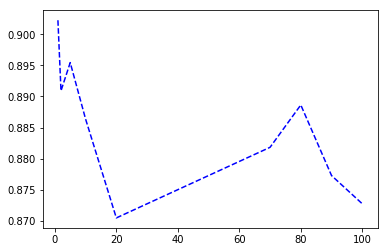



Percentile vs. F1 for Ngram Range (1,3)


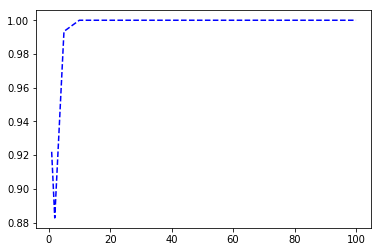

In [30]:
from sklearn.feature_selection import SelectPercentile, chi2
import matplotlib.pyplot as plt

percentiles = [1,2,5,10,20,30,40,50,60,70,80,90,100]
accuracies = []
f_scores = []

for p in range(len(percentiles)):
    selection = SelectPercentile(percentile=percentiles[p], score_func=chi2)
    X_train_selected = selection.fit_transform(X_train2016, Y_train2016)
    gs_classifier.fit(X_train_selected, Y_train2016)
    accuracies.append(gs_classifier.best_score_)
    f_scores.append(f1_score(Y_train2016, gs_classifier.predict(X_train_selected)))

print("\n\nPercentile vs. Accuracy for Ngram Range (1,3)")
plt.plot(percentiles, accuracies, 'b--')
plt.show()

print("\n\nPercentile vs. F1 for Ngram Range (1,3)")
plt.plot(percentiles, f_scores, 'b--')
plt.show()

In [31]:
X_train_final = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train2016)
X_test_final = vect.transform(features(d, ngram_range=(1,3)) for d in text_test2016)

selection = SelectPercentile(percentile=90, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train2016)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier2016, params, cv=5)
gs_classifier.fit(X_train_final, Y_train2016)

print("Validation F1: %0.6f" % f1_score(Y_train2016, gs_classifier.predict(X_train_final)))
print("Test F1: %0.6f" % f1_score(Y_test2016, gs_classifier.predict(X_test_final)))

Validation F1: 1.000000
Test F1: 0.666667


In [32]:
feature_names = np.asarray(vect.get_feature_names())
base_classifier2016.fit(X_train_final, Y_train2016)

feature_weights2016 = {}
feature_names2016 = set()

print("\nFeature weights:")
args = np.argsort(base_classifier2016.coef_[0])
for a in args:
    print(" %s: %0.4f" % (feature_names[a], base_classifier2016.coef_[0][a]))
    feature_weights2016[feature_names[a]] = base_classifier2016.coef_[0][a]
    feature_names2016.add(feature_names[a])


Feature weights:
 1945 *  * armed: -0.2611
 flu shot again: -0.2591
 1976 *  * person: -0.2384
 ebruqpkxwe * t: -0.2351
 arm pete: -0.2351
 ask: -0.2351
 co z6b30clgfw: -0.2216
 flumist: -0.2141
 biondvax s universal: -0.1761
 bbc *  * for: -0.1735
 bbc * vaccine: -0.1724
 !: -0.1579
 11 * flu: -0.1560
 else it: -0.1551
 can *  * protection: -0.1516
 *: -0.1516
 146m *  * flu: -0.1424
 are * shots: -0.1335
 from * rn: -0.1309
 compliance *  * co: -0.1279
 cdc panel: -0.1249
 ):#: -0.1243
 cablefixer * be: -0.1243
 and deaths: -0.1218
 1781 * t: -0.1203
 can *  * your: -0.1161
 extra month to: -0.1161
 ev4fifglq7: -0.1142
 1945 for the: -0.1140
 bed and: -0.1127
 bed * retweet: -0.1127
 demand * the: -0.1085
 bed and retweet: -0.1080
 flu *  * ve: -0.1056
 corps *  * would: -0.1050
 broke the needles: -0.1048
 family didn: -0.1048
 brownies: -0.1048
 16 * shot: -0.1048
 brass: -0.1048
 against *  * daily: -0.1048
 broke the: -0.1048
 course *  * said: -0.1038
 co hoksjmhhds: -0.1020
 b

 100 worth: -0.0228
 100 worth it: -0.0228
 flu *  * 12: -0.0228
 109f: -0.0228
 flu *  * 1326: -0.0228
 fit * healthy: -0.0228
 109f *  * my: -0.0228
 100 seniors died: -0.0228
 an *  * you: -0.0227
 flu * flu: -0.0225
 doc said it: -0.0224
 euyhhxsdzm onmedic ehealth: -0.0224
 14 sz: -0.0224
 for flu: -0.0224
 apply https t: -0.0224
 call * for: -0.0223
 caflu *  * pregnancy: -0.0223
 fam looked dreadful: -0.0223
 free while: -0.0223
 co * onmedic: -0.0220
 co * now: -0.0220
 babies * flu: -0.0219
 dr: -0.0218
 containing *  * https: -0.0218
 age two fully: -0.0218
 corrugated plastic yard: -0.0218
 due *  * flu: -0.0218
 arm * a: -0.0217
 cognitive * contribute: -0.0217
 attended: -0.0216
 catch *  * guard: -0.0216
 drunk * she: -0.0214
 from speaking 2: -0.0214
 from the: -0.0214
 actually *  * is: -0.0213
 added flu: -0.0213
 co * can: -0.0212
 by myself: -0.0212
 29: -0.0212
 co * doritmi: -0.0212
 but * the: -0.0212
 co * ds: -0.0212
 250x epa mercury: -0.0212
 co * flu: -0.0212

 cousin: -0.0026
 court reverses mandatory: -0.0026
 a flu vaccine: -0.0026
 at walgreens: -0.0026
 co 3zkjhvxv3u healthnewsusa: -0.0026
 flu mist: -0.0026
 cbsboston * kids: -0.0026
 andy * a: -0.0025
 area saying the: -0.0025
 at london: -0.0025
 any instructions: -0.0025
 compqring *  * cucks: -0.0025
 flu coming on: -0.0025
 flu shots definitely: -0.0025
 flu shots didn: -0.0025
 fam: -0.0025
 5 https t: -0.0025
 allergic: -0.0025
 far *  * longer: -0.0025
 against h1n1 study: -0.0025
 brief * of: -0.0025
 flu * dear: -0.0025
 flu * didn: -0.0025
 flu * contains: -0.0025
 flu * distribution: -0.0025
 again lesson learned: -0.0024
 avian *  * has: -0.0024
 avoid: -0.0024
 avoid * vax: -0.0024
 can t tell: -0.0024
 apply: -0.0024
 can go: -0.0024
 6oqa2zeb0e *  * co: -0.0024
 can we: -0.0024
 flu vaccinations: -0.0024
 flu to: -0.0024
 about high on: -0.0024
 a * influenza: -0.0024
 65y receiving: -0.0024
 6oqa2zeb0e: -0.0024
 again panel: -0.0024
 be * norm: -0.0024
 against *  * an

 cdcgov cdcflu: 0.0115
 cdcgov * would: 0.0115
 at shilling refund: 0.0115
 co kgmf5a9nhq: 0.0115
 flu *  * go: 0.0115
 day later: 0.0115
 day only: 0.0115
 cdcfraud: 0.0115
 day only your: 0.0115
 day three: 0.0115
 cdc the nasal: 0.0115
 day three of: 0.0115
 cdc says the: 0.0115
 finalimperium why do: 0.0115
 cdc reveals marketing: 0.0115
 at shilling: 0.0115
 and *  * you: 0.0115
 co kgahgpr0ft: 0.0115
 flu *  * numb: 0.0115
 a good: 0.0115
 at risk staywellthiswinter: 0.0115
 a flu world: 0.0115
 but *  * for: 0.0115
 favourite immune: 0.0115
 flu * but: 0.0115
 and *  * still: 0.0115
 doctor gave: 0.0115
 fqsypya4uc: 0.0115
 9gpipmdych health medicine: 0.0115
 and *  * pcv13: 0.0115
 doctor *  * day: 0.0115
 finalimperium why: 0.0115
 bugs * there: 0.0115
 doctorbychkov merdenella: 0.0115
 flu * birdface: 0.0115
 flu *  * sanofi: 0.0115
 a lie: 0.0115
 955 * https: 0.0115
 a legit flu: 0.0115
 co khvqo1ixfs https: 0.0115
 2 * to: 0.0115
 fight off: 0.0115
 a *  * all: 0.0115
 flu

 all * myself: 0.0250
 dose flu vaccine: 0.0250
 10 reasons to: 0.0250
 10 words https: 0.0250
 dough *  * the: 0.0250
 100: 0.0250
 flumist vaccine flu: 0.0250
 and *  * 1: 0.0250
 5 amp: 0.0250
 coughing a: 0.0250
 coughing * lot: 0.0250
 amandabrandeis https t: 0.0250
 endorsed: 0.0250
 2 *  * when: 0.0250
 a rare sleeping: 0.0250
 among: 0.0250
 doesn t want: 0.0250
 all * vaccines: 0.0250
 epa mercury: 0.0250
 enrollment *  * pride: 0.0250
 dose in: 0.0250
 a pharmaceutical: 0.0250
 can hit: 0.0250
 cough *  * shots: 0.0250
 flumist *  * https: 0.0250
 but *  * if: 0.0250
 5 5: 0.0250
 are cheap: 0.0250
 due * the: 0.0250
 corrugated * yard: 0.0250
 a perspective: 0.0250
 enrollment * phoenix: 0.0250
 free * i: 0.0250
 a rare: 0.0250
 flumist * nasal: 0.0250
 effectin ppl: 0.0250
 engineering: 0.0250
 awf5gyxelo via shareaholic: 0.0250
 epa * t: 0.0250
 by *  * a: 0.0250
 5 flu: 0.0250
 epa https: 0.0250
 all * of: 0.0250
 all * screaming: 0.0250
 considering: 0.0250
 congress: 0.

 ehambif5ew: 0.0382
 effectiveness *  * co: 0.0382
 co vp5djpaab9: 0.0382
 67 flu shots: 0.0382
 are on: 0.0382
 co uzxu2jcduj i: 0.0382
 a *  * influenza: 0.0382
 co tovqt7lfsk https: 0.0382
 a *  * how: 0.0382
 astrazeneca *  * million: 0.0382
 against flu https: 0.0382
 co y7e82rs46u: 0.0382
 fda *  * seasonal: 0.0382
 fda * first: 0.0382
 64 * people: 0.0382
 ehambif5ew science: 0.0382
 amp *  * study: 0.0382
 amp *  * t: 0.0382
 amp *  * too: 0.0382
 amp * 2016: 0.0382
 and *  * said: 0.0382
 fair 11 s: 0.0382
 and *  * that: 0.0382
 and * a: 0.0382
 65y * chemotherapy: 0.0382
 andy gets: 0.0382
 andy gets a: 0.0382
 annual: 0.0382
 annual *  * in: 0.0382
 annual * deaths: 0.0382
 family with flu: 0.0382
 apply for: 0.0382
 5 then: 0.0382
 co y5ozjyndsq next: 0.0382
 f6xbhqffis via smh: 0.0382
 90 of people: 0.0382
 1326 *  * fairfield: 0.0382
 co 3znlthifnp: 0.0382
 co 49fdigjrd9: 0.0382
 co 4bx5bh9fnc: 0.0382
 co 4egaoygajh: 0.0382
 co 4egaoygajh heartdisease: 0.0382
 1326 post:

 as going overseas: 0.2471
 flu * not: 0.2495
 18: 0.2636
 busted as: 0.2699
 because * don: 0.2700
 1781 https: 0.2851
 because *  * to: 0.2942
 18 years: 0.3189
 beat zika financial: 0.3218


In [33]:
three = set.intersection(feature_names2013,feature_names2014,feature_names2015)

three

{'from this flu',
 '10 reasons',
 'the *  * was',
 'shots * more',
 'for the flu',
 'tied',
 'stay together',
 'flu * cold',
 'f the',
 'this * s',
 'seen',
 'cry when',
 's * http',
 'by myself',
 'flu vaccine can',
 'cause *  * t',
 'eye',
 'me * was',
 'if * haven',
 'can harm',
 'in your',
 'nyc *  * flu',
 'of it',
 'to * new',
 'try',
 'disease control',
 'take it',
 'more dangerous than',
 'to *  * sick',
 'how',
 'flu *  * more',
 'seasonal * vaccines',
 'infant',
 'done so',
 's *  * t',
 'no *  * for',
 'mom made',
 'come *  * today',
 'than half of',
 'drive * flu',
 'of *  * and',
 'at *  * the',
 'after * of',
 'shot *  * than',
 'flu * earlier',
 'is * good',
 'locations',
 'shot *  * so',
 'is always',
 'protect your',
 'never will',
 'may * the',
 'have you',
 'in * shot',
 'shot all',
 'pharma',
 'and flu shot',
 'not *  * t',
 'latest',
 'both flu',
 'in * the',
 'sick i',
 'they * t',
 'supposed',
 'i *  * had',
 'plague',
 'the * after',
 'health officials',
 'flu s

In [34]:
four = set.intersection(feature_names2013,feature_names2014,feature_names2015,feature_names2016)

four

{'after flu',
 '10 reasons',
 'flu * but',
 'flu * is',
 'for * days',
 'double',
 'for disease control',
 'a * days',
 'and now i',
 'flu * again',
 'and flu',
 'for the flu',
 'catch',
 'are *  * get',
 'flu vaccine has',
 'am',
 '10 reasons why',
 'flu *  * today',
 'flu is',
 'flu strains',
 'flu * work',
 'everything',
 'again',
 '--',
 'flu vaccine as',
 'ever *  * flu',
 'entire',
 'by myself',
 'flu * s',
 'and * got',
 'flu vaccine can',
 '#',
 'flu * to',
 'flu *  * pregnancy',
 'centers for',
 'far',
 'flu * so',
 'can *  * heart',
 'be * to',
 'and *  * the',
 'disease control',
 'didnt',
 'F',
 'flu * early',
 'cold *  * t',
 '*',
 'after *  * flu',
 'financial',
 '6 months',
 'flu * myths',
 'colds',
 'continues',
 'a * video',
 'flu shot all',
 'a *  * in',
 'even * you',
 'court',
 'flu *  * more',
 'flu *  * years',
 'N',
 'c *  * co',
 'for *  * at',
 'be * and',
 'and is better',
 'flu * amp',
 'from *  * t',
 'a *  * not',
 'come *  * today',
 'didn * get',
 'a day'

In [35]:
def lookup4(name):
    return [feature_weights2013[name],feature_weights2014[name],feature_weights2015[name],feature_weights2016[name]]

years = [2013,2014,2015,2016]

#for feature in four:
#    print("\n\nFeature:",feature)
#    plt.plot(years, lookup4(feature), 'b--')
#    plt.show()

In [36]:
from sklearn import linear_model

_2013 = np.array([])
for i in range(len(feature_weights2013)):
    _2013 = np.append(_2013, 2013)

_2014 = np.array([])
for i in range(len(feature_weights2014)):
    _2014 = np.append(_2014, 2014)
    
_2015 = np.array([])
for i in range(len(feature_weights2015)):
    _2015 = np.append(_2015, 2015)

weights2013 = np.array([])
for name in feature_weights2013.keys():
    weights2013 = np.append(weights2013,feature_weights2013[name])
    
weights2014 = np.array([])
for name in feature_weights2014.keys():
    weights2014 = np.append(weights2014,feature_weights2014[name])
    
weights2015 = np.array([])
for name in feature_weights2015.keys():
    weights2015 = np.append(weights2015,feature_weights2015[name])

X = np.concatenate((_2013,_2014,_2015))
Y = np.concatenate((weights2013,weights2014,weights2015))

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

predict_2016 = linear_model.LinearRegression()
predict_2016.fit(X,Y)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
prediction = predict_2016.predict(2016)

In [38]:
def features_list(text,  ngram_range=(1,3)):
    text = text.lower()      # make the string lowercase
    text = re.sub(r'(.)\1+', r'\1\1', text)     # remove consecutive characters that are repeated more than twice
    
    features_in_text = []   # running list of all features in this instance (can be repeated)
    
    # treat alphanumeric characters as word tokens (removing anything else),
    # and extract all n-grams of length n specified by ngram_range
    
    text_alphanum = re.sub('[^a-z0-9]', ' ', text)
    for n in range(ngram_range[0], ngram_range[1]+1):
        features_in_text += ngrams(text_alphanum.split(), n)
    
    for n in range(3,5):
        features_in_text += skipgrams(text_alphanum.split(), n)
      
    features_in_text += str(pairs(text_alphanum.split()))
    features_in_text += str(parts_of_speech(text_alphanum.split()))
    # now treat punctuation as word tokens, and get their counts (only unigrams)
    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    features_in_text += ngrams(text_punc.split(), 1)
    
   
    # 'Counter' converts a list into a dictionary whose keys are the list elements 
    #  and the values are the number of times each element appeared in the list
    
    return features_in_text

In [39]:
def features_2016(feature_list, intersection, p, coefs, text):
    counts = Counter(feature_list)
    c_dict = {}
    for feature in counts:
        if feature in intersection:
            c_dict[feature] = (p/coefs[feature])*counts[feature]
        else:
            c_dict[feature] = counts[feature]
            
    return c_dict

In [40]:
text_train2016, text_test2016, Y_train2016, Y_test2016 = train_test_split(df_2016['Text'], df_2016['Illness'], test_size=0.2, random_state=0)

In [41]:
vect = DictVectorizer()
X_train2016 = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train2016)
base_classifier2016 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

In [42]:
feature_names = np.asarray(vect.get_feature_names())
base_classifier2016.fit(X_train2016, Y_train2016)

feature_weights2016 = {}

args = np.argsort(base_classifier2016.coef_[0])
for a in args:
    feature_weights2016[feature_names[a]] = base_classifier2016.coef_[0][a]

In [43]:
X_test2016 = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_test2016)

feature_names_t = np.asarray(vect.get_feature_names())
base_classifier2016.fit(X_test2016, Y_test2016)

feature_weights2016_t = {}
feature_names2016_t = set()

args = np.argsort(base_classifier2016.coef_[0])
for a in args:
    feature_weights2016_t[feature_names_t[a]] = base_classifier2016.coef_[0][a]
    feature_names2016_t.add(feature_names_t[a])

In [44]:
four_t = set.intersection(feature_names2013,feature_names2014,feature_names2015,feature_names2016_t)

In [45]:
X_train2016 = vect.fit_transform(features_2016(features_list(d, ngram_range=(1,3)),four,prediction,feature_weights2016, d) for d in text_train2016)


base_classifier2016 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

# these are the C values we will compare -- don't change this variable

params = [{'C': [0.01, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]}]

# this performs 5-fold cross-validation with the above classifier and parameter options

gs_classifier = GridSearchCV(base_classifier2016, params, cv=5)
gs_classifier.fit(X_train2016, Y_train2016)

print("Best parameter settings:", gs_classifier.best_params_)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

#scores = cross_val_score(gs_classifier, X_train2016, Y_train2016, cv=5)
#scores 

Best parameter settings: {'C': 0.1}
Validation accuracy: 0.875000


In [46]:
X_test2016 = vect.transform(features_2016(features_list(d, ngram_range=(1,3)),four_t,prediction,feature_weights2016_t, d) for d in text_test2016)

In [47]:
print("Validation F1:")
print(f1_score(Y_train2016, gs_classifier.predict(X_train2016), pos_label=1))
print("Test F1:")
print(f1_score(Y_test2016, gs_classifier.predict(X_test2016), pos_label=1))

Validation F1:
0.9801324503311258
Test F1:
0.33333333333333326
